# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 22:30:54.376260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T22:30:57.384805
2025-04-14 22:30:57.384805


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 1

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 246
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 22:30:52"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

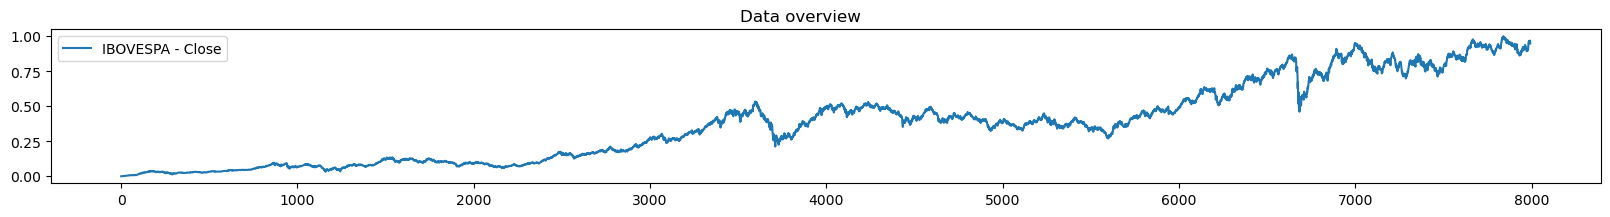

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

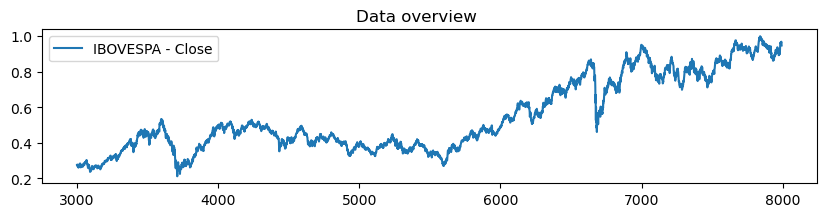

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

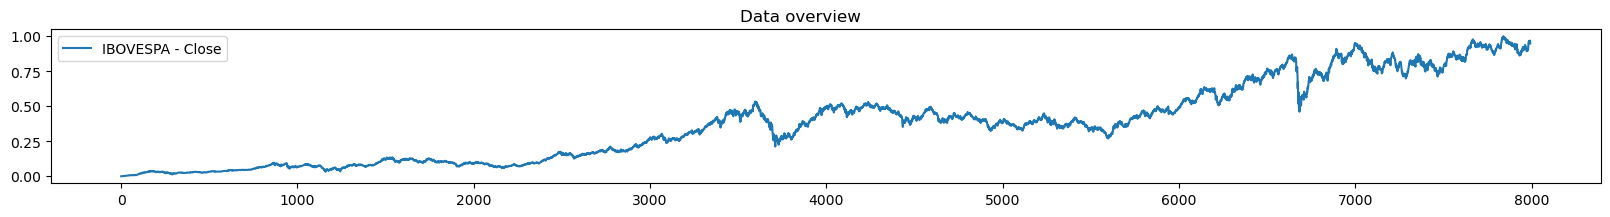

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

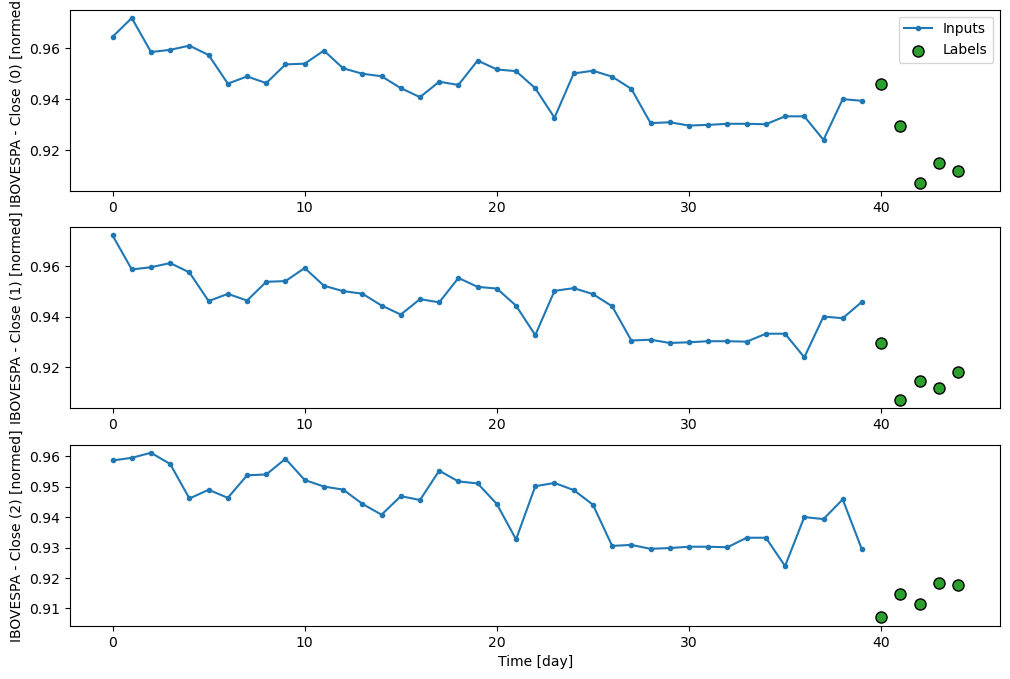

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11:33 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 66.6309 - mean_squared_error: 5.7968e-05 - root_mean_squared_error: 0.0076  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 54.9810 - mean_squared_error: 6.1408e-05 - root_mean_squared_error: 0.0078

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 50.9336 - mean_squared_error: 6.8732e-05 - root_mean_squared_error: 0.0082

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 47.4539 - mean_squared_error: 6.9794e-05 - root_mean_squared_error: 0.0083

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 44.4951 - mean_squared_error: 6.8976e-05 - root_mean_squared_error: 0.0083

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 41.9276 - mean_squared_error: 6.7371e-05 - root_mean_squared_error: 0.0082

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 39.6238 - mean_squared_error: 6.5243e-05 - root_mean_squared_error: 0.0080

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 38.3293 - mean_squared_error: 6.4906e-05 - root_mean_squared_error: 0.0080

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 36.8147 - mean_squared_error: 7.0274e-05 - root_mean_squared_error: 0.0083

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 35.5906 - mean_squared_error: 7.7741e-05 - root_mean_squared_error: 0.0087

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 34.5733 - mean_squared_error: 8.5446e-05 - root_mean_squared_error: 0.0090

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 33.6723 - mean_squared_error: 9.1746e-05 - root_mean_squared_error: 0.0094

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 32.9412 - mean_squared_error: 9.8082e-05 - root_mean_squared_error: 0.0096

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 32.3598 - mean_squared_error: 1.0616e-04 - root_mean_squared_error: 0.0100

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 31.7956 - mean_squared_error: 1.1291e-04 - root_mean_squared_error: 0.0103

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 31.2724 - mean_squared_error: 1.2022e-04 - root_mean_squared_error: 0.0106

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 30.8138 - mean_squared_error: 1.2964e-04 - root_mean_squared_error: 0.0110

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 30.3585 - mean_squared_error: 1.3760e-04 - root_mean_squared_error: 0.0113

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 29.9138 - mean_squared_error: 1.4447e-04 - root_mean_squared_error: 0.0115

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 29.5025 - mean_squared_error: 1.5084e-04 - root_mean_squared_error: 0.0118

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 29.1099 - mean_squared_error: 1.5646e-04 - root_mean_squared_error: 0.0120

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 28.7267 - mean_squared_error: 1.6116e-04 - root_mean_squared_error: 0.0122

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 28.3682 - mean_squared_error: 1.6525e-04 - root_mean_squared_error: 0.0124

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.1438 - mean_squared_error: 1.6779e-04 - root_mean_squared_error: 0.0125

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 28.0382 - mean_squared_error: 1.6911e-04 - root_mean_squared_error: 0.0125

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 27.7426 - mean_squared_error: 1.7342e-04 - root_mean_squared_error: 0.0127

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 27.4825 - mean_squared_error: 1.7982e-04 - root_mean_squared_error: 0.0129

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 27.2348 - mean_squared_error: 1.8639e-04 - root_mean_squared_error: 0.0131

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.9891 - mean_squared_error: 1.9237e-04 - root_mean_squared_error: 0.0133

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.7462 - mean_squared_error: 1.9794e-04 - root_mean_squared_error: 0.0135

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 26.5025 - mean_squared_error: 2.0293e-04 - root_mean_squared_error: 0.0137

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 26.1839 - mean_squared_error: 2.0936e-04 - root_mean_squared_error: 0.0139

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 25.9573 - mean_squared_error: 2.1567e-04 - root_mean_squared_error: 0.0141

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 25.7383 - mean_squared_error: 2.2264e-04 - root_mean_squared_error: 0.0143

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.5325 - mean_squared_error: 2.3235e-04 - root_mean_squared_error: 0.0146

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 25.3395 - mean_squared_error: 2.4617e-04 - root_mean_squared_error: 0.0149

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 25.1503 - mean_squared_error: 2.6057e-04 - root_mean_squared_error: 0.0153

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.9032 - mean_squared_error: 2.8040e-04 - root_mean_squared_error: 0.0158

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 24.7351 - mean_squared_error: 3.0129e-04 - root_mean_squared_error: 0.0162

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 24.5903 - mean_squared_error: 3.2970e-04 - root_mean_squared_error: 0.0167

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 24.4489 - mean_squared_error: 3.5759e-04 - root_mean_squared_error: 0.0173

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 24.3175 - mean_squared_error: 3.9123e-04 - root_mean_squared_error: 0.0179

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 24.1954 - mean_squared_error: 4.3097e-04 - root_mean_squared_error: 0.0185

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 24.0733 - mean_squared_error: 4.6926e-04 - root_mean_squared_error: 0.0191

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 23.9504 - mean_squared_error: 5.0539e-04 - root_mean_squared_error: 0.0197

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 23.8253 - mean_squared_error: 5.3910e-04 - root_mean_squared_error: 0.0203

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.6996 - mean_squared_error: 5.7076e-04 - root_mean_squared_error: 0.0208

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.5750 - mean_squared_error: 6.0117e-04 - root_mean_squared_error: 0.0213

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 23.4513 - mean_squared_error: 6.3034e-04 - root_mean_squared_error: 0.0218

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 23.3265 - mean_squared_error: 6.5760e-04 - root_mean_squared_error: 0.0223

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 23.2016 - mean_squared_error: 6.8320e-04 - root_mean_squared_error: 0.0227

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 23.0802 - mean_squared_error: 7.0815e-04 - root_mean_squared_error: 0.0231

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 22.9591 - mean_squared_error: 7.3164e-04 - root_mean_squared_error: 0.0235

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 22.8388 - mean_squared_error: 7.5388e-04 - root_mean_squared_error: 0.0239

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 22.7230 - mean_squared_error: 7.7640e-04 - root_mean_squared_error: 0.0243

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 22.6094 - mean_squared_error: 7.9825e-04 - root_mean_squared_error: 0.0246

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 22.4967 - mean_squared_error: 8.1897e-04 - root_mean_squared_error: 0.0250

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 22.3867 - mean_squared_error: 8.3901e-04 - root_mean_squared_error: 0.0253

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 22.2820 - mean_squared_error: 8.5937e-04 - root_mean_squared_error: 0.0257

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 22.1782 - mean_squared_error: 8.7877e-04 - root_mean_squared_error: 0.0260

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 22.0775 - mean_squared_error: 8.9825e-04 - root_mean_squared_error: 0.0263

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 21.9805 - mean_squared_error: 9.1848e-04 - root_mean_squared_error: 0.0266

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 21.8862 - mean_squared_error: 9.3898e-04 - root_mean_squared_error: 0.0270

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 21.7947 - mean_squared_error: 9.6005e-04 - root_mean_squared_error: 0.0273

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 21.7046 - mean_squared_error: 9.8108e-04 - root_mean_squared_error: 0.0276

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 21.6163 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0279    

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 21.5283 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0282

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 21.4403 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 21.3519 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 21.2658 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 21.1835 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 21.1022 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 21.0236 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 20.9473 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 20.8712 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 20.7953 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 20.7196 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 20.6438 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 20.5684 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 20.5188 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0326 - val_loss: 0.0711 - val_mean_absolute_error: 0.0711 - val_mean_absolute_percentage_error: 7.5392 - val_mean_squared_error: 0.0056 - val_root_mean_squared_error: 0.0751 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.5726 - mean_absolute_error: 0.5726 - mean_absolute_percentage_error: 7692.5366 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5726

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.5718 - mean_absolute_error: 0.5718 - mean_absolute_percentage_error: 5901.8154 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5718 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5680 - mean_absolute_error: 0.5680 - mean_absolute_percentage_error: 5126.3271 - mean_squared_error: 0.3227 - root_mean_squared_error: 0.5681

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.5621 - mean_absolute_error: 0.5621 - mean_absolute_percentage_error: 4629.0151 - mean_squared_error: 0.3164 - root_mean_squared_error: 0.5624

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.5465 - mean_absolute_error: 0.5465 - mean_absolute_percentage_error: 4128.0693 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5487

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5499 - mean_absolute_error: 0.5499 - mean_absolute_percentage_error: 3831.1548 - mean_squared_error: 0.3276 - root_mean_squared_error: 0.5704

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5455 - mean_absolute_error: 0.5455 - mean_absolute_percentage_error: 3585.1226 - mean_squared_error: 0.3360 - root_mean_squared_error: 0.5778

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.5371 - mean_absolute_error: 0.5371 - mean_absolute_percentage_error: 3374.1155 - mean_squared_error: 0.3357 - root_mean_squared_error: 0.5778

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5241 - mean_absolute_error: 0.5241 - mean_absolute_percentage_error: 3183.5173 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5728

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 3012.1323 - mean_squared_error: 0.3214 - root_mean_squared_error: 0.5651

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.4937 - mean_absolute_error: 0.4937 - mean_absolute_percentage_error: 2858.3928 - mean_squared_error: 0.3119 - root_mean_squared_error: 0.5563

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.4735 - mean_absolute_error: 0.4735 - mean_absolute_percentage_error: 2677.5542 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5437

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.4590 - mean_absolute_error: 0.4590 - mean_absolute_percentage_error: 2557.5200 - mean_squared_error: 0.2895 - root_mean_squared_error: 0.5343

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.4451 - mean_absolute_error: 0.4451 - mean_absolute_percentage_error: 2448.8174 - mean_squared_error: 0.2803 - root_mean_squared_error: 0.5249

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4319 - mean_absolute_error: 0.4319 - mean_absolute_percentage_error: 2349.8428 - mean_squared_error: 0.2716 - root_mean_squared_error: 0.5158

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4194 - mean_absolute_error: 0.4194 - mean_absolute_percentage_error: 2259.3362 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.5070

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.4075 - mean_absolute_error: 0.4075 - mean_absolute_percentage_error: 2176.2673 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4985

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3963 - mean_absolute_error: 0.3963 - mean_absolute_percentage_error: 2099.7676 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4904

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2029.0615 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4826

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3758 - mean_absolute_error: 0.3758 - mean_absolute_percentage_error: 1963.5310 - mean_squared_error: 0.2345 - root_mean_squared_error: 0.4751

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 1902.6245 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4679

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1845.8524 - mean_squared_error: 0.2224 - root_mean_squared_error: 0.4610

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1792.7972 - mean_squared_error: 0.2168 - root_mean_squared_error: 0.4545

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 1743.1075 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4481

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1696.4670 - mean_squared_error: 0.2065 - root_mean_squared_error: 0.4421

 75/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3262 - mean_absolute_error: 0.3262 - mean_absolute_percentage_error: 1652.5685 - mean_squared_error: 0.2018 - root_mean_squared_error: 0.4362

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 1611.1595 - mean_squared_error: 0.1973 - root_mean_squared_error: 0.4306

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3129 - mean_absolute_error: 0.3129 - mean_absolute_percentage_error: 1572.0408 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4252

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3066 - mean_absolute_error: 0.3066 - mean_absolute_percentage_error: 1535.0155 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4200

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1499.9172 - mean_squared_error: 0.1850 - root_mean_squared_error: 0.4150

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2950 - mean_absolute_error: 0.2950 - mean_absolute_percentage_error: 1466.5897 - mean_squared_error: 0.1812 - root_mean_squared_error: 0.4102

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1434.8950 - mean_squared_error: 0.1777 - root_mean_squared_error: 0.4056

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2845 - mean_absolute_error: 0.2845 - mean_absolute_percentage_error: 1404.7145 - mean_squared_error: 0.1743 - root_mean_squared_error: 0.4011

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2795 - mean_absolute_error: 0.2795 - mean_absolute_percentage_error: 1375.9417 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3967

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2748 - mean_absolute_error: 0.2748 - mean_absolute_percentage_error: 1348.4700 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3925

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.2703 - mean_absolute_error: 0.2703 - mean_absolute_percentage_error: 1322.2129 - mean_squared_error: 0.1649 - root_mean_squared_error: 0.3885

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1288.9513 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3833

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1265.2188 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3795

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2565 - mean_absolute_error: 0.2565 - mean_absolute_percentage_error: 1242.4645 - mean_squared_error: 0.1557 - root_mean_squared_error: 0.3759

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2529 - mean_absolute_error: 0.2529 - mean_absolute_percentage_error: 1220.6526 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3724

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1199.6997 - mean_squared_error: 0.1508 - root_mean_squared_error: 0.3690

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2460 - mean_absolute_error: 0.2460 - mean_absolute_percentage_error: 1179.5500 - mean_squared_error: 0.1484 - root_mean_squared_error: 0.3657

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1160.1636 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3626

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1141.4910 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3595

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1123.4868 - mean_squared_error: 0.1420 - root_mean_squared_error: 0.3565

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1106.1129 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3536

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1089.3441 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3508

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1073.1492 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3481

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2263 - mean_absolute_error: 0.2263 - mean_absolute_percentage_error: 1057.4901 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3455

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1042.3383 - mean_squared_error: 0.1326 - root_mean_squared_error: 0.3429

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2215 - mean_absolute_error: 0.2215 - mean_absolute_percentage_error: 1027.6696 - mean_squared_error: 0.1308 - root_mean_squared_error: 0.3403

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1013.4594 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3379

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 999.6840 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3354 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2148 - mean_absolute_error: 0.2148 - mean_absolute_percentage_error: 986.3240 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3331

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 973.3597 - mean_squared_error: 0.1245 - root_mean_squared_error: 0.3308

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 960.7736 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3285

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 948.5483 - mean_squared_error: 0.1215 - root_mean_squared_error: 0.3263

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 936.6680 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3241

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 925.1195 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3220

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 913.8887 - mean_squared_error: 0.1174 - root_mean_squared_error: 0.3199

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 899.3892 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3172

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 888.8542 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3152

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 878.5951 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3133

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1953 - mean_absolute_error: 0.1953 - mean_absolute_percentage_error: 868.6000 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3114

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 858.8578 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3096

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 849.3592 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.3078

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1906 - mean_absolute_error: 0.1906 - mean_absolute_percentage_error: 840.0934 - mean_squared_error: 0.1086 - root_mean_squared_error: 0.3060

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1891 - mean_absolute_error: 0.1891 - mean_absolute_percentage_error: 831.0513 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.3042

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 822.2244 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3025

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 813.6074 - mean_squared_error: 0.1054 - root_mean_squared_error: 0.3008

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1849 - mean_absolute_error: 0.1849 - mean_absolute_percentage_error: 805.1949 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2992

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 796.9766 - mean_squared_error: 0.1034 - root_mean_squared_error: 0.2976

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1822 - mean_absolute_error: 0.1822 - mean_absolute_percentage_error: 788.9443 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2960

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 781.0917 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2945

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1797 - mean_absolute_error: 0.1797 - mean_absolute_percentage_error: 773.4128 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2930

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 765.9013 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2915

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 758.5516 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2900

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1761 - mean_absolute_error: 0.1761 - mean_absolute_percentage_error: 751.3581 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2886

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1750 - mean_absolute_error: 0.1750 - mean_absolute_percentage_error: 744.3157 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2871

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1742 - mean_absolute_error: 0.1742 - mean_absolute_percentage_error: 739.7111 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.2862 - val_loss: 0.0512 - val_mean_absolute_error: 0.0512 - val_mean_absolute_percentage_error: 5.4125 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0557 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.6344 - mean_absolute_error: 0.6344 - mean_absolute_percentage_error: 8522.6621 - mean_squared_error: 0.4024 - root_mean_squared_error: 0.6344

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.6311 - mean_absolute_error: 0.6311 - mean_absolute_percentage_error: 6524.5610 - mean_squared_error: 0.3983 - root_mean_squared_error: 0.6311 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.6239 - mean_absolute_error: 0.6239 - mean_absolute_percentage_error: 5359.2437 - mean_squared_error: 0.3896 - root_mean_squared_error: 0.6241

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6184 - mean_absolute_error: 0.6184 - mean_absolute_percentage_error: 4921.7539 - mean_squared_error: 0.3829 - root_mean_squared_error: 0.6187

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 4598.4673 - mean_squared_error: 0.3753 - root_mean_squared_error: 0.6123

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5997 - mean_absolute_error: 0.5997 - mean_absolute_percentage_error: 4221.9351 - mean_squared_error: 0.3620 - root_mean_squared_error: 0.6010

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5851 - mean_absolute_error: 0.5851 - mean_absolute_percentage_error: 3921.2449 - mean_squared_error: 0.3472 - root_mean_squared_error: 0.5880

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.5677 - mean_absolute_error: 0.5677 - mean_absolute_percentage_error: 3664.2661 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5736

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5507 - mean_absolute_error: 0.5507 - mean_absolute_percentage_error: 3443.4644 - mean_squared_error: 0.3182 - root_mean_squared_error: 0.5613

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5414 - mean_absolute_error: 0.5414 - mean_absolute_percentage_error: 3315.1987 - mean_squared_error: 0.3122 - root_mean_squared_error: 0.5559

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.5318 - mean_absolute_error: 0.5318 - mean_absolute_percentage_error: 3196.5505 - mean_squared_error: 0.3060 - root_mean_squared_error: 0.5500

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5198 - mean_absolute_error: 0.5198 - mean_absolute_percentage_error: 3038.7664 - mean_squared_error: 0.2990 - root_mean_squared_error: 0.5437

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5100 - mean_absolute_error: 0.5100 - mean_absolute_percentage_error: 2900.8291 - mean_squared_error: 0.2939 - root_mean_squared_error: 0.5390

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.5007 - mean_absolute_error: 0.5007 - mean_absolute_percentage_error: 2777.7131 - mean_squared_error: 0.2888 - root_mean_squared_error: 0.5343

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 2666.4102 - mean_squared_error: 0.2832 - root_mean_squared_error: 0.5289

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4848 - mean_absolute_error: 0.4848 - mean_absolute_percentage_error: 2597.6506 - mean_squared_error: 0.2793 - root_mean_squared_error: 0.5251

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.4783 - mean_absolute_error: 0.4783 - mean_absolute_percentage_error: 2532.7668 - mean_squared_error: 0.2754 - root_mean_squared_error: 0.5212

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4718 - mean_absolute_error: 0.4718 - mean_absolute_percentage_error: 2471.3511 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.5172

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4686 - mean_absolute_error: 0.4686 - mean_absolute_percentage_error: 2441.8579 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5152

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4622 - mean_absolute_error: 0.4622 - mean_absolute_percentage_error: 2385.1309 - mean_squared_error: 0.2655 - root_mean_squared_error: 0.5112

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4527 - mean_absolute_error: 0.4527 - mean_absolute_percentage_error: 2305.3218 - mean_squared_error: 0.2596 - root_mean_squared_error: 0.5050

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4464 - mean_absolute_error: 0.4464 - mean_absolute_percentage_error: 2255.3479 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.5010

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4404 - mean_absolute_error: 0.4404 - mean_absolute_percentage_error: 2207.7502 - mean_squared_error: 0.2520 - root_mean_squared_error: 0.4970

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4344 - mean_absolute_error: 0.4344 - mean_absolute_percentage_error: 2162.3623 - mean_squared_error: 0.2483 - root_mean_squared_error: 0.4930

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4286 - mean_absolute_error: 0.4286 - mean_absolute_percentage_error: 2119.0308 - mean_squared_error: 0.2447 - root_mean_squared_error: 0.4891

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 2057.5701 - mean_squared_error: 0.2395 - root_mean_squared_error: 0.4833

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4118 - mean_absolute_error: 0.4118 - mean_absolute_percentage_error: 2000.0024 - mean_squared_error: 0.2344 - root_mean_squared_error: 0.4776

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4039 - mean_absolute_error: 0.4039 - mean_absolute_percentage_error: 1945.9573 - mean_squared_error: 0.2296 - root_mean_squared_error: 0.4721

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3962 - mean_absolute_error: 0.3962 - mean_absolute_percentage_error: 1895.1145 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4667

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3888 - mean_absolute_error: 0.3888 - mean_absolute_percentage_error: 1847.1715 - mean_squared_error: 0.2204 - root_mean_squared_error: 0.4615

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1801.8805 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4564

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3748 - mean_absolute_error: 0.3748 - mean_absolute_percentage_error: 1759.0248 - mean_squared_error: 0.2119 - root_mean_squared_error: 0.4514

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3682 - mean_absolute_error: 0.3682 - mean_absolute_percentage_error: 1718.4158 - mean_squared_error: 0.2079 - root_mean_squared_error: 0.4466

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3618 - mean_absolute_error: 0.3618 - mean_absolute_percentage_error: 1679.8730 - mean_squared_error: 0.2041 - root_mean_squared_error: 0.4420

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3577 - mean_absolute_error: 0.3577 - mean_absolute_percentage_error: 1655.2472 - mean_squared_error: 0.2016 - root_mean_squared_error: 0.4389

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1619.8051 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4345

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1586.0417 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4302

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3405 - mean_absolute_error: 0.3405 - mean_absolute_percentage_error: 1553.8357 - mean_squared_error: 0.1912 - root_mean_squared_error: 0.4260

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3352 - mean_absolute_error: 0.3352 - mean_absolute_percentage_error: 1523.0721 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4219

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3301 - mean_absolute_error: 0.3301 - mean_absolute_percentage_error: 1493.6544 - mean_squared_error: 0.1849 - root_mean_squared_error: 0.4180

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3251 - mean_absolute_error: 0.3251 - mean_absolute_percentage_error: 1465.4918 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.4141

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3204 - mean_absolute_error: 0.3204 - mean_absolute_percentage_error: 1438.5022 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.4104

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3158 - mean_absolute_error: 0.3158 - mean_absolute_percentage_error: 1412.6128 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.4067

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.3113 - mean_absolute_error: 0.3113 - mean_absolute_percentage_error: 1387.7606 - mean_squared_error: 0.1736 - root_mean_squared_error: 0.4032

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3071 - mean_absolute_error: 0.3071 - mean_absolute_percentage_error: 1363.8884 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3997

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1340.9397 - mean_squared_error: 0.1685 - root_mean_squared_error: 0.3964

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2992 - mean_absolute_error: 0.2992 - mean_absolute_percentage_error: 1318.8654 - mean_squared_error: 0.1661 - root_mean_squared_error: 0.3932

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1297.6074 - mean_squared_error: 0.1638 - root_mean_squared_error: 0.3900

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2919 - mean_absolute_error: 0.2919 - mean_absolute_percentage_error: 1277.1102 - mean_squared_error: 0.1615 - root_mean_squared_error: 0.3870

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1257.3307 - mean_squared_error: 0.1594 - root_mean_squared_error: 0.3840

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1238.2311 - mean_squared_error: 0.1572 - root_mean_squared_error: 0.3811

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1219.7792 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3782

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2786 - mean_absolute_error: 0.2786 - mean_absolute_percentage_error: 1201.9397 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3755

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2756 - mean_absolute_error: 0.2756 - mean_absolute_percentage_error: 1184.6818 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3727

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1167.9790 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3701

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2697 - mean_absolute_error: 0.2697 - mean_absolute_percentage_error: 1151.7991 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3675

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1136.1161 - mean_squared_error: 0.1458 - root_mean_squared_error: 0.3650

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1120.9076 - mean_squared_error: 0.1441 - root_mean_squared_error: 0.3625

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.2615 - mean_absolute_error: 0.2615 - mean_absolute_percentage_error: 1106.1510 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3601

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2589 - mean_absolute_error: 0.2589 - mean_absolute_percentage_error: 1091.8256 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3577

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1077.9137 - mean_squared_error: 0.1391 - root_mean_squared_error: 0.3554

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1064.3977 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3531

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1051.2577 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3509

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2491 - mean_absolute_error: 0.2491 - mean_absolute_percentage_error: 1038.4778 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3487

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1026.0463 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3465

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1013.9503 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3444

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2424 - mean_absolute_error: 0.2424 - mean_absolute_percentage_error: 1002.1747 - mean_squared_error: 0.1304 - root_mean_squared_error: 0.3424

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 990.7038 - mean_squared_error: 0.1290 - root_mean_squared_error: 0.3403 

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2382 - mean_absolute_error: 0.2382 - mean_absolute_percentage_error: 979.5241 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3384

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 968.6243 - mean_squared_error: 0.1264 - root_mean_squared_error: 0.3364

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2342 - mean_absolute_error: 0.2342 - mean_absolute_percentage_error: 957.9958 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3345

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2323 - mean_absolute_error: 0.2323 - mean_absolute_percentage_error: 947.6272 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3326

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2317 - mean_absolute_error: 0.2317 - mean_absolute_percentage_error: 944.2269 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3320

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 940.8539 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3314

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.2304 - mean_absolute_error: 0.2304 - mean_absolute_percentage_error: 937.5081 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3308

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 934.1888 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3302

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 930.8959 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3296

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 927.6290 - mean_squared_error: 0.1216 - root_mean_squared_error: 0.3290

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2280 - mean_absolute_error: 0.2280 - mean_absolute_percentage_error: 924.3876 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3284

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 917.9813 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3272

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2262 - mean_absolute_error: 0.2262 - mean_absolute_percentage_error: 914.8165 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3267

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 908.5612 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3255

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2234 - mean_absolute_error: 0.2234 - mean_absolute_percentage_error: 899.3578 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3238

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 890.3615 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3222

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2201 - mean_absolute_error: 0.2201 - mean_absolute_percentage_error: 881.5654 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3205

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 872.9624 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3189

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2170 - mean_absolute_error: 0.2170 - mean_absolute_percentage_error: 864.5459 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3173

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 856.3096 - mean_squared_error: 0.1132 - root_mean_squared_error: 0.3158

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 848.2475 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3143

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 842.9665 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3132

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 835.1850 - mean_squared_error: 0.1107 - root_mean_squared_error: 0.3118

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.2111 - mean_absolute_error: 0.2111 - mean_absolute_percentage_error: 832.6329 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.3113 - val_loss: 0.0385 - val_mean_absolute_error: 0.0385 - val_mean_absolute_percentage_error: 4.0645 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0431 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.6098 - mean_absolute_error: 0.6098 - mean_absolute_percentage_error: 8193.3232 - mean_squared_error: 0.3720 - root_mean_squared_error: 0.6099

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6063 - mean_absolute_error: 0.6063 - mean_absolute_percentage_error: 6833.1084 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.6064 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5992 - mean_absolute_error: 0.5992 - mean_absolute_percentage_error: 5788.8013 - mean_squared_error: 0.3594 - root_mean_squared_error: 0.5994

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.5859 - mean_absolute_error: 0.5859 - mean_absolute_percentage_error: 4877.4893 - mean_squared_error: 0.3444 - root_mean_squared_error: 0.5866

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.5703 - mean_absolute_error: 0.5703 - mean_absolute_percentage_error: 4349.0503 - mean_squared_error: 0.3279 - root_mean_squared_error: 0.5719

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.5515 - mean_absolute_error: 0.5515 - mean_absolute_percentage_error: 3960.3496 - mean_squared_error: 0.3100 - root_mean_squared_error: 0.5552

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.5371 - mean_absolute_error: 0.5371 - mean_absolute_percentage_error: 3743.6284 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5433

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.5131 - mean_absolute_error: 0.5131 - mean_absolute_percentage_error: 3459.5283 - mean_squared_error: 0.2796 - root_mean_squared_error: 0.5250

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4902 - mean_absolute_error: 0.4902 - mean_absolute_percentage_error: 3219.5459 - mean_squared_error: 0.2631 - root_mean_squared_error: 0.5077

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4694 - mean_absolute_error: 0.4694 - mean_absolute_percentage_error: 3015.0059 - mean_squared_error: 0.2484 - root_mean_squared_error: 0.4918

 28/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.4500 - mean_absolute_error: 0.4500 - mean_absolute_percentage_error: 2837.1123 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4771

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.4379 - mean_absolute_error: 0.4379 - mean_absolute_percentage_error: 2731.0315 - mean_squared_error: 0.2272 - root_mean_squared_error: 0.4679

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4263 - mean_absolute_error: 0.4263 - mean_absolute_percentage_error: 2633.4199 - mean_squared_error: 0.2198 - root_mean_squared_error: 0.4592

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4154 - mean_absolute_error: 0.4154 - mean_absolute_percentage_error: 2543.3115 - mean_squared_error: 0.2128 - root_mean_squared_error: 0.4509

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4049 - mean_absolute_error: 0.4049 - mean_absolute_percentage_error: 2459.8586 - mean_squared_error: 0.2063 - root_mean_squared_error: 0.4431

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3950 - mean_absolute_error: 0.3950 - mean_absolute_percentage_error: 2382.3577 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4356

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3810 - mean_absolute_error: 0.3810 - mean_absolute_percentage_error: 2275.8892 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4251

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3722 - mean_absolute_error: 0.3722 - mean_absolute_percentage_error: 2210.6611 - mean_squared_error: 0.1866 - root_mean_squared_error: 0.4185

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 2149.5139 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.4122

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3598 - mean_absolute_error: 0.3598 - mean_absolute_percentage_error: 2120.3552 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.4092

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3521 - mean_absolute_error: 0.3521 - mean_absolute_percentage_error: 2064.6433 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.4033

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3447 - mean_absolute_error: 0.3447 - mean_absolute_percentage_error: 2012.1498 - mean_squared_error: 0.1707 - root_mean_squared_error: 0.3976

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1962.5898 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3922

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 1893.2139 - mean_squared_error: 0.1610 - root_mean_squared_error: 0.3846

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3183 - mean_absolute_error: 0.3183 - mean_absolute_percentage_error: 1829.1558 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3773

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3096 - mean_absolute_error: 0.3096 - mean_absolute_percentage_error: 1769.8130 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3705

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1732.6205 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3661

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1680.0551 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3599

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2888 - mean_absolute_error: 0.2888 - mean_absolute_percentage_error: 1631.0170 - mean_squared_error: 0.1395 - root_mean_squared_error: 0.3540

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2818 - mean_absolute_error: 0.2818 - mean_absolute_percentage_error: 1585.1261 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3484

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1542.0750 - mean_squared_error: 0.1321 - root_mean_squared_error: 0.3431

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1501.5828 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3380

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2631 - mean_absolute_error: 0.2631 - mean_absolute_percentage_error: 1463.4280 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3331

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2574 - mean_absolute_error: 0.2574 - mean_absolute_percentage_error: 1427.4048 - mean_squared_error: 0.1225 - root_mean_squared_error: 0.3285

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1393.3312 - mean_squared_error: 0.1197 - root_mean_squared_error: 0.3240

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2470 - mean_absolute_error: 0.2470 - mean_absolute_percentage_error: 1361.0413 - mean_squared_error: 0.1170 - root_mean_squared_error: 0.3197

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2406 - mean_absolute_error: 0.2406 - mean_absolute_percentage_error: 1320.5186 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3143

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1291.8662 - mean_squared_error: 0.1111 - root_mean_squared_error: 0.3104

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1264.5842 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.3067

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1247.1062 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.3043

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1221.8866 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.3008

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1189.9967 - mean_squared_error: 0.1026 - root_mean_squared_error: 0.2963

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2163 - mean_absolute_error: 0.2163 - mean_absolute_percentage_error: 1167.2817 - mean_squared_error: 0.1006 - root_mean_squared_error: 0.2931

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1145.5312 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2900

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.2086 - mean_absolute_error: 0.2086 - mean_absolute_percentage_error: 1117.9393 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2861

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 1091.8063 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2823

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 1067.0094 - mean_squared_error: 0.0922 - root_mean_squared_error: 0.2787

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 1049.2258 - mean_squared_error: 0.0907 - root_mean_squared_error: 0.2761

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1944 - mean_absolute_error: 0.1944 - mean_absolute_percentage_error: 1026.5237 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2727

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 1004.8972 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2695

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 989.3381 - mean_squared_error: 0.0857 - root_mean_squared_error: 0.2671 

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 969.4170 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2641

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 950.3751 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2611

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1803 - mean_absolute_error: 0.1803 - mean_absolute_percentage_error: 936.6339 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2590

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1775 - mean_absolute_error: 0.1775 - mean_absolute_percentage_error: 918.9899 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2563

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 906.2370 - mean_squared_error: 0.0786 - root_mean_squared_error: 0.2543

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1735 - mean_absolute_error: 0.1735 - mean_absolute_percentage_error: 893.8736 - mean_squared_error: 0.0776 - root_mean_squared_error: 0.2523

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 877.9639 - mean_squared_error: 0.0762 - root_mean_squared_error: 0.2498

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1685 - mean_absolute_error: 0.1685 - mean_absolute_percentage_error: 862.6747 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2473

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 851.5927 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2455

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1650 - mean_absolute_error: 0.1650 - mean_absolute_percentage_error: 840.8252 - mean_squared_error: 0.0731 - root_mean_squared_error: 0.2438

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1639 - mean_absolute_error: 0.1639 - mean_absolute_percentage_error: 833.8146 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2426

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 823.5406 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2409

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 813.5458 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2393

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 803.8185 - mean_squared_error: 0.0699 - root_mean_squared_error: 0.2377

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1575 - mean_absolute_error: 0.1575 - mean_absolute_percentage_error: 794.3474 - mean_squared_error: 0.0691 - root_mean_squared_error: 0.2361

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 782.0999 - mean_squared_error: 0.0681 - root_mean_squared_error: 0.2340

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1536 - mean_absolute_error: 0.1536 - mean_absolute_percentage_error: 770.2666 - mean_squared_error: 0.0671 - root_mean_squared_error: 0.2320

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1527 - mean_absolute_error: 0.1527 - mean_absolute_percentage_error: 764.4984 - mean_squared_error: 0.0666 - root_mean_squared_error: 0.2310

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 761.6501 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2305

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1509 - mean_absolute_error: 0.1509 - mean_absolute_percentage_error: 753.2457 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2291

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 745.0450 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2277

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 737.0419 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2263

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 731.8120 - mean_squared_error: 0.0638 - root_mean_squared_error: 0.2254

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 724.1207 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2241

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1445 - mean_absolute_error: 0.1445 - mean_absolute_percentage_error: 714.1413 - mean_squared_error: 0.0623 - root_mean_squared_error: 0.2223

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1429 - mean_absolute_error: 0.1429 - mean_absolute_percentage_error: 704.4639 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2206

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 695.0741 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 685.9587 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2174

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 677.1054 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2158

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 670.6376 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2146 - val_loss: 0.0250 - val_mean_absolute_error: 0.0250 - val_mean_absolute_percentage_error: 2.6409 - val_mean_squared_error: 8.1415e-04 - val_root_mean_squared_error: 0.0285 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 55s 236ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 3379.5042 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2550

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 2798.7781 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2508  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.2338 - mean_absolute_error: 0.2338 - mean_absolute_percentage_error: 2068.1719 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2376

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1714.3434 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2227

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 1477.0526 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.2082

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 1309.8110 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1963

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1705 - mean_absolute_error: 0.1705 - mean_absolute_percentage_error: 1182.0740 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1863

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1599 - mean_absolute_error: 0.1599 - mean_absolute_percentage_error: 1079.6270 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1776

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 995.4236 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1701 

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1425 - mean_absolute_error: 0.1425 - mean_absolute_percentage_error: 924.9221 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1634

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1353 - mean_absolute_error: 0.1353 - mean_absolute_percentage_error: 865.0936 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1575

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 813.5545 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1523

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1233 - mean_absolute_error: 0.1233 - mean_absolute_percentage_error: 768.5327 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1475

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 728.8199 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1432

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1135 - mean_absolute_error: 0.1135 - mean_absolute_percentage_error: 693.4902 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1393

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 661.8433 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1356

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1054 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 633.3287 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1323

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 607.4988 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1292

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 583.9831 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1264

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 562.4594 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1237

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 542.6545 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1212

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0902 - mean_absolute_error: 0.0902 - mean_absolute_percentage_error: 524.3732 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1188

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 507.4365 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1166

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - mean_absolute_percentage_error: 491.6944 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1146

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 477.0174 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1126

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0820 - mean_absolute_error: 0.0820 - mean_absolute_percentage_error: 466.6432 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1112

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0801 - mean_absolute_error: 0.0801 - mean_absolute_percentage_error: 453.5764 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1094

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 441.3078 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1077

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 429.7655 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1061

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 418.8860 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1046

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 408.6114 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1031

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 398.8884 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1017

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 389.6732 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1004

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 380.9261 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0991

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 372.6125 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0979

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 364.6972 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0967

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 357.1517 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0956

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 349.9485 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0945

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 343.0633 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0935

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0635 - mean_absolute_error: 0.0635 - mean_absolute_percentage_error: 336.4747 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0925

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 330.1640 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0915

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 324.1125 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0906

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 318.3049 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0897

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 312.7262 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0888

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 307.3619 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0880

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 302.2009 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0872

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 297.2318 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0864

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 292.4426 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0856

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 287.8231 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0848

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 283.3638 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0841

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 279.0563 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0834

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 274.8924 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0827

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 270.8646 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0821

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 266.9672 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0814

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 263.1936 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0808

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 259.5380 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0802

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 255.9945 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0796

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 252.5578 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0790

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 249.2227 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0785

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 245.9847 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0780

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 242.8418 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0774 - val_loss: 0.0167 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 1.7708 - val_mean_squared_error: 4.0860e-04 - val_root_mean_squared_error: 0.0202 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1951 - mean_absolute_error: 0.1951 - mean_absolute_percentage_error: 2620.5605 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1951

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1845 - mean_absolute_error: 0.1845 - mean_absolute_percentage_error: 1818.8530 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1849

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1696 - mean_absolute_error: 0.1696 - mean_absolute_percentage_error: 1430.8091 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1717

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 1199.7053 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1585

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 1046.1110 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1480

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1294 - mean_absolute_error: 0.1294 - mean_absolute_percentage_error: 934.0397 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1397 

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1207 - mean_absolute_error: 0.1207 - mean_absolute_percentage_error: 846.5038 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1326

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1132 - mean_absolute_error: 0.1132 - mean_absolute_percentage_error: 775.7006 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1265

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 730.7429 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1224

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 691.3435 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1187

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 656.5773 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1154

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 625.6523 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1123

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 589.2673 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1086

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 557.3749 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1053

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 535.9059 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1030

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0812 - mean_absolute_error: 0.0812 - mean_absolute_percentage_error: 510.0354 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.1001

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 486.8455 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0975

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 465.9464 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0951

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 447.0168 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0929

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 429.7824 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0908

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 413.9984 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0889

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 399.4716 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0871

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 386.0558 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0854

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0629 - mean_absolute_error: 0.0629 - mean_absolute_percentage_error: 373.6230 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0838

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 364.8779 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0827

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 353.9140 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0813

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 346.1685 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 338.7964 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0793

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 329.5001 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0780

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 320.7609 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0768

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 312.5287 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0757

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 304.7611 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0747

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 297.4196 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0736

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 290.4707 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0727

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 283.8792 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0718

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 279.1535 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0711

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 273.1206 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0703

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 267.3736 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0695

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 261.8917 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0687

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 256.6564 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0679

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 251.6502 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0672

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 248.0372 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0667

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 244.5385 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0662

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 241.1486 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0657

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 237.8627 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0652

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 233.6358 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0646

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 229.5739 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0639

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 225.6676 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0633

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 221.9084 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0628

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 218.2872 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0622

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 214.7965 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0617

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 211.4287 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0612

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 208.1773 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0607

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 205.0357 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0602

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 201.9982 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0597

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 199.0597 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0592

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 196.2165 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0588

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 193.4633 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0584

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 190.7958 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0580

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 188.2106 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0576

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 186.9473 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0574

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 185.0879 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0571

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 183.2697 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0569

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 180.9068 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0565

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 179.7525 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0563 - val_loss: 0.0411 - val_mean_absolute_error: 0.0411 - val_mean_absolute_percentage_error: 4.3683 - val_mean_squared_error: 0.0019 - val_root_mean_squared_error: 0.0430 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 2456.1006 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1833

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1717 - mean_absolute_error: 0.1717 - mean_absolute_percentage_error: 1697.3386 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1725 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 1331.4144 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1594

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 1114.4478 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1469

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 971.8012 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1373 

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1219 - mean_absolute_error: 0.1219 - mean_absolute_percentage_error: 891.6039 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1314

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1158 - mean_absolute_error: 0.1158 - mean_absolute_percentage_error: 825.4492 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1262

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1121 - mean_absolute_error: 0.1121 - mean_absolute_percentage_error: 787.3900 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1231

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 737.1713 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1188

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 680.4229 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1138

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0954 - mean_absolute_error: 0.0954 - mean_absolute_percentage_error: 632.7678 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1094

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 592.2581 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1054

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 557.3215 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.1019

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0827 - mean_absolute_error: 0.0827 - mean_absolute_percentage_error: 526.7812 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0988

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 499.8029 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0959

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 475.7808 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0933

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 454.2394 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0908

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 434.8165 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0886

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 417.2192 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0866

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 401.1872 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0847

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 390.0540 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0833

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 379.5971 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0820

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 366.6100 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0804

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 354.5933 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0789

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 343.4373 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0775

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0570 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 333.0477 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0761

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 323.3469 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0749

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 316.4804 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0740

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 309.9359 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0731

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 303.6906 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0722

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 297.7232 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0714

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 290.1682 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0704

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 283.0496 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0695

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 277.9684 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0688

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 273.0946 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0682

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 268.4160 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0676

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 263.9168 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0671

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 259.5847 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0665

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 254.0547 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0659

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 248.7864 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0652

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 243.7610 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0646

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 238.9598 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0640

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 235.4964 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0636

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 231.0539 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0630

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 226.7965 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0625

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 222.7148 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0619

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 218.7964 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0614

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 215.0307 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0610

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 211.4112 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0605

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 207.9277 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0600

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 204.5732 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0596

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 201.3385 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0592

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 198.9867 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0588

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 195.9452 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0584

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 193.7319 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0581

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 191.5744 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0579

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 188.7800 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0575

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 186.7437 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0572

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 184.7569 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0569

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 182.1806 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0566

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 179.6841 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 177.2641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0559

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 174.9165 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0556

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 173.2012 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0554

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 171.5235 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0552

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 169.8817 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0550

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 168.8084 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0548 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_absolute_percentage_error: 3.5093 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0358 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 2812.4153 - mean_squared_error: 0.0438 - root_mean_squared_error: 0.2094

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 1955.7882 - mean_squared_error: 0.0398 - root_mean_squared_error: 0.1994

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 1547.3140 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1868

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1725 - mean_absolute_error: 0.1725 - mean_absolute_percentage_error: 1358.6704 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1768

 15/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 1216.1138 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1677

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1510 - mean_absolute_error: 0.1510 - mean_absolute_percentage_error: 1107.2672 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1600

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 1019.3448 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1533

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 946.0330 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1474 

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 883.7914 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1421

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 830.1140 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1374

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1175 - mean_absolute_error: 0.1175 - mean_absolute_percentage_error: 783.3019 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1331

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 742.1782 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1292

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1068 - mean_absolute_error: 0.1068 - mean_absolute_percentage_error: 694.5107 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1245

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 653.3935 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1203

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 617.4352 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1165

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 585.6823 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1131

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 557.4119 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1100

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 532.0617 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1071

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 509.2048 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1045

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0799 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 488.4982 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1020

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 469.6364 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0998

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 452.3610 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0976

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 436.4619 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0957

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 421.7777 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0938

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 408.1687 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0921

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0669 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 395.5160 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0904

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 383.7170 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0888

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 375.3759 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0877

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 370.0378 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0870

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 364.8678 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0863

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 357.4103 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0853

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 347.9840 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0840

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 339.1005 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0828

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 330.7197 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0816

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 322.7951 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0805

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 315.2899 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0795

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 308.1677 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0785

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 301.3986 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0775

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 294.9543 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0766

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 288.8119 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0757

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 282.9503 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0748

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 277.3492 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0740

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 271.9908 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0732

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 266.8592 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0725

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 261.9396 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0717

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 257.2194 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0710

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 252.6864 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0703

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 249.4022 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0698

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 245.1698 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0691

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 241.0970 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0685

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 237.1732 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0679

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 233.3900 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0673

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 229.7395 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0667

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 226.2146 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0662

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 222.8084 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0656

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 220.3279 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0652

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 217.1149 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0647

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 214.7742 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0644

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 211.7398 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0639

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 208.8005 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0634

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 205.9521 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0630

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 203.1897 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0626

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 200.5096 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0622

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 197.9074 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0618

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 196.0067 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0615 - val_loss: 0.0289 - val_mean_absolute_error: 0.0289 - val_mean_absolute_percentage_error: 3.0633 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0316 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 1736.4814 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1294

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 1193.3857 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1204 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 925.1976 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1095 

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 769.4431 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1002

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0871 - mean_absolute_error: 0.0871 - mean_absolute_percentage_error: 670.2850 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0936

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 613.8514 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0894

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0767 - mean_absolute_error: 0.0767 - mean_absolute_percentage_error: 554.0982 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0847

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 506.3266 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0807

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0679 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 467.0738 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0772

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 434.1446 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0742

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 406.1694 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 382.0599 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0691

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 361.0051 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0669

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 342.4237 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0650

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 325.8940 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0632

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 311.0853 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0616

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 297.7413 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0600

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 288.5716 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0590

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 277.3148 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0577

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 267.0185 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0564

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 262.1879 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 257.5530 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0553

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 253.1010 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0547

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 248.8208 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0542

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 242.6999 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0534

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 236.9140 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0527

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 231.4334 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0520

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 226.2328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0514

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 221.2917 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0507

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 216.5894 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0501

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 213.5787 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 210.6614 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 206.4503 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 203.7475 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 201.1235 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0481

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 198.5758 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0477

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 196.1042 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0474

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 192.5281 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0470

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 190.2262 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 186.8923 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0463

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 184.7453 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0460

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 181.6296 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0457

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 178.6305 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0454

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 174.8033 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 171.1603 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0445

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 168.5398 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0443

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 166.8432 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0441

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 165.1852 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0439

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 163.5640 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0437

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 161.9783 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0435

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 160.4279 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0434

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 158.9114 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0432

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 158.1653 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0431

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 157.4271 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 155.9738 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0429

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 154.5510 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0427

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 153.1581 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0425

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 151.1221 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0423

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 149.7984 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0422

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 147.8615 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 145.9820 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0417

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 144.1565 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0415

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 142.3826 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0413

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 140.6584 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0411

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 138.9809 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 137.8873 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0408

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 137.3478 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 136.2830 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 135.2366 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0405

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 133.7007 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0403

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 132.6984 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0402

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 131.2266 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0400

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 129.7911 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0399

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 128.8535 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0397

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 127.9313 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 127.0245 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 125.6911 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0394

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 124.8199 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 123.9624 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 123.5387 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 122.7010 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0391

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 121.4693 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0390

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 120.2656 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0388

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 119.0887 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0387

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 117.5602 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 116.0756 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 115.7118 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0384 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1022 - val_mean_squared_error: 1.7315e-04 - val_root_mean_squared_error: 0.0132 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.1570 - mean_absolute_error: 0.1570 - mean_absolute_percentage_error: 2109.5527 - mean_squared_error: 0.0247 - root_mean_squared_error: 0.1571

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1461 - mean_absolute_error: 0.1461 - mean_absolute_percentage_error: 1453.5173 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1467 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1308 - mean_absolute_error: 0.1308 - mean_absolute_percentage_error: 1129.2175 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1336

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1155 - mean_absolute_error: 0.1155 - mean_absolute_percentage_error: 937.0501 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1220 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1036 - mean_absolute_error: 0.1036 - mean_absolute_percentage_error: 808.3528 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1129

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 716.8275 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1060

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 647.1660 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.1004

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 591.4817 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0957

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 545.8384 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0916

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0740 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 507.6524 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0880

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 475.1993 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0849

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 447.1967 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0821

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 422.7702 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0796

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 411.6736 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0784

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 396.2341 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0767

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 391.3783 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0762

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0597 - mean_absolute_error: 0.0597 - mean_absolute_percentage_error: 382.0633 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0752

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 369.0082 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0738

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 353.1086 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0720

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 342.1740 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0707

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 335.3056 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0699

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 325.5723 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0688

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 313.5521 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0673

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 302.4968 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0660

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 292.2887 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0647

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 282.8297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0635

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 274.0367 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0624

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 265.8390 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0613

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 258.1762 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0603

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 250.9943 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0594

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 244.2481 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0584

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 237.8981 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0576

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 231.9119 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0568

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 227.6428 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0562

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 222.2205 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0555

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 217.0826 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0548

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 212.2063 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0541

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 207.5699 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0534

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 203.1554 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0528

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 198.9470 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0522

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 194.9299 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0517

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 191.0904 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0511

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 187.4169 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0506

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 183.8981 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0501

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 180.5243 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 177.2871 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0491

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 174.1775 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0486

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 171.1880 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0482

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 168.3119 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0477

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 165.5423 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0473

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 162.8732 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0469

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 160.2989 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0465

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 157.8146 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0461

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 155.4154 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0458

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 153.0966 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0454

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 150.8537 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0451

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 148.6844 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 146.5842 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0444

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 144.5500 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 142.5791 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0439

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 140.6681 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0436

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 138.8142 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0433

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 137.0144 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0431

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 135.6998 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0429 - val_loss: 0.0309 - val_mean_absolute_error: 0.0309 - val_mean_absolute_percentage_error: 3.2790 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0335 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 1091.2858 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0818

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 732.6541 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0730 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 554.6926 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 462.7708 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 401.9680 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0546

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 367.6523 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0521

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 331.2729 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0492

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 302.3985 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0469

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 278.9533 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0449

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 259.3581 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 246.6281 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0420

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 235.2644 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0409

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 225.0561 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 215.8269 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 207.4260 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 197.3330 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 188.3076 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0362

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 180.1862 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0353

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 172.8367 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 169.4200 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 164.5821 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 158.6051 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 153.1048 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 150.5154 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 148.0239 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 144.4587 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 141.0845 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 137.8850 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 134.8469 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 131.9579 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 128.3183 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 124.8997 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0288

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 121.6825 - mean_squared_error: 9.8329e-04 - root_mean_squared_error: 0.0284

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 118.6504 - mean_squared_error: 9.6026e-04 - root_mean_squared_error: 0.0280

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.7920 - mean_squared_error: 9.3938e-04 - root_mean_squared_error: 0.0277

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 113.0908 - mean_squared_error: 9.2043e-04 - root_mean_squared_error: 0.0274

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 110.5357 - mean_squared_error: 9.0416e-04 - root_mean_squared_error: 0.0272

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 108.1099 - mean_squared_error: 8.8897e-04 - root_mean_squared_error: 0.0270

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 105.8034 - mean_squared_error: 8.7464e-04 - root_mean_squared_error: 0.0268

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.1455 - mean_squared_error: 8.6430e-04 - root_mean_squared_error: 0.0266

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 103.6060 - mean_squared_error: 8.6093e-04 - root_mean_squared_error: 0.0266

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 102.5463 - mean_squared_error: 8.5435e-04 - root_mean_squared_error: 0.0265

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.0033 - mean_squared_error: 8.4496e-04 - root_mean_squared_error: 0.0264

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 99.5125 - mean_squared_error: 8.3587e-04 - root_mean_squared_error: 0.0262 

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.5461 - mean_squared_error: 8.2995e-04 - root_mean_squared_error: 0.0261

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 98.0709 - mean_squared_error: 8.2703e-04 - root_mean_squared_error: 0.0261

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 96.6761 - mean_squared_error: 8.1844e-04 - root_mean_squared_error: 0.0260

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 94.8857 - mean_squared_error: 8.0738e-04 - root_mean_squared_error: 0.0258

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 93.1693 - mean_squared_error: 7.9671e-04 - root_mean_squared_error: 0.0256

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 91.5225 - mean_squared_error: 7.8645e-04 - root_mean_squared_error: 0.0255

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 89.9423 - mean_squared_error: 7.7674e-04 - root_mean_squared_error: 0.0254

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 88.4235 - mean_squared_error: 7.6737e-04 - root_mean_squared_error: 0.0252

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.9630 - mean_squared_error: 7.5842e-04 - root_mean_squared_error: 0.0251

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.5594 - mean_squared_error: 7.5028e-04 - root_mean_squared_error: 0.0250

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 84.2078 - mean_squared_error: 7.4263e-04 - root_mean_squared_error: 0.0248

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.9043 - mean_squared_error: 7.3526e-04 - root_mean_squared_error: 0.0247

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.6461 - mean_squared_error: 7.2813e-04 - root_mean_squared_error: 0.0246

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.4308 - mean_squared_error: 7.2126e-04 - root_mean_squared_error: 0.0245

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 79.2563 - mean_squared_error: 7.1472e-04 - root_mean_squared_error: 0.0244

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 78.1202 - mean_squared_error: 7.0840e-04 - root_mean_squared_error: 0.0244

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 77.0211 - mean_squared_error: 7.0278e-04 - root_mean_squared_error: 0.0243

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 75.9582 - mean_squared_error: 6.9813e-04 - root_mean_squared_error: 0.0242

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 74.9294 - mean_squared_error: 6.9444e-04 - root_mean_squared_error: 0.0242

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 73.9330 - mean_squared_error: 6.9167e-04 - root_mean_squared_error: 0.0242

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 72.9677 - mean_squared_error: 6.8975e-04 - root_mean_squared_error: 0.0242

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 72.0314 - mean_squared_error: 6.8820e-04 - root_mean_squared_error: 0.0242

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 71.1229 - mean_squared_error: 6.8706e-04 - root_mean_squared_error: 0.0242

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 70.2406 - mean_squared_error: 6.8598e-04 - root_mean_squared_error: 0.0242

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 70.0243 - mean_squared_error: 6.8572e-04 - root_mean_squared_error: 0.0242 - val_loss: 0.0183 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 1.9842 - val_mean_squared_error: 4.5570e-04 - val_root_mean_squared_error: 0.0213 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.1379 - mean_absolute_error: 0.1379 - mean_absolute_percentage_error: 1852.5612 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1380

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 1285.2521 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1307

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1188 - mean_absolute_error: 0.1188 - mean_absolute_percentage_error: 1006.8293 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1207

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1062 - mean_absolute_error: 0.1062 - mean_absolute_percentage_error: 841.2206 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1111 

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 758.0279 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.1057

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 693.0551 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.1010

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 640.4211 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0971

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 596.5278 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0936

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 547.6955 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0895

 33/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 507.2089 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0859

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 481.1049 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0835

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 457.9395 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0813

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 437.2037 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0793

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 418.5176 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0774

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 401.5592 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0756

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 386.0913 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0740

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 367.4554 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0720

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 350.7486 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0701

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 339.3075 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0688

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 328.6844 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0676

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 318.7946 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0665

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 309.5609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0654

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 300.9139 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0643

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 292.7973 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0633

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 285.1641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0624

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 277.9694 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0615

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 271.1739 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0606

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 266.8489 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0601

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 264.7446 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0598

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 260.6466 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0593

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 258.6511 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0590

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 254.7625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 251.0047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0580

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 247.3721 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 243.8576 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0571

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 240.4545 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0567

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 238.7931 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0564

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 235.5476 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 232.4006 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0556

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 227.8547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0550

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 223.5059 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0544

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 219.3418 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0538

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 216.6627 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0535

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 212.7801 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0529

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 210.2782 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0526

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 206.6475 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0521

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 203.1557 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0516

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 199.7949 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0512

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 196.5571 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0507

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 193.4354 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0503

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 189.4437 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0497

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 185.6335 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0492

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 182.8872 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0488

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 180.2305 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0484

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 178.5072 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0482

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 176.8204 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0479

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 174.3563 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0476

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 171.9682 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 168.8964 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 165.9456 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0463

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 163.1084 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0459

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 160.3786 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 158.3980 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0452

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 156.4716 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 154.5973 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0446

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 152.7727 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 150.9958 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0440

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 149.2649 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0438

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 147.5781 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 145.9335 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0433

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 144.3295 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0430

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 142.7647 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 140.7372 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0425

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 138.7735 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0422

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 136.8705 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0419

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 135.0255 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0416

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 133.6781 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0414

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 131.9280 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0412

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0280 - mean_absolute_error: 0.0280 - mean_absolute_percentage_error: 131.0722 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0410

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 130.2288 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0409

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 128.9876 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0407 - val_loss: 0.0190 - val_mean_absolute_error: 0.0190 - val_mean_absolute_percentage_error: 2.0068 - val_mean_squared_error: 5.0314e-04 - val_root_mean_squared_error: 0.0224 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.1143 - mean_absolute_error: 0.1143 - mean_absolute_percentage_error: 1532.6246 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1162

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0966 - mean_absolute_error: 0.0966 - mean_absolute_percentage_error: 1011.1464 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1009 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0857 - mean_absolute_error: 0.0857 - mean_absolute_percentage_error: 820.5276 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0946 

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0793 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 692.6653 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0937

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 617.4779 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0931

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 575.4595 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 539.9438 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0911

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 509.6668 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0898

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0716 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 482.8242 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 451.6709 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0864

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 424.8267 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0844

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 401.5324 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0825

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 381.0328 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 362.7547 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 346.3294 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0773

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 338.7286 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0765

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 331.4962 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0758

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 321.2802 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 308.7394 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0732

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 297.2951 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0719

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 291.9424 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0712

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 286.8148 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0706

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 277.1625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 268.2275 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0683

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 259.9273 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0672

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 252.1916 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0661

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 244.9643 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 238.1948 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0642

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 231.8412 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0633

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 227.3244 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0627

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 223.0035 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0621

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 218.8658 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0615

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 214.8996 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0609

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 211.0936 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0603

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 207.4407 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0598

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 203.9301 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0592

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 199.4564 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0586

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 195.2010 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0579

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 191.1475 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0573

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 187.2805 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0567

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 184.4953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 180.9254 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0557

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 177.5094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0552

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 175.0419 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0548

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 173.4395 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0545

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 170.3328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0540

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 167.3495 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0535

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 164.4824 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0531

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 163.0907 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0528

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 161.7255 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0526

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 159.0714 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0522

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 156.5146 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0517

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 155.2710 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0515

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 154.0497 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0513

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 152.2582 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0510

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 150.5134 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0507

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 148.8134 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0504

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 146.6134 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 144.4861 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0496

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 143.4487 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0495

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 142.4280 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 140.4352 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0489

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 138.5049 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0486

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 137.0964 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 136.1754 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0482

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 135.2683 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 133.4945 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0477

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 131.7728 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0474

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 130.1007 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0471

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 128.4760 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0468

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 126.8968 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0466

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 126.1251 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0464 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 1.3617 - val_mean_squared_error: 2.5693e-04 - val_root_mean_squared_error: 0.0160 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 1996.1000 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1504

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1399 - mean_absolute_error: 0.1399 - mean_absolute_percentage_error: 1382.1436 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1418

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1248 - mean_absolute_error: 0.1248 - mean_absolute_percentage_error: 1072.1370 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1294

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 895.9105 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1191 

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1038 - mean_absolute_error: 0.1038 - mean_absolute_percentage_error: 784.5822 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1119

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 720.3621 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1072

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 667.8024 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.1031

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 623.4090 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0995

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 573.7761 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0953

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 532.3687 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0915

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0764 - mean_absolute_error: 0.0764 - mean_absolute_percentage_error: 497.3238 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0882

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 467.2491 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0852

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 441.0716 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0826

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0670 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 418.0183 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0802

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 397.5392 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0779

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 379.2186 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0759

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 362.7336 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0740

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 351.4095 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0727

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 344.3054 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0719

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 337.5260 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0711

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 331.0499 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0703

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 324.8517 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0696

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 316.0344 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0685

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 307.7439 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0675

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 302.4862 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0668

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 297.4280 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0662

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 292.5577 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 287.8654 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 278.9749 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0638

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 270.6844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0627

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 262.9337 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0617

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 255.6682 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0607

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 248.8422 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0598

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 243.9872 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0591

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 240.8678 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0587

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 239.3417 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0585

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 236.3548 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0581

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 230.6286 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0573

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 225.2079 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0566

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 220.0672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0558

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 215.1848 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0552

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 210.5405 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0545

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 206.1164 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0539

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 201.8975 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0533

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 197.8688 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0527

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 194.9639 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0523

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 193.0799 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0520

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 191.2366 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0517

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 189.4323 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0514

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 187.6659 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0512

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 185.9361 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 182.5820 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0504

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 180.1545 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0501

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 178.5761 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0498

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 177.0285 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 175.5107 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0493

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 174.0220 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0491

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 171.8416 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0488

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 169.0280 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 166.3160 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0479

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 163.6997 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0475

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 161.1741 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0471

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 158.7344 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0467

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 156.3760 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0464

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 154.0948 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0460

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 151.8875 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0456

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 149.7505 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 147.6801 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0450

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 145.6732 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0447

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 143.7268 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0444

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 141.8379 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0441

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 140.4575 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0439

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 138.6638 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 138.2242 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 1.4589 - val_mean_squared_error: 2.9534e-04 - val_root_mean_squared_error: 0.0172 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 1283.1323 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0989

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0874 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 876.0588 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0911  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 671.0140 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 558.7972 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0747

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 485.0830 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0694

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 431.4612 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0652

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 390.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0617

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 357.0479 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0588

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 329.9686 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0563

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 307.2408 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0541

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 287.8652 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0522

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 271.1052 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 256.4507 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0489

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 243.5036 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0475

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 231.9734 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0462

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 221.6353 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0451

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 212.3109 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0440

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 203.8590 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0430

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 198.0184 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0423

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 192.5502 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0416

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 189.0922 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 185.7734 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0408

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 181.0376 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0402

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 176.5686 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0396

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0292 - mean_absolute_error: 0.0292 - mean_absolute_percentage_error: 173.7266 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0393

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 170.9873 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0389

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 168.3447 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 165.7933 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0382

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 162.1275 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 157.5175 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0372

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 153.1949 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 149.1334 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0360

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 145.3096 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 141.7034 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 138.2968 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0346

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 135.8618 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0343

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 132.7627 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 129.8203 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 127.0219 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 124.3569 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 121.8162 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 119.3907 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 117.0717 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 115.3982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 114.3123 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 113.2492 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 112.2083 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 111.1887 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 109.6982 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 107.7801 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 105.9362 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0302

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 104.1626 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 102.4550 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 101.6248 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 100.8096 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 100.0090 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 99.2227 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293 

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 98.0690 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0291

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 96.5771 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0289

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 95.1357 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 93.7419 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 92.3934 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0283

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 91.0888 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0281

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 89.8254 - mean_squared_error: 9.9262e-04 - root_mean_squared_error: 0.0280

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 88.6009 - mean_squared_error: 9.8132e-04 - root_mean_squared_error: 0.0278

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 87.4139 - mean_squared_error: 9.7054e-04 - root_mean_squared_error: 0.0277

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 86.2624 - mean_squared_error: 9.6020e-04 - root_mean_squared_error: 0.0275

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 85.1448 - mean_squared_error: 9.5027e-04 - root_mean_squared_error: 0.0274

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 84.0596 - mean_squared_error: 9.4073e-04 - root_mean_squared_error: 0.0272

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 83.5296 - mean_squared_error: 9.3610e-04 - root_mean_squared_error: 0.0272 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 1.3893 - val_mean_squared_error: 2.6837e-04 - val_root_mean_squared_error: 0.0164 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 1313.9729 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0931 - mean_absolute_error: 0.0931 - mean_absolute_percentage_error: 982.9667 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0825 - mean_absolute_error: 0.0825 - mean_absolute_percentage_error: 736.7432 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0864

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 603.5947 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0787

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 522.1193 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0733

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0619 - mean_absolute_error: 0.0619 - mean_absolute_percentage_error: 463.4974 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0690

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 418.8068 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0654

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 383.0716 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0624

 32/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 353.7168 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0598

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 329.0756 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0574

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 308.1133 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 290.0211 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0536

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 274.2222 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0519

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 260.2722 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0505

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 247.8578 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0491

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 236.7267 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0479

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 226.6842 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0467

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 217.5772 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 209.2797 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0447

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 201.6758 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0437

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 194.6773 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0429

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 188.2110 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0421

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 182.2151 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 176.6380 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0406

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 171.4351 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0399

100/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 166.5689 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0393

104/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 162.0052 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0386

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 157.7166 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 153.6785 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0375

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 149.8697 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0370

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 146.2717 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 142.8656 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 140.4270 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0358

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 138.8535 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 135.8237 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0352

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 132.9398 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0348

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 130.1918 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0344

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 127.5698 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0341

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 125.0646 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0337

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 123.2572 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 120.9374 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0332

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 118.7140 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0329

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 116.5810 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 114.5334 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 112.5653 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0320

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 110.6724 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0317

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 108.8503 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 107.0946 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0312

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 105.4017 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0310

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 103.7680 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0307

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 102.1904 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 100.6661 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0303

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 99.1921 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0301 

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 97.7660 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 96.3862 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0297

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 95.0499 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 93.7549 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 92.4993 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0292

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 91.2814 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0290

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 90.0992 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 88.9512 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 88.3905 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2376 - val_mean_squared_error: 2.1770e-04 - val_root_mean_squared_error: 0.0148 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 1105.7354 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 756.3679 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0781  

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - mean_absolute_percentage_error: 579.7146 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 484.1069 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0642

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 422.5382 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 377.1356 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0566

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 349.9494 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0545

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 326.9726 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0525

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 301.2723 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 284.8773 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0488

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 270.4294 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0474

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 257.5953 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0462

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 249.7924 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0454

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 235.7175 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0440

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 223.3535 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0427

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 217.7118 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0421

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 212.3902 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0415

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 207.3608 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0410

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 200.3124 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 198.0852 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0399

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 193.7981 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 189.7191 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 183.9646 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0383

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 178.6049 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0377

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 173.5965 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0371

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 168.9005 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0365

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 164.4862 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 158.9944 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 155.1413 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0348

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 151.4958 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 148.0405 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 144.7599 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0335

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 141.6414 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 138.6717 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0327

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 134.9252 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 131.4023 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 128.0830 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 124.9517 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0309

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 121.9916 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 119.1879 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 116.5274 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 113.9992 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.5925 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.2991 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 107.1105 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.0193 - mean_squared_error: 9.8870e-04 - root_mean_squared_error: 0.0284

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.0185 - mean_squared_error: 9.7181e-04 - root_mean_squared_error: 0.0281

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 101.5737 - mean_squared_error: 9.5960e-04 - root_mean_squared_error: 0.0279

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 99.7171 - mean_squared_error: 9.4389e-04 - root_mean_squared_error: 0.0277 

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 98.8174 - mean_squared_error: 9.3627e-04 - root_mean_squared_error: 0.0276

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 97.5020 - mean_squared_error: 9.2514e-04 - root_mean_squared_error: 0.0274

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 96.2259 - mean_squared_error: 9.1435e-04 - root_mean_squared_error: 0.0272

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 94.9871 - mean_squared_error: 9.0387e-04 - root_mean_squared_error: 0.0271

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 94.1812 - mean_squared_error: 8.9704e-04 - root_mean_squared_error: 0.0269

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.3907 - mean_squared_error: 8.9035e-04 - root_mean_squared_error: 0.0268

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.0012 - mean_squared_error: 8.8706e-04 - root_mean_squared_error: 0.0268

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 92.2330 - mean_squared_error: 8.8057e-04 - root_mean_squared_error: 0.0267

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 91.4791 - mean_squared_error: 8.7419e-04 - root_mean_squared_error: 0.0266

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.7391 - mean_squared_error: 8.6794e-04 - root_mean_squared_error: 0.0265

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.3742 - mean_squared_error: 8.6485e-04 - root_mean_squared_error: 0.0264

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 90.0125 - mean_squared_error: 8.6180e-04 - root_mean_squared_error: 0.0264

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 89.2990 - mean_squared_error: 8.5577e-04 - root_mean_squared_error: 0.0263

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.9471 - mean_squared_error: 8.5280e-04 - root_mean_squared_error: 0.0262

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 88.5982 - mean_squared_error: 8.4985e-04 - root_mean_squared_error: 0.0262

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 87.9097 - mean_squared_error: 8.4403e-04 - root_mean_squared_error: 0.0261

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.2332 - mean_squared_error: 8.3832e-04 - root_mean_squared_error: 0.0260

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.5684 - mean_squared_error: 8.3272e-04 - root_mean_squared_error: 0.0259

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 85.5925 - mean_squared_error: 8.2451e-04 - root_mean_squared_error: 0.0258

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 84.6411 - mean_squared_error: 8.1653e-04 - root_mean_squared_error: 0.0257

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 84.0201 - mean_squared_error: 8.1134e-04 - root_mean_squared_error: 0.0256

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.1076 - mean_squared_error: 8.0371e-04 - root_mean_squared_error: 0.0254

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 82.2174 - mean_squared_error: 7.9642e-04 - root_mean_squared_error: 0.0253

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 81.3490 - mean_squared_error: 7.8958e-04 - root_mean_squared_error: 0.0252

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 80.2231 - mean_squared_error: 7.8081e-04 - root_mean_squared_error: 0.0251

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.1321 - mean_squared_error: 7.7243e-04 - root_mean_squared_error: 0.0249

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.0743 - mean_squared_error: 7.6441e-04 - root_mean_squared_error: 0.0248

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.0482 - mean_squared_error: 7.5675e-04 - root_mean_squared_error: 0.0247

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 76.0523 - mean_squared_error: 7.4939e-04 - root_mean_squared_error: 0.0246

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 75.0853 - mean_squared_error: 7.4232e-04 - root_mean_squared_error: 0.0245

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 74.3790 - mean_squared_error: 7.3721e-04 - root_mean_squared_error: 0.0244 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0614 - val_mean_squared_error: 1.6452e-04 - val_root_mean_squared_error: 0.0128 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 1066.3618 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0811

  4/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 794.2025 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0766  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 629.6630 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0706

 11/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 505.1049 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 448.4059 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0601

 18/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 393.9242 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 353.2939 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0533

 26/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 321.4040 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0507

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 301.5760 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0491

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 284.4217 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0476

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 264.7763 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0458

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 252.0225 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0446

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0363 - mean_absolute_error: 0.0363 - mean_absolute_percentage_error: 237.0888 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0431

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 224.0716 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0418

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 212.5940 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0406

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 202.3911 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0395

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 193.2522 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0385

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 185.0152 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0376

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 179.3484 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 174.0718 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0364

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 167.5715 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0356

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 161.6051 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 156.1074 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0342

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 151.0208 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 147.4474 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 142.9717 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 139.8124 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 136.8085 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0318

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 133.0238 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 129.4694 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0309

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 126.1252 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0304

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 122.9724 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 119.9976 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0296

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 117.1836 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0293

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 114.5170 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 111.9855 - mean_squared_error: 9.9554e-04 - root_mean_squared_error: 0.0286

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 109.5783 - mean_squared_error: 9.7621e-04 - root_mean_squared_error: 0.0283

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 107.2858 - mean_squared_error: 9.5783e-04 - root_mean_squared_error: 0.0280

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 105.1003 - mean_squared_error: 9.4039e-04 - root_mean_squared_error: 0.0278

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 103.0138 - mean_squared_error: 9.2378e-04 - root_mean_squared_error: 0.0275

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 101.0191 - mean_squared_error: 9.0788e-04 - root_mean_squared_error: 0.0273

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 99.1101 - mean_squared_error: 8.9264e-04 - root_mean_squared_error: 0.0270 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 97.2811 - mean_squared_error: 8.7801e-04 - root_mean_squared_error: 0.0268

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 95.5270 - mean_squared_error: 8.6396e-04 - root_mean_squared_error: 0.0266

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 93.8435 - mean_squared_error: 8.5049e-04 - root_mean_squared_error: 0.0263

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 92.2261 - mean_squared_error: 8.3755e-04 - root_mean_squared_error: 0.0261

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 90.6708 - mean_squared_error: 8.2509e-04 - root_mean_squared_error: 0.0259

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 89.1744 - mean_squared_error: 8.1313e-04 - root_mean_squared_error: 0.0257

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 87.7330 - mean_squared_error: 8.0161e-04 - root_mean_squared_error: 0.0255

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 86.3435 - mean_squared_error: 7.9052e-04 - root_mean_squared_error: 0.0253

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 85.0030 - mean_squared_error: 7.7983e-04 - root_mean_squared_error: 0.0252

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 83.7087 - mean_squared_error: 7.6952e-04 - root_mean_squared_error: 0.0250

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 82.4584 - mean_squared_error: 7.5961e-04 - root_mean_squared_error: 0.0248

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 81.2497 - mean_squared_error: 7.5006e-04 - root_mean_squared_error: 0.0247

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 80.0804 - mean_squared_error: 7.4085e-04 - root_mean_squared_error: 0.0245

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 79.5100 - mean_squared_error: 7.3649e-04 - root_mean_squared_error: 0.0244

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 78.6720 - mean_squared_error: 7.3030e-04 - root_mean_squared_error: 0.0243

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 78.1243 - mean_squared_error: 7.2628e-04 - root_mean_squared_error: 0.0243

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 77.3191 - mean_squared_error: 7.2045e-04 - root_mean_squared_error: 0.0242

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.7926 - mean_squared_error: 7.1666e-04 - root_mean_squared_error: 0.0241

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 76.2742 - mean_squared_error: 7.1295e-04 - root_mean_squared_error: 0.0241

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 75.5115 - mean_squared_error: 7.0756e-04 - root_mean_squared_error: 0.0240

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 75.0126 - mean_squared_error: 7.0407e-04 - root_mean_squared_error: 0.0239

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 74.5211 - mean_squared_error: 7.0065e-04 - root_mean_squared_error: 0.0239

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 74.0369 - mean_squared_error: 6.9729e-04 - root_mean_squared_error: 0.0238

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 73.5598 - mean_squared_error: 6.9401e-04 - root_mean_squared_error: 0.0238

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 73.0897 - mean_squared_error: 6.9079e-04 - root_mean_squared_error: 0.0237

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 72.6264 - mean_squared_error: 6.8766e-04 - root_mean_squared_error: 0.0237

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 72.1700 - mean_squared_error: 6.8458e-04 - root_mean_squared_error: 0.0236

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 71.9446 - mean_squared_error: 6.8306e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0817 - val_mean_squared_error: 1.7126e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 27s 118ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 1043.4709 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0806

  2/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 950.7147 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0795  

  4/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 776.3792 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0762 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 578.7793 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 12/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 473.6561 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 438.0311 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 422.6615 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 395.4301 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0567

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 361.5964 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0540

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 333.9029 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 318.0592 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0504

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 291.1023 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0480

 33/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 268.9921 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0460

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 250.4263 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0442

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 234.5882 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0426

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 220.8882 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0412

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 208.9131 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0400

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 198.3376 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0388

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 188.9273 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0378

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 180.4966 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 172.8904 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0359

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 167.6572 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0353

 72/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 161.2267 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 155.3384 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0338

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 149.9226 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 144.9215 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0325

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 140.2866 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0319

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 135.9769 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0314

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 133.9328 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 130.9948 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 128.1997 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 124.6763 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0299

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 122.1749 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 119.7855 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0292

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 117.5002 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0289

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 115.3134 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0286

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 113.9072 - mean_squared_error: 9.9715e-04 - root_mean_squared_error: 0.0285

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 112.5398 - mean_squared_error: 9.8585e-04 - root_mean_squared_error: 0.0283

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 111.2093 - mean_squared_error: 9.7488e-04 - root_mean_squared_error: 0.0281

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.2798 - mean_squared_error: 9.5907e-04 - root_mean_squared_error: 0.0279

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 107.4248 - mean_squared_error: 9.4392e-04 - root_mean_squared_error: 0.0276

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 105.6403 - mean_squared_error: 9.2942e-04 - root_mean_squared_error: 0.0274

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 103.9218 - mean_squared_error: 9.1548e-04 - root_mean_squared_error: 0.0272

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 101.7267 - mean_squared_error: 8.9772e-04 - root_mean_squared_error: 0.0269

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 99.6350 - mean_squared_error: 8.8090e-04 - root_mean_squared_error: 0.0266 

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 98.1294 - mean_squared_error: 8.6884e-04 - root_mean_squared_error: 0.0264

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 96.6746 - mean_squared_error: 8.5719e-04 - root_mean_squared_error: 0.0262

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 94.8090 - mean_squared_error: 8.4224e-04 - root_mean_squared_error: 0.0260

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 93.0233 - mean_squared_error: 8.2792e-04 - root_mean_squared_error: 0.0258

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 91.7332 - mean_squared_error: 8.1756e-04 - root_mean_squared_error: 0.0256

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 90.4830 - mean_squared_error: 8.0752e-04 - root_mean_squared_error: 0.0254

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 89.2710 - mean_squared_error: 7.9781e-04 - root_mean_squared_error: 0.0253

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 87.7115 - mean_squared_error: 7.8533e-04 - root_mean_squared_error: 0.0251

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 86.2124 - mean_squared_error: 7.7332e-04 - root_mean_squared_error: 0.0249

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 84.7708 - mean_squared_error: 7.6179e-04 - root_mean_squared_error: 0.0247

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 83.7250 - mean_squared_error: 7.5345e-04 - root_mean_squared_error: 0.0245

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 82.7081 - mean_squared_error: 7.4533e-04 - root_mean_squared_error: 0.0244

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 81.3950 - mean_squared_error: 7.3488e-04 - root_mean_squared_error: 0.0242

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 80.4407 - mean_squared_error: 7.2728e-04 - root_mean_squared_error: 0.0241

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 79.2069 - mean_squared_error: 7.1749e-04 - root_mean_squared_error: 0.0239

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 78.0154 - mean_squared_error: 7.0808e-04 - root_mean_squared_error: 0.0237

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.8637 - mean_squared_error: 6.9903e-04 - root_mean_squared_error: 0.0236

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 76.0249 - mean_squared_error: 6.9246e-04 - root_mean_squared_error: 0.0235

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 75.2066 - mean_squared_error: 6.8618e-04 - root_mean_squared_error: 0.0234

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 74.4085 - mean_squared_error: 6.8034e-04 - root_mean_squared_error: 0.0233

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 73.6295 - mean_squared_error: 6.7469e-04 - root_mean_squared_error: 0.0232

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 72.8688 - mean_squared_error: 6.6926e-04 - root_mean_squared_error: 0.0231

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.8819 - mean_squared_error: 6.6228e-04 - root_mean_squared_error: 0.0230

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.9250 - mean_squared_error: 6.5565e-04 - root_mean_squared_error: 0.0229

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.9967 - mean_squared_error: 6.4929e-04 - root_mean_squared_error: 0.0228

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 69.0956 - mean_squared_error: 6.4322e-04 - root_mean_squared_error: 0.0227

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.2209 - mean_squared_error: 6.3743e-04 - root_mean_squared_error: 0.0226

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 68.0065 - mean_squared_error: 6.3602e-04 - root_mean_squared_error: 0.0226 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1363 - val_mean_squared_error: 1.8955e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 1065.6569 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0810

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 796.8512 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0770 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 596.2367 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0696

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0588 - mean_absolute_error: 0.0588 - mean_absolute_percentage_error: 488.3069 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 422.1644 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

 19/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 385.0458 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

 22/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 355.1673 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0539

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 330.2408 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0518

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 309.0910 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0500

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 285.3396 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0479

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 265.4529 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0461

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 248.5796 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0445

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 234.0221 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0430

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 221.3001 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0417

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 210.0624 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0405

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 200.0574 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0394

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 191.0849 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0384

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 182.9905 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 175.6496 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0366

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 170.5751 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 165.8254 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0355

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 161.3692 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 157.1807 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0344

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 151.9678 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 147.1345 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0332

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 142.6385 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0326

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 138.4440 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 134.5207 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0315

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 130.8413 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 127.3838 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 124.1285 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0302

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 121.0589 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 118.1605 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0294

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 115.4173 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0291

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 112.8160 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0287

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 110.9517 - mean_squared_error: 9.9528e-04 - root_mean_squared_error: 0.0285

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 109.1560 - mean_squared_error: 9.8081e-04 - root_mean_squared_error: 0.0283

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 107.4252 - mean_squared_error: 9.6689e-04 - root_mean_squared_error: 0.0281

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 105.7561 - mean_squared_error: 9.5352e-04 - root_mean_squared_error: 0.0279

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 104.1450 - mean_squared_error: 9.4063e-04 - root_mean_squared_error: 0.0277

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 102.5887 - mean_squared_error: 9.2819e-04 - root_mean_squared_error: 0.0275

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 100.5938 - mean_squared_error: 9.1223e-04 - root_mean_squared_error: 0.0272

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 98.6847 - mean_squared_error: 8.9692e-04 - root_mean_squared_error: 0.0270 

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 96.8561 - mean_squared_error: 8.8223e-04 - root_mean_squared_error: 0.0268

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 95.5341 - mean_squared_error: 8.7159e-04 - root_mean_squared_error: 0.0266

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 94.2524 - mean_squared_error: 8.6127e-04 - root_mean_squared_error: 0.0264

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 93.0095 - mean_squared_error: 8.5128e-04 - root_mean_squared_error: 0.0263

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 91.4089 - mean_squared_error: 8.3839e-04 - root_mean_squared_error: 0.0261

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 90.2489 - mean_squared_error: 8.2904e-04 - root_mean_squared_error: 0.0259

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 89.1221 - mean_squared_error: 8.1998e-04 - root_mean_squared_error: 0.0258

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 87.6685 - mean_squared_error: 8.0829e-04 - root_mean_squared_error: 0.0256

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 86.6131 - mean_squared_error: 7.9980e-04 - root_mean_squared_error: 0.0254

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 85.5861 - mean_squared_error: 7.9156e-04 - root_mean_squared_error: 0.0253

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 84.5862 - mean_squared_error: 7.8352e-04 - root_mean_squared_error: 0.0252

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 83.6125 - mean_squared_error: 7.7570e-04 - root_mean_squared_error: 0.0250

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 82.6638 - mean_squared_error: 7.6811e-04 - root_mean_squared_error: 0.0249

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 81.7392 - mean_squared_error: 7.6072e-04 - root_mean_squared_error: 0.0248

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 80.8377 - mean_squared_error: 7.5355e-04 - root_mean_squared_error: 0.0247

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 79.6701 - mean_squared_error: 7.4428e-04 - root_mean_squared_error: 0.0245

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 78.5405 - mean_squared_error: 7.3569e-04 - root_mean_squared_error: 0.0244

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 77.4469 - mean_squared_error: 7.2757e-04 - root_mean_squared_error: 0.0242

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 76.3875 - mean_squared_error: 7.1982e-04 - root_mean_squared_error: 0.0241

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 75.3604 - mean_squared_error: 7.1239e-04 - root_mean_squared_error: 0.0240

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 74.3643 - mean_squared_error: 7.0529e-04 - root_mean_squared_error: 0.0239

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 73.3976 - mean_squared_error: 6.9846e-04 - root_mean_squared_error: 0.0238

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 72.4591 - mean_squared_error: 6.9191e-04 - root_mean_squared_error: 0.0237

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 71.5482 - mean_squared_error: 6.8562e-04 - root_mean_squared_error: 0.0236 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0463 - val_mean_squared_error: 1.5882e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 883.1144 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0683

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 599.1111 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0622

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 456.9682 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0553

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 381.8938 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0508

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 333.2958 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0475

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 297.5659 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 269.8490 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0425

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 247.5885 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0406

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 229.2584 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 217.4451 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 206.9877 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 194.7312 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 186.5928 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0349

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 179.2050 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 172.4590 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0334

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 166.2754 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 160.5815 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 155.3244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0316

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 150.4495 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 145.9188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0305

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 140.3524 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 135.2578 - mean_squared_error: 9.9305e-04 - root_mean_squared_error: 0.0292

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 130.5710 - mean_squared_error: 9.5925e-04 - root_mean_squared_error: 0.0287

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 126.2422 - mean_squared_error: 9.2803e-04 - root_mean_squared_error: 0.0281

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 122.2290 - mean_squared_error: 8.9906e-04 - root_mean_squared_error: 0.0276

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 118.4970 - mean_squared_error: 8.7213e-04 - root_mean_squared_error: 0.0272

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 115.0158 - mean_squared_error: 8.4703e-04 - root_mean_squared_error: 0.0267

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 111.7609 - mean_squared_error: 8.2365e-04 - root_mean_squared_error: 0.0263

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 108.7088 - mean_squared_error: 8.0175e-04 - root_mean_squared_error: 0.0259

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 105.8411 - mean_squared_error: 7.8130e-04 - root_mean_squared_error: 0.0255

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 103.1415 - mean_squared_error: 7.6229e-04 - root_mean_squared_error: 0.0252

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 101.2181 - mean_squared_error: 7.4889e-04 - root_mean_squared_error: 0.0250

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 99.3770 - mean_squared_error: 7.3631e-04 - root_mean_squared_error: 0.0247 

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.6118 - mean_squared_error: 7.2432e-04 - root_mean_squared_error: 0.0245

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 97.0393 - mean_squared_error: 7.2044e-04 - root_mean_squared_error: 0.0244

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 95.3671 - mean_squared_error: 7.0917e-04 - root_mean_squared_error: 0.0242

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 93.7596 - mean_squared_error: 6.9840e-04 - root_mean_squared_error: 0.0240

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 92.2129 - mean_squared_error: 6.8810e-04 - root_mean_squared_error: 0.0238

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 90.7233 - mean_squared_error: 6.7821e-04 - root_mean_squared_error: 0.0237

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 89.2875 - mean_squared_error: 6.6869e-04 - root_mean_squared_error: 0.0235

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 87.4520 - mean_squared_error: 6.5659e-04 - root_mean_squared_error: 0.0233

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 86.1312 - mean_squared_error: 6.4793e-04 - root_mean_squared_error: 0.0231

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 84.8552 - mean_squared_error: 6.3959e-04 - root_mean_squared_error: 0.0229

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 83.6216 - mean_squared_error: 6.3153e-04 - root_mean_squared_error: 0.0228

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 82.4280 - mean_squared_error: 6.2371e-04 - root_mean_squared_error: 0.0227

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 81.2726 - mean_squared_error: 6.1615e-04 - root_mean_squared_error: 0.0225

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 80.1535 - mean_squared_error: 6.0881e-04 - root_mean_squared_error: 0.0224

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 79.0689 - mean_squared_error: 6.0168e-04 - root_mean_squared_error: 0.0222

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 78.0172 - mean_squared_error: 5.9478e-04 - root_mean_squared_error: 0.0221

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 76.6640 - mean_squared_error: 5.8594e-04 - root_mean_squared_error: 0.0219

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.6836 - mean_squared_error: 5.7952e-04 - root_mean_squared_error: 0.0218

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 75.0458 - mean_squared_error: 5.7534e-04 - root_mean_squared_error: 0.0217

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 74.4202 - mean_squared_error: 5.7125e-04 - root_mean_squared_error: 0.0216

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.8065 - mean_squared_error: 5.6725e-04 - root_mean_squared_error: 0.0216

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 72.9074 - mean_squared_error: 5.6139e-04 - root_mean_squared_error: 0.0215

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 72.3218 - mean_squared_error: 5.5758e-04 - root_mean_squared_error: 0.0214

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.7467 - mean_squared_error: 5.5384e-04 - root_mean_squared_error: 0.0213

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.9035 - mean_squared_error: 5.4838e-04 - root_mean_squared_error: 0.0212

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 70.3537 - mean_squared_error: 5.4481e-04 - root_mean_squared_error: 0.0211

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 69.5470 - mean_squared_error: 5.3959e-04 - root_mean_squared_error: 0.0210

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 68.7611 - mean_squared_error: 5.3453e-04 - root_mean_squared_error: 0.0209

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.9952 - mean_squared_error: 5.2963e-04 - root_mean_squared_error: 0.0208

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.4954 - mean_squared_error: 5.2644e-04 - root_mean_squared_error: 0.0208

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 67.0038 - mean_squared_error: 5.2332e-04 - root_mean_squared_error: 0.0207

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.5202 - mean_squared_error: 5.2026e-04 - root_mean_squared_error: 0.0206

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.8096 - mean_squared_error: 5.1577e-04 - root_mean_squared_error: 0.0206

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 65.1166 - mean_squared_error: 5.1177e-04 - root_mean_squared_error: 0.0205

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.6638 - mean_squared_error: 5.0917e-04 - root_mean_squared_error: 0.0204

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 64.4401 - mean_squared_error: 5.0790e-04 - root_mean_squared_error: 0.0204

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.9980 - mean_squared_error: 5.0543e-04 - root_mean_squared_error: 0.0204

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 63.3477 - mean_squared_error: 5.0182e-04 - root_mean_squared_error: 0.0203

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.7124 - mean_squared_error: 4.9836e-04 - root_mean_squared_error: 0.0202

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.8876 - mean_squared_error: 4.9396e-04 - root_mean_squared_error: 0.0202

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 61.0873 - mean_squared_error: 4.8978e-04 - root_mean_squared_error: 0.0201

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 60.3104 - mean_squared_error: 4.8582e-04 - root_mean_squared_error: 0.0200

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.5561 - mean_squared_error: 4.8208e-04 - root_mean_squared_error: 0.0199

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 59.3712 - mean_squared_error: 4.8117e-04 - root_mean_squared_error: 0.0199 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1403 - val_mean_squared_error: 1.9070e-04 - val_root_mean_squared_error: 0.0138 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 970.0486 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0738

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 665.5488 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0684 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 510.7548 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 425.8582 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 371.1979 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0526

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 339.9845 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0503

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 306.9153 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0476

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 280.5682 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0454

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 259.0092 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0435

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 240.9711 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 225.6559 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0404

 44/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 212.4354 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0390

 48/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 200.8887 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0379

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 190.6920 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 181.6164 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0358

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 175.4339 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0351

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 169.7187 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0345

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 164.4159 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 157.9150 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 151.9788 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 146.5323 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0317

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 141.5174 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 136.8799 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 132.5767 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0300

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 128.5704 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0295

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 124.8304 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 121.3299 - mean_squared_error: 9.7981e-04 - root_mean_squared_error: 0.0286

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 118.0453 - mean_squared_error: 9.5387e-04 - root_mean_squared_error: 0.0281

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 115.7119 - mean_squared_error: 9.3557e-04 - root_mean_squared_error: 0.0278

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 112.7600 - mean_squared_error: 9.1266e-04 - root_mean_squared_error: 0.0274

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 109.9767 - mean_squared_error: 8.9142e-04 - root_mean_squared_error: 0.0271

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 107.3491 - mean_squared_error: 8.7173e-04 - root_mean_squared_error: 0.0268

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 104.8622 - mean_squared_error: 8.5334e-04 - root_mean_squared_error: 0.0265

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 102.5040 - mean_squared_error: 8.3615e-04 - root_mean_squared_error: 0.0262

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 100.2647 - mean_squared_error: 8.2008e-04 - root_mean_squared_error: 0.0259

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 98.1339 - mean_squared_error: 8.0483e-04 - root_mean_squared_error: 0.0257 

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 96.1041 - mean_squared_error: 7.9038e-04 - root_mean_squared_error: 0.0254

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 94.1679 - mean_squared_error: 7.7664e-04 - root_mean_squared_error: 0.0252

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 92.3185 - mean_squared_error: 7.6352e-04 - root_mean_squared_error: 0.0250

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 90.5495 - mean_squared_error: 7.5094e-04 - root_mean_squared_error: 0.0248

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 88.8559 - mean_squared_error: 7.3887e-04 - root_mean_squared_error: 0.0246

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 87.2326 - mean_squared_error: 7.2727e-04 - root_mean_squared_error: 0.0244

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.6752 - mean_squared_error: 7.1612e-04 - root_mean_squared_error: 0.0242

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 84.5483 - mean_squared_error: 7.0807e-04 - root_mean_squared_error: 0.0240

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.0970 - mean_squared_error: 6.9768e-04 - root_mean_squared_error: 0.0238

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.7014 - mean_squared_error: 6.8768e-04 - root_mean_squared_error: 0.0237

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.3585 - mean_squared_error: 6.7807e-04 - root_mean_squared_error: 0.0235

183/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 79.0647 - mean_squared_error: 6.6882e-04 - root_mean_squared_error: 0.0233

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.8174 - mean_squared_error: 6.5991e-04 - root_mean_squared_error: 0.0232

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 76.6138 - mean_squared_error: 6.5131e-04 - root_mean_squared_error: 0.0230

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 75.4517 - mean_squared_error: 6.4302e-04 - root_mean_squared_error: 0.0229

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.3290 - mean_squared_error: 6.3505e-04 - root_mean_squared_error: 0.0227

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 73.2435 - mean_squared_error: 6.2739e-04 - root_mean_squared_error: 0.0226

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.1932 - mean_squared_error: 6.2000e-04 - root_mean_squared_error: 0.0225

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.1773 - mean_squared_error: 6.1335e-04 - root_mean_squared_error: 0.0223

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.1935 - mean_squared_error: 6.0701e-04 - root_mean_squared_error: 0.0222

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 69.2402 - mean_squared_error: 6.0095e-04 - root_mean_squared_error: 0.0221

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 68.3159 - mean_squared_error: 5.9518e-04 - root_mean_squared_error: 0.0220

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 67.4194 - mean_squared_error: 5.8968e-04 - root_mean_squared_error: 0.0219

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 66.5492 - mean_squared_error: 5.8440e-04 - root_mean_squared_error: 0.0219

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 65.7043 - mean_squared_error: 5.7936e-04 - root_mean_squared_error: 0.0218

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 65.0872 - mean_squared_error: 5.7572e-04 - root_mean_squared_error: 0.0217 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0413 - val_mean_squared_error: 1.5833e-04 - val_root_mean_squared_error: 0.0126 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 796.4390 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0612

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 539.3593 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0555 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 410.6682 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0492

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 343.5519 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0452

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 299.5931 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0422

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 267.4101 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 242.4076 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 222.3162 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0361

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 205.7865 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0346

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 191.8616 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 179.9515 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 169.6245 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 160.5771 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 152.5730 - mean_squared_error: 9.7773e-04 - root_mean_squared_error: 0.0294

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 145.4377 - mean_squared_error: 9.3299e-04 - root_mean_squared_error: 0.0286

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 139.0352 - mean_squared_error: 8.9274e-04 - root_mean_squared_error: 0.0279

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 133.2551 - mean_squared_error: 8.5633e-04 - root_mean_squared_error: 0.0273

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 128.0123 - mean_squared_error: 8.2321e-04 - root_mean_squared_error: 0.0267

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 123.2315 - mean_squared_error: 7.9295e-04 - root_mean_squared_error: 0.0261

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 118.8467 - mean_squared_error: 7.6516e-04 - root_mean_squared_error: 0.0256

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 114.8066 - mean_squared_error: 7.3958e-04 - root_mean_squared_error: 0.0251

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 111.0683 - mean_squared_error: 7.1589e-04 - root_mean_squared_error: 0.0246

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.5985 - mean_squared_error: 6.9392e-04 - root_mean_squared_error: 0.0242

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3677 - mean_squared_error: 6.7347e-04 - root_mean_squared_error: 0.0238

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 101.3514 - mean_squared_error: 6.5446e-04 - root_mean_squared_error: 0.0234

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 98.5277 - mean_squared_error: 6.3671e-04 - root_mean_squared_error: 0.0231 

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.8776 - mean_squared_error: 6.2013e-04 - root_mean_squared_error: 0.0227

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 93.3860 - mean_squared_error: 6.0473e-04 - root_mean_squared_error: 0.0224

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 91.0386 - mean_squared_error: 5.9047e-04 - root_mean_squared_error: 0.0221

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.8248 - mean_squared_error: 5.7738e-04 - root_mean_squared_error: 0.0219

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 86.7326 - mean_squared_error: 5.6519e-04 - root_mean_squared_error: 0.0216

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 84.7507 - mean_squared_error: 5.5375e-04 - root_mean_squared_error: 0.0214

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 82.8697 - mean_squared_error: 5.4300e-04 - root_mean_squared_error: 0.0212

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 81.5205 - mean_squared_error: 5.3535e-04 - root_mean_squared_error: 0.0210

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 79.7977 - mean_squared_error: 5.2561e-04 - root_mean_squared_error: 0.0208

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 78.9671 - mean_squared_error: 5.2093e-04 - root_mean_squared_error: 0.0207

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 77.7581 - mean_squared_error: 5.1419e-04 - root_mean_squared_error: 0.0206

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 76.5907 - mean_squared_error: 5.0771e-04 - root_mean_squared_error: 0.0204

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 75.4629 - mean_squared_error: 5.0147e-04 - root_mean_squared_error: 0.0203

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 74.7318 - mean_squared_error: 4.9743e-04 - root_mean_squared_error: 0.0202

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 74.0167 - mean_squared_error: 4.9346e-04 - root_mean_squared_error: 0.0202

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 73.3170 - mean_squared_error: 4.8958e-04 - root_mean_squared_error: 0.0201

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 72.6323 - mean_squared_error: 4.8578e-04 - root_mean_squared_error: 0.0200

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 71.6321 - mean_squared_error: 4.8023e-04 - root_mean_squared_error: 0.0199

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 70.9826 - mean_squared_error: 4.7661e-04 - root_mean_squared_error: 0.0198

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 69.7231 - mean_squared_error: 4.6961e-04 - root_mean_squared_error: 0.0197

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 68.8118 - mean_squared_error: 4.6457e-04 - root_mean_squared_error: 0.0195

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.9272 - mean_squared_error: 4.5968e-04 - root_mean_squared_error: 0.0194

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 67.3518 - mean_squared_error: 4.5649e-04 - root_mean_squared_error: 0.0194

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 66.7875 - mean_squared_error: 4.5337e-04 - root_mean_squared_error: 0.0193

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 65.9613 - mean_squared_error: 4.4881e-04 - root_mean_squared_error: 0.0192

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.8955 - mean_squared_error: 4.4296e-04 - root_mean_squared_error: 0.0191

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 64.1216 - mean_squared_error: 4.3871e-04 - root_mean_squared_error: 0.0190

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 63.3685 - mean_squared_error: 4.3460e-04 - root_mean_squared_error: 0.0189

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 62.3951 - mean_squared_error: 4.2928e-04 - root_mean_squared_error: 0.0188

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 61.4552 - mean_squared_error: 4.2418e-04 - root_mean_squared_error: 0.0187

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 60.5472 - mean_squared_error: 4.1930e-04 - root_mean_squared_error: 0.0186

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 59.6693 - mean_squared_error: 4.1463e-04 - root_mean_squared_error: 0.0185

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 58.8197 - mean_squared_error: 4.1014e-04 - root_mean_squared_error: 0.0184

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 57.9981 - mean_squared_error: 4.0630e-04 - root_mean_squared_error: 0.0183

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 57.2025 - mean_squared_error: 4.0269e-04 - root_mean_squared_error: 0.0182

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 56.4314 - mean_squared_error: 3.9927e-04 - root_mean_squared_error: 0.0182

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 55.6838 - mean_squared_error: 3.9606e-04 - root_mean_squared_error: 0.0181

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.9587 - mean_squared_error: 3.9306e-04 - root_mean_squared_error: 0.0181

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 54.2549 - mean_squared_error: 3.9021e-04 - root_mean_squared_error: 0.0180

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.5716 - mean_squared_error: 3.8754e-04 - root_mean_squared_error: 0.0180

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 53.0725 - mean_squared_error: 3.8563e-04 - root_mean_squared_error: 0.0179 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0764 - val_mean_squared_error: 1.6987e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 876.8209 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 598.6708 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 457.5953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 382.9143 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0504

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 335.1962 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0473

 21/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 300.1069 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 273.0094 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0428

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 251.0585 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0410

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 232.8325 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0394

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 217.4345 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 204.2941 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 192.8861 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 182.8511 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 173.9437 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0338

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 165.9768 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0330

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 158.8030 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0322

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 152.3057 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0315

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 146.3934 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 140.9852 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 136.0150 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0296

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 131.4338 - mean_squared_error: 9.6934e-04 - root_mean_squared_error: 0.0290

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 127.1933 - mean_squared_error: 9.3896e-04 - root_mean_squared_error: 0.0285

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 123.2552 - mean_squared_error: 9.1074e-04 - root_mean_squared_error: 0.0280

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 119.5858 - mean_squared_error: 8.8442e-04 - root_mean_squared_error: 0.0275

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 116.1576 - mean_squared_error: 8.5989e-04 - root_mean_squared_error: 0.0271

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 112.9462 - mean_squared_error: 8.3693e-04 - root_mean_squared_error: 0.0267

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 109.9306 - mean_squared_error: 8.1542e-04 - root_mean_squared_error: 0.0263

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 107.0936 - mean_squared_error: 7.9537e-04 - root_mean_squared_error: 0.0259

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 104.4195 - mean_squared_error: 7.7669e-04 - root_mean_squared_error: 0.0256

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 101.8964 - mean_squared_error: 7.5945e-04 - root_mean_squared_error: 0.0253

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 99.5108 - mean_squared_error: 7.4334e-04 - root_mean_squared_error: 0.0250 

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 97.2504 - mean_squared_error: 7.2826e-04 - root_mean_squared_error: 0.0247

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 95.1047 - mean_squared_error: 7.1409e-04 - root_mean_squared_error: 0.0245

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 93.0648 - mean_squared_error: 7.0074e-04 - root_mean_squared_error: 0.0242

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 91.1222 - mean_squared_error: 6.8805e-04 - root_mean_squared_error: 0.0240

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 89.2705 - mean_squared_error: 6.7605e-04 - root_mean_squared_error: 0.0238

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 87.5029 - mean_squared_error: 6.6463e-04 - root_mean_squared_error: 0.0236

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 85.8133 - mean_squared_error: 6.5371e-04 - root_mean_squared_error: 0.0234

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 84.1962 - mean_squared_error: 6.4324e-04 - root_mean_squared_error: 0.0232

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 83.0283 - mean_squared_error: 6.3566e-04 - root_mean_squared_error: 0.0230

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 81.5271 - mean_squared_error: 6.2590e-04 - root_mean_squared_error: 0.0229

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 80.0865 - mean_squared_error: 6.1652e-04 - root_mean_squared_error: 0.0227

168/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 78.7031 - mean_squared_error: 6.0753e-04 - root_mean_squared_error: 0.0225

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 77.3730 - mean_squared_error: 5.9888e-04 - root_mean_squared_error: 0.0223

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 76.0935 - mean_squared_error: 5.9055e-04 - root_mean_squared_error: 0.0222

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 74.8616 - mean_squared_error: 5.8256e-04 - root_mean_squared_error: 0.0220

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 73.6743 - mean_squared_error: 5.7486e-04 - root_mean_squared_error: 0.0219

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 72.5292 - mean_squared_error: 5.6746e-04 - root_mean_squared_error: 0.0217

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 71.4237 - mean_squared_error: 5.6030e-04 - root_mean_squared_error: 0.0216

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 70.3559 - mean_squared_error: 5.5343e-04 - root_mean_squared_error: 0.0214

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 69.3240 - mean_squared_error: 5.4683e-04 - root_mean_squared_error: 0.0213

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 68.3258 - mean_squared_error: 5.4049e-04 - root_mean_squared_error: 0.0212

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 67.3598 - mean_squared_error: 5.3448e-04 - root_mean_squared_error: 0.0211

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 66.4251 - mean_squared_error: 5.2907e-04 - root_mean_squared_error: 0.0210

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 65.5197 - mean_squared_error: 5.2393e-04 - root_mean_squared_error: 0.0209

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 64.6419 - mean_squared_error: 5.1902e-04 - root_mean_squared_error: 0.0208

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 63.7906 - mean_squared_error: 5.1436e-04 - root_mean_squared_error: 0.0207

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 62.9646 - mean_squared_error: 5.0992e-04 - root_mean_squared_error: 0.0206

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 62.1627 - mean_squared_error: 5.0569e-04 - root_mean_squared_error: 0.0206

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 61.3838 - mean_squared_error: 5.0166e-04 - root_mean_squared_error: 0.0205

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 61.0034 - mean_squared_error: 4.9971e-04 - root_mean_squared_error: 0.0204 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0661 - val_mean_squared_error: 1.6664e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 813.7622 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0621

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 552.7151 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0566

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 420.9684 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0503

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 351.1065 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 305.7919 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0430

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0358 - mean_absolute_error: 0.0358 - mean_absolute_percentage_error: 272.6701 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0405

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 247.0203 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0384

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 226.4641 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0367

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 209.5604 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0352

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 195.3497 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0339

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 183.2162 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0262 - mean_absolute_error: 0.0262 - mean_absolute_percentage_error: 172.6973 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 163.4828 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0307

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 155.3317 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 148.0651 - mean_squared_error: 9.6511e-04 - root_mean_squared_error: 0.0291

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 141.5440 - mean_squared_error: 9.2348e-04 - root_mean_squared_error: 0.0284

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 135.6556 - mean_squared_error: 8.8580e-04 - root_mean_squared_error: 0.0277

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 130.3130 - mean_squared_error: 8.5152e-04 - root_mean_squared_error: 0.0271

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 125.4387 - mean_squared_error: 8.2016e-04 - root_mean_squared_error: 0.0265

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 120.9669 - mean_squared_error: 7.9136e-04 - root_mean_squared_error: 0.0260

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 116.8471 - mean_squared_error: 7.6485e-04 - root_mean_squared_error: 0.0255

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 113.0359 - mean_squared_error: 7.4031e-04 - root_mean_squared_error: 0.0250

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 109.4990 - mean_squared_error: 7.1755e-04 - root_mean_squared_error: 0.0246

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 106.2058 - mean_squared_error: 6.9636e-04 - root_mean_squared_error: 0.0242

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 103.1313 - mean_squared_error: 6.7666e-04 - root_mean_squared_error: 0.0238

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 100.2532 - mean_squared_error: 6.5826e-04 - root_mean_squared_error: 0.0234

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 97.5522 - mean_squared_error: 6.4106e-04 - root_mean_squared_error: 0.0231 

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 95.0128 - mean_squared_error: 6.2507e-04 - root_mean_squared_error: 0.0228

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 92.6205 - mean_squared_error: 6.1025e-04 - root_mean_squared_error: 0.0225

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 90.3645 - mean_squared_error: 5.9664e-04 - root_mean_squared_error: 0.0222

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 88.2325 - mean_squared_error: 5.8395e-04 - root_mean_squared_error: 0.0219

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 86.2129 - mean_squared_error: 5.7205e-04 - root_mean_squared_error: 0.0217

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 84.2964 - mean_squared_error: 5.6087e-04 - root_mean_squared_error: 0.0215

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 82.4748 - mean_squared_error: 5.5031e-04 - root_mean_squared_error: 0.0213

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 80.7407 - mean_squared_error: 5.4029e-04 - root_mean_squared_error: 0.0211

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 79.0883 - mean_squared_error: 5.3084e-04 - root_mean_squared_error: 0.0209

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 77.5116 - mean_squared_error: 5.2186e-04 - root_mean_squared_error: 0.0207

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 76.0049 - mean_squared_error: 5.1330e-04 - root_mean_squared_error: 0.0205

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.5634 - mean_squared_error: 5.0510e-04 - root_mean_squared_error: 0.0204

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 73.1829 - mean_squared_error: 4.9723e-04 - root_mean_squared_error: 0.0202

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.8594 - mean_squared_error: 4.8968e-04 - root_mean_squared_error: 0.0200

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 70.5895 - mean_squared_error: 4.8244e-04 - root_mean_squared_error: 0.0199

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 69.3700 - mean_squared_error: 4.7552e-04 - root_mean_squared_error: 0.0198

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 68.1977 - mean_squared_error: 4.6885e-04 - root_mean_squared_error: 0.0196

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 67.0700 - mean_squared_error: 4.6246e-04 - root_mean_squared_error: 0.0195

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.9844 - mean_squared_error: 4.5634e-04 - root_mean_squared_error: 0.0193

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.9382 - mean_squared_error: 4.5046e-04 - root_mean_squared_error: 0.0192

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.9291 - mean_squared_error: 4.4480e-04 - root_mean_squared_error: 0.0191

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.9551 - mean_squared_error: 4.3936e-04 - root_mean_squared_error: 0.0190

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 62.0144 - mean_squared_error: 4.3416e-04 - root_mean_squared_error: 0.0189

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 61.1053 - mean_squared_error: 4.2919e-04 - root_mean_squared_error: 0.0188

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 60.2259 - mean_squared_error: 4.2441e-04 - root_mean_squared_error: 0.0187

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 59.3752 - mean_squared_error: 4.2005e-04 - root_mean_squared_error: 0.0186

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.5520 - mean_squared_error: 4.1610e-04 - root_mean_squared_error: 0.0185

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 57.7545 - mean_squared_error: 4.1240e-04 - root_mean_squared_error: 0.0184

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.9814 - mean_squared_error: 4.0886e-04 - root_mean_squared_error: 0.0184

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.2317 - mean_squared_error: 4.0554e-04 - root_mean_squared_error: 0.0183

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 55.5043 - mean_squared_error: 4.0239e-04 - root_mean_squared_error: 0.0182

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.7981 - mean_squared_error: 3.9941e-04 - root_mean_squared_error: 0.0182

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 54.1125 - mean_squared_error: 3.9661e-04 - root_mean_squared_error: 0.0181

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.9444 - mean_squared_error: 3.9592e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1077 - val_mean_squared_error: 1.8052e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 891.3174 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0678

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 608.8010 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0624 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 466.1127 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 389.2979 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0512

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 340.0757 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0480

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 303.8626 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0453

 25/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 275.9200 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0431

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 253.3532 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0412

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 234.6555 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0396

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 218.8847 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0381

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - mean_absolute_percentage_error: 205.4253 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0369

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 193.7689 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 183.5401 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 174.4772 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0337

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 166.3843 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 159.1074 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 152.5243 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 146.5413 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 141.0741 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0300

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 136.0546 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0294

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 131.4314 - mean_squared_error: 9.6761e-04 - root_mean_squared_error: 0.0288

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 127.1547 - mean_squared_error: 9.3672e-04 - root_mean_squared_error: 0.0283

 89/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 123.1850 - mean_squared_error: 9.0805e-04 - root_mean_squared_error: 0.0278

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 119.4876 - mean_squared_error: 8.8134e-04 - root_mean_squared_error: 0.0273

 97/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 116.0346 - mean_squared_error: 8.5645e-04 - root_mean_squared_error: 0.0269

101/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 112.8014 - mean_squared_error: 8.3317e-04 - root_mean_squared_error: 0.0265

105/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 109.7664 - mean_squared_error: 8.1137e-04 - root_mean_squared_error: 0.0261

109/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 106.9122 - mean_squared_error: 7.9105e-04 - root_mean_squared_error: 0.0257

113/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 104.2229 - mean_squared_error: 7.7214e-04 - root_mean_squared_error: 0.0254

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 101.6860 - mean_squared_error: 7.5466e-04 - root_mean_squared_error: 0.0250

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 99.2881 - mean_squared_error: 7.3832e-04 - root_mean_squared_error: 0.0248 

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 97.0164 - mean_squared_error: 7.2297e-04 - root_mean_squared_error: 0.0245

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 94.8603 - mean_squared_error: 7.0851e-04 - root_mean_squared_error: 0.0242

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 92.8107 - mean_squared_error: 6.9483e-04 - root_mean_squared_error: 0.0240

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 90.8593 - mean_squared_error: 6.8183e-04 - root_mean_squared_error: 0.0237

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 88.9997 - mean_squared_error: 6.6954e-04 - root_mean_squared_error: 0.0235

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 87.2250 - mean_squared_error: 6.5785e-04 - root_mean_squared_error: 0.0233

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 85.5291 - mean_squared_error: 6.4671e-04 - root_mean_squared_error: 0.0231

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 83.9064 - mean_squared_error: 6.3602e-04 - root_mean_squared_error: 0.0229

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 82.3523 - mean_squared_error: 6.2578e-04 - root_mean_squared_error: 0.0227

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 80.8621 - mean_squared_error: 6.1594e-04 - root_mean_squared_error: 0.0225

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 79.4322 - mean_squared_error: 6.0651e-04 - root_mean_squared_error: 0.0223

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 78.0589 - mean_squared_error: 5.9747e-04 - root_mean_squared_error: 0.0221

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 76.7386 - mean_squared_error: 5.8877e-04 - root_mean_squared_error: 0.0220

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 75.4685 - mean_squared_error: 5.8042e-04 - root_mean_squared_error: 0.0218

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 74.2456 - mean_squared_error: 5.7241e-04 - root_mean_squared_error: 0.0217

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 73.0670 - mean_squared_error: 5.6469e-04 - root_mean_squared_error: 0.0215

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 71.9301 - mean_squared_error: 5.5727e-04 - root_mean_squared_error: 0.0214

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.8327 - mean_squared_error: 5.5012e-04 - root_mean_squared_error: 0.0212

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 70.2982 - mean_squared_error: 5.4665e-04 - root_mean_squared_error: 0.0212

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.7728 - mean_squared_error: 5.4326e-04 - root_mean_squared_error: 0.0211

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 69.2562 - mean_squared_error: 5.3994e-04 - root_mean_squared_error: 0.0210

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 68.4976 - mean_squared_error: 5.3508e-04 - root_mean_squared_error: 0.0209

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 67.5148 - mean_squared_error: 5.2882e-04 - root_mean_squared_error: 0.0208

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 66.5640 - mean_squared_error: 5.2313e-04 - root_mean_squared_error: 0.0207

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 65.6435 - mean_squared_error: 5.1781e-04 - root_mean_squared_error: 0.0206

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 64.7516 - mean_squared_error: 5.1275e-04 - root_mean_squared_error: 0.0205

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.8869 - mean_squared_error: 5.0792e-04 - root_mean_squared_error: 0.0204

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 63.2555 - mean_squared_error: 5.0447e-04 - root_mean_squared_error: 0.0204

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.6382 - mean_squared_error: 5.0112e-04 - root_mean_squared_error: 0.0203

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 62.0346 - mean_squared_error: 4.9790e-04 - root_mean_squared_error: 0.0202

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 61.2501 - mean_squared_error: 4.9379e-04 - root_mean_squared_error: 0.0202

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 60.6770 - mean_squared_error: 4.9082e-04 - root_mean_squared_error: 0.0201 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0841 - val_mean_squared_error: 1.7205e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0611 - mean_absolute_error: 0.0611 - mean_absolute_percentage_error: 819.4727 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0623

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 558.2623 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0571 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 426.1873 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0509

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 356.5691 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0468

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 311.9548 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 278.9329 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0415

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 253.2620 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0395

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 237.3562 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0382

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 223.6205 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 211.6193 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0360

 37/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 201.0348 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0350

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 191.6430 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0341

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 183.2213 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 173.2417 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0323

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 164.4342 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 156.5989 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0306

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 149.5745 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 143.2383 - mean_squared_error: 9.6399e-04 - root_mean_squared_error: 0.0291

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 137.4899 - mean_squared_error: 9.2628e-04 - root_mean_squared_error: 0.0285

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 132.2511 - mean_squared_error: 8.9179e-04 - root_mean_squared_error: 0.0279

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 127.4497 - mean_squared_error: 8.6010e-04 - root_mean_squared_error: 0.0273

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 124.1030 - mean_squared_error: 8.3799e-04 - root_mean_squared_error: 0.0269

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 120.9547 - mean_squared_error: 8.1724e-04 - root_mean_squared_error: 0.0265

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.0310 - mean_squared_error: 7.9136e-04 - root_mean_squared_error: 0.0260

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 114.2746 - mean_squared_error: 7.7319e-04 - root_mean_squared_error: 0.0257

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 112.5180 - mean_squared_error: 7.6160e-04 - root_mean_squared_error: 0.0255

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 109.9957 - mean_squared_error: 7.4496e-04 - root_mean_squared_error: 0.0252

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 106.8270 - mean_squared_error: 7.2412e-04 - root_mean_squared_error: 0.0248

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 104.5837 - mean_squared_error: 7.0938e-04 - root_mean_squared_error: 0.0245

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 102.4451 - mean_squared_error: 6.9535e-04 - root_mean_squared_error: 0.0242

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 100.4040 - mean_squared_error: 6.8202e-04 - root_mean_squared_error: 0.0239

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 99.0943 - mean_squared_error: 6.7353e-04 - root_mean_squared_error: 0.0238 

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 97.8233 - mean_squared_error: 6.6536e-04 - root_mean_squared_error: 0.0236

112/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 96.5891 - mean_squared_error: 6.5748e-04 - root_mean_squared_error: 0.0235

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 94.8041 - mean_squared_error: 6.4623e-04 - root_mean_squared_error: 0.0232

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.0951 - mean_squared_error: 6.3569e-04 - root_mean_squared_error: 0.0230

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 91.9948 - mean_squared_error: 6.2893e-04 - root_mean_squared_error: 0.0229

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 90.9240 - mean_squared_error: 6.2238e-04 - root_mean_squared_error: 0.0228

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 89.3705 - mean_squared_error: 6.1295e-04 - root_mean_squared_error: 0.0226

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 88.3681 - mean_squared_error: 6.0689e-04 - root_mean_squared_error: 0.0225

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 87.3912 - mean_squared_error: 6.0102e-04 - root_mean_squared_error: 0.0224

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 85.9714 - mean_squared_error: 5.9252e-04 - root_mean_squared_error: 0.0222

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 84.6031 - mean_squared_error: 5.8435e-04 - root_mean_squared_error: 0.0220

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 83.7182 - mean_squared_error: 5.7907e-04 - root_mean_squared_error: 0.0219

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 82.8544 - mean_squared_error: 5.7394e-04 - root_mean_squared_error: 0.0218

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.5964 - mean_squared_error: 5.6652e-04 - root_mean_squared_error: 0.0217

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 80.3813 - mean_squared_error: 5.5936e-04 - root_mean_squared_error: 0.0216

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 79.2069 - mean_squared_error: 5.5246e-04 - root_mean_squared_error: 0.0214

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 78.0708 - mean_squared_error: 5.4576e-04 - root_mean_squared_error: 0.0213

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 76.9713 - mean_squared_error: 5.3928e-04 - root_mean_squared_error: 0.0212

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 75.9065 - mean_squared_error: 5.3299e-04 - root_mean_squared_error: 0.0210

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 74.8747 - mean_squared_error: 5.2688e-04 - root_mean_squared_error: 0.0209

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 73.5477 - mean_squared_error: 5.1903e-04 - root_mean_squared_error: 0.0207

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 72.2737 - mean_squared_error: 5.1152e-04 - root_mean_squared_error: 0.0206

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 71.0490 - mean_squared_error: 5.0429e-04 - root_mean_squared_error: 0.0204

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 69.8710 - mean_squared_error: 4.9734e-04 - root_mean_squared_error: 0.0203

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 68.7370 - mean_squared_error: 4.9068e-04 - root_mean_squared_error: 0.0202

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 67.9137 - mean_squared_error: 4.8585e-04 - root_mean_squared_error: 0.0201

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 66.8503 - mean_squared_error: 4.7963e-04 - root_mean_squared_error: 0.0199

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 65.8241 - mean_squared_error: 4.7364e-04 - root_mean_squared_error: 0.0198

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 64.8332 - mean_squared_error: 4.6788e-04 - root_mean_squared_error: 0.0197

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 63.8758 - mean_squared_error: 4.6237e-04 - root_mean_squared_error: 0.0196

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 62.9501 - mean_squared_error: 4.5709e-04 - root_mean_squared_error: 0.0194

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.0543 - mean_squared_error: 4.5201e-04 - root_mean_squared_error: 0.0193

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.1878 - mean_squared_error: 4.4757e-04 - root_mean_squared_error: 0.0193

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.3485 - mean_squared_error: 4.4335e-04 - root_mean_squared_error: 0.0192

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 59.5352 - mean_squared_error: 4.3935e-04 - root_mean_squared_error: 0.0191

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 58.7465 - mean_squared_error: 4.3555e-04 - root_mean_squared_error: 0.0190

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.9815 - mean_squared_error: 4.3197e-04 - root_mean_squared_error: 0.0190

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 57.2389 - mean_squared_error: 4.2855e-04 - root_mean_squared_error: 0.0189

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 56.5178 - mean_squared_error: 4.2532e-04 - root_mean_squared_error: 0.0188

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 55.9911 - mean_squared_error: 4.2299e-04 - root_mean_squared_error: 0.0188 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0793 - val_mean_squared_error: 1.7103e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0602 - mean_absolute_error: 0.0602 - mean_absolute_percentage_error: 806.6013 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 549.8817 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0561 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 420.0092 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0501

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 351.4276 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0461

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 307.4754 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0432

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 275.0825 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0409

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 249.9803 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0390

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 229.6577 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 212.8248 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 198.6151 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0345

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 186.4666 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 175.9206 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0324

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 166.6629 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0314

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 158.4559 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 151.1271 - mean_squared_error: 9.9933e-04 - root_mean_squared_error: 0.0298

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 144.5390 - mean_squared_error: 9.5701e-04 - root_mean_squared_error: 0.0291

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 138.5794 - mean_squared_error: 9.1859e-04 - root_mean_squared_error: 0.0284

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 133.1618 - mean_squared_error: 8.8354e-04 - root_mean_squared_error: 0.0278

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 128.2099 - mean_squared_error: 8.5140e-04 - root_mean_squared_error: 0.0272

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 123.6626 - mean_squared_error: 8.2183e-04 - root_mean_squared_error: 0.0267

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 120.4896 - mean_squared_error: 8.0123e-04 - root_mean_squared_error: 0.0263

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 117.4984 - mean_squared_error: 7.8181e-04 - root_mean_squared_error: 0.0259

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 113.7652 - mean_squared_error: 7.5756e-04 - root_mean_squared_error: 0.0255

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 110.2938 - mean_squared_error: 7.3502e-04 - root_mean_squared_error: 0.0250

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 107.0554 - mean_squared_error: 7.1400e-04 - root_mean_squared_error: 0.0246

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 104.0274 - mean_squared_error: 6.9441e-04 - root_mean_squared_error: 0.0242

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 101.1880 - mean_squared_error: 6.7607e-04 - root_mean_squared_error: 0.0239

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 98.5199 - mean_squared_error: 6.5894e-04 - root_mean_squared_error: 0.0235 

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 96.0085 - mean_squared_error: 6.4305e-04 - root_mean_squared_error: 0.0232

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 93.6402 - mean_squared_error: 6.2834e-04 - root_mean_squared_error: 0.0229

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 91.4051 - mean_squared_error: 6.1481e-04 - root_mean_squared_error: 0.0227

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 89.2897 - mean_squared_error: 6.0213e-04 - root_mean_squared_error: 0.0224

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 87.2836 - mean_squared_error: 5.9024e-04 - root_mean_squared_error: 0.0222

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 85.3783 - mean_squared_error: 5.7906e-04 - root_mean_squared_error: 0.0220

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 83.5656 - mean_squared_error: 5.6847e-04 - root_mean_squared_error: 0.0218

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 81.8387 - mean_squared_error: 5.5843e-04 - root_mean_squared_error: 0.0216

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 80.1918 - mean_squared_error: 5.4893e-04 - root_mean_squared_error: 0.0214

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 78.6190 - mean_squared_error: 5.3989e-04 - root_mean_squared_error: 0.0212

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 77.1148 - mean_squared_error: 5.3122e-04 - root_mean_squared_error: 0.0210

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 75.6748 - mean_squared_error: 5.2291e-04 - root_mean_squared_error: 0.0208

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 74.2947 - mean_squared_error: 5.1493e-04 - root_mean_squared_error: 0.0207

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 72.9707 - mean_squared_error: 5.0726e-04 - root_mean_squared_error: 0.0205

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 72.0127 - mean_squared_error: 5.0173e-04 - root_mean_squared_error: 0.0204

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 71.0831 - mean_squared_error: 4.9637e-04 - root_mean_squared_error: 0.0203

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.4784 - mean_squared_error: 4.9287e-04 - root_mean_squared_error: 0.0202

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 69.5932 - mean_squared_error: 4.8776e-04 - root_mean_squared_error: 0.0201

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 69.0172 - mean_squared_error: 4.8444e-04 - root_mean_squared_error: 0.0200

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 68.1734 - mean_squared_error: 4.7959e-04 - root_mean_squared_error: 0.0199

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 67.3529 - mean_squared_error: 4.7488e-04 - root_mean_squared_error: 0.0198

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 66.8182 - mean_squared_error: 4.7181e-04 - root_mean_squared_error: 0.0198

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 66.0343 - mean_squared_error: 4.6733e-04 - root_mean_squared_error: 0.0197

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 65.5231 - mean_squared_error: 4.6440e-04 - root_mean_squared_error: 0.0196

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 65.0209 - mean_squared_error: 4.6153e-04 - root_mean_squared_error: 0.0196

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 64.5274 - mean_squared_error: 4.5872e-04 - root_mean_squared_error: 0.0195

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 64.0423 - mean_squared_error: 4.5597e-04 - root_mean_squared_error: 0.0194

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 63.0969 - mean_squared_error: 4.5065e-04 - root_mean_squared_error: 0.0193

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 62.6360 - mean_squared_error: 4.4808e-04 - root_mean_squared_error: 0.0193

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.9588 - mean_squared_error: 4.4431e-04 - root_mean_squared_error: 0.0192

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 61.5165 - mean_squared_error: 4.4185e-04 - root_mean_squared_error: 0.0191

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 61.2981 - mean_squared_error: 4.4064e-04 - root_mean_squared_error: 0.0191

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 60.6537 - mean_squared_error: 4.3742e-04 - root_mean_squared_error: 0.0191

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 60.0247 - mean_squared_error: 4.3432e-04 - root_mean_squared_error: 0.0190

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 59.6137 - mean_squared_error: 4.3233e-04 - root_mean_squared_error: 0.0190

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 59.0090 - mean_squared_error: 4.2943e-04 - root_mean_squared_error: 0.0189

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.8105 - mean_squared_error: 4.2848e-04 - root_mean_squared_error: 0.0189

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 58.4181 - mean_squared_error: 4.2663e-04 - root_mean_squared_error: 0.0188

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.8407 - mean_squared_error: 4.2395e-04 - root_mean_squared_error: 0.0188

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.6511 - mean_squared_error: 4.2308e-04 - root_mean_squared_error: 0.0188

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 57.0908 - mean_squared_error: 4.2052e-04 - root_mean_squared_error: 0.0187

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.7241 - mean_squared_error: 4.1888e-04 - root_mean_squared_error: 0.0187

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 56.1841 - mean_squared_error: 4.1649e-04 - root_mean_squared_error: 0.0187

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 55.6558 - mean_squared_error: 4.1419e-04 - root_mean_squared_error: 0.0186

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 55.3105 - mean_squared_error: 4.1270e-04 - root_mean_squared_error: 0.0186 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101 - val_mean_absolute_percentage_error: 1.0716 - val_mean_squared_error: 1.6815e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 742.5166 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0564

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 606.6228 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0542 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 465.7419 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0497

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 383.4022 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0455

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 319.9848 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 287.7255 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 255.2996 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 236.1577 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0357

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - mean_absolute_percentage_error: 230.5160 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 220.1556 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0344

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 206.4915 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 194.6967 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 184.3576 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0313

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 175.2431 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 167.1152 - mean_squared_error: 9.7568e-04 - root_mean_squared_error: 0.0296

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 159.8149 - mean_squared_error: 9.3426e-04 - root_mean_squared_error: 0.0289

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 155.3440 - mean_squared_error: 9.0885e-04 - root_mean_squared_error: 0.0285

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 149.1540 - mean_squared_error: 8.7362e-04 - root_mean_squared_error: 0.0279

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 143.5062 - mean_squared_error: 8.4142e-04 - root_mean_squared_error: 0.0273

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 138.3324 - mean_squared_error: 8.1188e-04 - root_mean_squared_error: 0.0267

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 133.5717 - mean_squared_error: 7.8465e-04 - root_mean_squared_error: 0.0262

 61/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 129.1781 - mean_squared_error: 7.5947e-04 - root_mean_squared_error: 0.0258

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 125.1057 - mean_squared_error: 7.3608e-04 - root_mean_squared_error: 0.0253

 67/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 121.3210 - mean_squared_error: 7.1429e-04 - root_mean_squared_error: 0.0249

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 117.7942 - mean_squared_error: 6.9393e-04 - root_mean_squared_error: 0.0245

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 114.4962 - mean_squared_error: 6.7486e-04 - root_mean_squared_error: 0.0241

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 111.4038 - mean_squared_error: 6.5696e-04 - root_mean_squared_error: 0.0237

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 108.4981 - mean_squared_error: 6.4016e-04 - root_mean_squared_error: 0.0234

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 105.7623 - mean_squared_error: 6.2435e-04 - root_mean_squared_error: 0.0231

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 103.1801 - mean_squared_error: 6.0943e-04 - root_mean_squared_error: 0.0227

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 101.5375 - mean_squared_error: 5.9994e-04 - root_mean_squared_error: 0.0225

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 99.1833 - mean_squared_error: 5.8635e-04 - root_mean_squared_error: 0.0223 

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 96.9505 - mean_squared_error: 5.7346e-04 - root_mean_squared_error: 0.0220

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 94.8299 - mean_squared_error: 5.6127e-04 - root_mean_squared_error: 0.0217

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 93.4743 - mean_squared_error: 5.5350e-04 - root_mean_squared_error: 0.0215

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 92.8130 - mean_squared_error: 5.4970e-04 - root_mean_squared_error: 0.0215

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 91.5217 - mean_squared_error: 5.4231e-04 - root_mean_squared_error: 0.0213

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 89.6599 - mean_squared_error: 5.3167e-04 - root_mean_squared_error: 0.0211

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 88.4662 - mean_squared_error: 5.2490e-04 - root_mean_squared_error: 0.0209

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 87.3084 - mean_squared_error: 5.1838e-04 - root_mean_squared_error: 0.0208

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 85.6358 - mean_squared_error: 5.0910e-04 - root_mean_squared_error: 0.0206

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 84.0353 - mean_squared_error: 5.0033e-04 - root_mean_squared_error: 0.0204

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 82.0081 - mean_squared_error: 4.8960e-04 - root_mean_squared_error: 0.0201

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 80.0911 - mean_squared_error: 4.7957e-04 - root_mean_squared_error: 0.0199

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 78.2742 - mean_squared_error: 4.7018e-04 - root_mean_squared_error: 0.0197

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 76.5493 - mean_squared_error: 4.6135e-04 - root_mean_squared_error: 0.0195

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 74.9092 - mean_squared_error: 4.5300e-04 - root_mean_squared_error: 0.0194

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 73.3473 - mean_squared_error: 4.4508e-04 - root_mean_squared_error: 0.0192

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 71.8586 - mean_squared_error: 4.3762e-04 - root_mean_squared_error: 0.0190

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 70.4376 - mean_squared_error: 4.3053e-04 - root_mean_squared_error: 0.0189

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 69.0792 - mean_squared_error: 4.2377e-04 - root_mean_squared_error: 0.0187

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 67.7793 - mean_squared_error: 4.1728e-04 - root_mean_squared_error: 0.0186

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.8405 - mean_squared_error: 4.1259e-04 - root_mean_squared_error: 0.0185

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 66.5341 - mean_squared_error: 4.1105e-04 - root_mean_squared_error: 0.0184

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 66.2309 - mean_squared_error: 4.0954e-04 - root_mean_squared_error: 0.0184

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.9309 - mean_squared_error: 4.0803e-04 - root_mean_squared_error: 0.0184

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.6339 - mean_squared_error: 4.0654e-04 - root_mean_squared_error: 0.0183

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 65.3400 - mean_squared_error: 4.0507e-04 - root_mean_squared_error: 0.0183

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 65.0491 - mean_squared_error: 4.0361e-04 - root_mean_squared_error: 0.0183

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 64.4762 - mean_squared_error: 4.0076e-04 - root_mean_squared_error: 0.0182

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 63.9148 - mean_squared_error: 3.9797e-04 - root_mean_squared_error: 0.0181

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 63.0933 - mean_squared_error: 3.9387e-04 - root_mean_squared_error: 0.0180

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 62.0350 - mean_squared_error: 3.8860e-04 - root_mean_squared_error: 0.0179

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 61.2678 - mean_squared_error: 3.8480e-04 - root_mean_squared_error: 0.0178

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 60.2783 - mean_squared_error: 3.7992e-04 - root_mean_squared_error: 0.0177

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 59.3246 - mean_squared_error: 3.7523e-04 - root_mean_squared_error: 0.0176

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 58.4048 - mean_squared_error: 3.7073e-04 - root_mean_squared_error: 0.0175

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 57.5169 - mean_squared_error: 3.6640e-04 - root_mean_squared_error: 0.0174

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 56.6594 - mean_squared_error: 3.6227e-04 - root_mean_squared_error: 0.0173

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.8308 - mean_squared_error: 3.5835e-04 - root_mean_squared_error: 0.0172

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 55.2272 - mean_squared_error: 3.5551e-04 - root_mean_squared_error: 0.0172

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 54.4453 - mean_squared_error: 3.5197e-04 - root_mean_squared_error: 0.0171

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 53.8757 - mean_squared_error: 3.4968e-04 - root_mean_squared_error: 0.0170

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 53.1373 - mean_squared_error: 3.4678e-04 - root_mean_squared_error: 0.0170

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 52.4216 - mean_squared_error: 3.4405e-04 - root_mean_squared_error: 0.0169

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.7278 - mean_squared_error: 3.4148e-04 - root_mean_squared_error: 0.0169

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 51.0548 - mean_squared_error: 3.3909e-04 - root_mean_squared_error: 0.0168

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 50.5631 - mean_squared_error: 3.3739e-04 - root_mean_squared_error: 0.0168

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.9243 - mean_squared_error: 3.3525e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 49.3043 - mean_squared_error: 3.3326e-04 - root_mean_squared_error: 0.0167 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0925 - val_mean_squared_error: 1.7564e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 759.5693 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0576

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 565.2074 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 447.5580 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 376.3329 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0460

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 331.4319 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0434

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 308.9120 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 289.7048 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 273.2907 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0395

 22/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 252.7041 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0380

 24/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 240.8821 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0371

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 235.4457 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 225.3959 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0358

 30/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 212.0549 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 196.8842 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 184.0489 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 173.0355 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 163.4477 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0303

 49/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 157.0220 - mean_squared_error: 9.7417e-04 - root_mean_squared_error: 0.0296

 53/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 149.3042 - mean_squared_error: 9.2797e-04 - root_mean_squared_error: 0.0288

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 144.0650 - mean_squared_error: 8.9651e-04 - root_mean_squared_error: 0.0283

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 139.2317 - mean_squared_error: 8.6739e-04 - root_mean_squared_error: 0.0277

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 134.7586 - mean_squared_error: 8.4037e-04 - root_mean_squared_error: 0.0272

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 133.3399 - mean_squared_error: 8.3178e-04 - root_mean_squared_error: 0.0271

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 129.2835 - mean_squared_error: 8.0718e-04 - root_mean_squared_error: 0.0266

 69/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 125.5029 - mean_squared_error: 7.8419e-04 - root_mean_squared_error: 0.0262

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 123.1206 - mean_squared_error: 7.6967e-04 - root_mean_squared_error: 0.0259

 74/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 119.7350 - mean_squared_error: 7.4900e-04 - root_mean_squared_error: 0.0255

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 116.5560 - mean_squared_error: 7.2957e-04 - root_mean_squared_error: 0.0251

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 112.6091 - mean_squared_error: 7.0548e-04 - root_mean_squared_error: 0.0247

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 108.9568 - mean_squared_error: 6.8318e-04 - root_mean_squared_error: 0.0242

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 105.5666 - mean_squared_error: 6.6249e-04 - root_mean_squared_error: 0.0238

 93/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 102.4091 - mean_squared_error: 6.4322e-04 - root_mean_squared_error: 0.0234

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 99.4606 - mean_squared_error: 6.2530e-04 - root_mean_squared_error: 0.0230 

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 96.6996 - mean_squared_error: 6.0856e-04 - root_mean_squared_error: 0.0227

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 94.1079 - mean_squared_error: 5.9290e-04 - root_mean_squared_error: 0.0224

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 91.6708 - mean_squared_error: 5.7837e-04 - root_mean_squared_error: 0.0221

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 89.3745 - mean_squared_error: 5.6492e-04 - root_mean_squared_error: 0.0218

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 87.2091 - mean_squared_error: 5.5265e-04 - root_mean_squared_error: 0.0215

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 85.1629 - mean_squared_error: 5.4128e-04 - root_mean_squared_error: 0.0213

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 83.2247 - mean_squared_error: 5.3071e-04 - root_mean_squared_error: 0.0211

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 81.3854 - mean_squared_error: 5.2081e-04 - root_mean_squared_error: 0.0209

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 79.6373 - mean_squared_error: 5.1154e-04 - root_mean_squared_error: 0.0207

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.9729 - mean_squared_error: 5.0275e-04 - root_mean_squared_error: 0.0205

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.3867 - mean_squared_error: 4.9445e-04 - root_mean_squared_error: 0.0203

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 75.2447 - mean_squared_error: 4.8849e-04 - root_mean_squared_error: 0.0202

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 73.7815 - mean_squared_error: 4.8086e-04 - root_mean_squared_error: 0.0200

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 72.3816 - mean_squared_error: 4.7354e-04 - root_mean_squared_error: 0.0199

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 71.0411 - mean_squared_error: 4.6651e-04 - root_mean_squared_error: 0.0197

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.0723 - mean_squared_error: 4.6142e-04 - root_mean_squared_error: 0.0196

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.1331 - mean_squared_error: 4.5647e-04 - root_mean_squared_error: 0.0195

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 67.9250 - mean_squared_error: 4.5012e-04 - root_mean_squared_error: 0.0194

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 66.7643 - mean_squared_error: 4.4401e-04 - root_mean_squared_error: 0.0193

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.6481 - mean_squared_error: 4.3813e-04 - root_mean_squared_error: 0.0191

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.5742 - mean_squared_error: 4.3250e-04 - root_mean_squared_error: 0.0190

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.5398 - mean_squared_error: 4.2707e-04 - root_mean_squared_error: 0.0189

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.5425 - mean_squared_error: 4.2186e-04 - root_mean_squared_error: 0.0188

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.5802 - mean_squared_error: 4.1682e-04 - root_mean_squared_error: 0.0187

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.6511 - mean_squared_error: 4.1199e-04 - root_mean_squared_error: 0.0186

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.9751 - mean_squared_error: 4.0849e-04 - root_mean_squared_error: 0.0185

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.5339 - mean_squared_error: 4.0623e-04 - root_mean_squared_error: 0.0184

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.1000 - mean_squared_error: 4.0402e-04 - root_mean_squared_error: 0.0184

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.4626 - mean_squared_error: 4.0077e-04 - root_mean_squared_error: 0.0183

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.6367 - mean_squared_error: 3.9670e-04 - root_mean_squared_error: 0.0182

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.8377 - mean_squared_error: 3.9312e-04 - root_mean_squared_error: 0.0182

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.0637 - mean_squared_error: 3.8975e-04 - root_mean_squared_error: 0.0181

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.3133 - mean_squared_error: 3.8654e-04 - root_mean_squared_error: 0.0180

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.7655 - mean_squared_error: 3.8423e-04 - root_mean_squared_error: 0.0180

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.0541 - mean_squared_error: 3.8132e-04 - root_mean_squared_error: 0.0179

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 53.3637 - mean_squared_error: 3.7855e-04 - root_mean_squared_error: 0.0179

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 52.6931 - mean_squared_error: 3.7593e-04 - root_mean_squared_error: 0.0178

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 52.2033 - mean_squared_error: 3.7404e-04 - root_mean_squared_error: 0.0178 - val_loss: 0.0095 - val_mean_absolute_error: 0.0095 - val_mean_absolute_percentage_error: 1.0199 - val_mean_squared_error: 1.5016e-04 - val_root_mean_squared_error: 0.0123 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 623.3704 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0472

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 419.0875 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0421 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 336.1945 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 12/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 276.2367 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

 16/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 238.6340 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 211.8760 - mean_squared_error: 9.7590e-04 - root_mean_squared_error: 0.0303

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 191.3888 - mean_squared_error: 8.8572e-04 - root_mean_squared_error: 0.0287

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 175.0855 - mean_squared_error: 8.1355e-04 - root_mean_squared_error: 0.0274

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 164.8908 - mean_squared_error: 7.6871e-04 - root_mean_squared_error: 0.0266

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 153.2649 - mean_squared_error: 7.1712e-04 - root_mean_squared_error: 0.0256

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 143.4127 - mean_squared_error: 6.7294e-04 - root_mean_squared_error: 0.0247

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 134.9210 - mean_squared_error: 6.3456e-04 - root_mean_squared_error: 0.0239

 47/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 127.5145 - mean_squared_error: 6.0094e-04 - root_mean_squared_error: 0.0232

 51/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 120.9909 - mean_squared_error: 5.7128e-04 - root_mean_squared_error: 0.0225

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.1932 - mean_squared_error: 5.4484e-04 - root_mean_squared_error: 0.0219

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 110.0035 - mean_squared_error: 5.2111e-04 - root_mean_squared_error: 0.0214

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 105.3305 - mean_squared_error: 4.9968e-04 - root_mean_squared_error: 0.0209

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 101.0978 - mean_squared_error: 4.8021e-04 - root_mean_squared_error: 0.0204

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.2466 - mean_squared_error: 4.6243e-04 - root_mean_squared_error: 0.0200 

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 93.7217 - mean_squared_error: 4.4612e-04 - root_mean_squared_error: 0.0196

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 90.4801 - mean_squared_error: 4.3112e-04 - root_mean_squared_error: 0.0192

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.4880 - mean_squared_error: 4.1731e-04 - root_mean_squared_error: 0.0189

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 84.7151 - mean_squared_error: 4.0451e-04 - root_mean_squared_error: 0.0186

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 82.1371 - mean_squared_error: 3.9263e-04 - root_mean_squared_error: 0.0182

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 79.7327 - mean_squared_error: 3.8158e-04 - root_mean_squared_error: 0.0180

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 77.4850 - mean_squared_error: 3.7132e-04 - root_mean_squared_error: 0.0177

103/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 75.3776 - mean_squared_error: 3.6174e-04 - root_mean_squared_error: 0.0174

107/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 73.3976 - mean_squared_error: 3.5285e-04 - root_mean_squared_error: 0.0172

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 71.5343 - mean_squared_error: 3.4472e-04 - root_mean_squared_error: 0.0170

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 69.7778 - mean_squared_error: 3.3733e-04 - root_mean_squared_error: 0.0168

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 68.1208 - mean_squared_error: 3.3069e-04 - root_mean_squared_error: 0.0166

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.5526 - mean_squared_error: 3.2449e-04 - root_mean_squared_error: 0.0165

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.0653 - mean_squared_error: 3.1868e-04 - root_mean_squared_error: 0.0163

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.6525 - mean_squared_error: 3.1325e-04 - root_mean_squared_error: 0.0162

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.3082 - mean_squared_error: 3.0810e-04 - root_mean_squared_error: 0.0161

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 61.0275 - mean_squared_error: 3.0323e-04 - root_mean_squared_error: 0.0159

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.8064 - mean_squared_error: 2.9867e-04 - root_mean_squared_error: 0.0158

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.6402 - mean_squared_error: 2.9435e-04 - root_mean_squared_error: 0.0157

151/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.5250 - mean_squared_error: 2.9021e-04 - root_mean_squared_error: 0.0156

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.4575 - mean_squared_error: 2.8624e-04 - root_mean_squared_error: 0.0155

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.4344 - mean_squared_error: 2.8243e-04 - root_mean_squared_error: 0.0154

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.4529 - mean_squared_error: 2.7877e-04 - root_mean_squared_error: 0.0153

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 53.5110 - mean_squared_error: 2.7529e-04 - root_mean_squared_error: 0.0152

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.6058 - mean_squared_error: 2.7195e-04 - root_mean_squared_error: 0.0151

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.7354 - mean_squared_error: 2.6874e-04 - root_mean_squared_error: 0.0151

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.1043 - mean_squared_error: 2.6644e-04 - root_mean_squared_error: 0.0150

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.2901 - mean_squared_error: 2.6349e-04 - root_mean_squared_error: 0.0149

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.6988 - mean_squared_error: 2.6137e-04 - root_mean_squared_error: 0.0149

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 49.1232 - mean_squared_error: 2.5931e-04 - root_mean_squared_error: 0.0148

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.3791 - mean_squared_error: 2.5665e-04 - root_mean_squared_error: 0.0147

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.6607 - mean_squared_error: 2.5416e-04 - root_mean_squared_error: 0.0147

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.9664 - mean_squared_error: 2.5180e-04 - root_mean_squared_error: 0.0146

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.2951 - mean_squared_error: 2.4957e-04 - root_mean_squared_error: 0.0146

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.6454 - mean_squared_error: 2.4755e-04 - root_mean_squared_error: 0.0145

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.1722 - mean_squared_error: 2.4637e-04 - root_mean_squared_error: 0.0145

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.7103 - mean_squared_error: 2.4525e-04 - root_mean_squared_error: 0.0145

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.1111 - mean_squared_error: 2.4388e-04 - root_mean_squared_error: 0.0144

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.5301 - mean_squared_error: 2.4263e-04 - root_mean_squared_error: 0.0144

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.1060 - mean_squared_error: 2.4179e-04 - root_mean_squared_error: 0.0144

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.8285 - mean_squared_error: 2.4126e-04 - root_mean_squared_error: 0.0144

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.5550 - mean_squared_error: 2.4075e-04 - root_mean_squared_error: 0.0144

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 42.0203 - mean_squared_error: 2.3984e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.5011 - mean_squared_error: 2.3904e-04 - root_mean_squared_error: 0.0144

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.3738 - mean_squared_error: 2.3884e-04 - root_mean_squared_error: 0.0144 - val_loss: 0.0115 - val_mean_absolute_error: 0.0115 - val_mean_absolute_percentage_error: 1.2202 - val_mean_squared_error: 2.1730e-04 - val_root_mean_squared_error: 0.0147 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 783.4830 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0588

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 536.4907 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0543 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 410.6860 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 343.4050 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0447

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 300.7364 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0420

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 269.0234 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 244.4046 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 229.0874 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 211.7983 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0352

 36/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 197.2601 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339

 40/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 184.8793 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 176.7097 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 169.3323 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 162.6306 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0305

 53/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 154.5854 - mean_squared_error: 9.8557e-04 - root_mean_squared_error: 0.0297

 57/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 147.4046 - mean_squared_error: 9.4116e-04 - root_mean_squared_error: 0.0289

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 140.9513 - mean_squared_error: 9.0109e-04 - root_mean_squared_error: 0.0282

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 136.5215 - mean_squared_error: 8.7351e-04 - root_mean_squared_error: 0.0277

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 131.0921 - mean_squared_error: 8.3959e-04 - root_mean_squared_error: 0.0271

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 126.1375 - mean_squared_error: 8.0854e-04 - root_mean_squared_error: 0.0265

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 121.5930 - mean_squared_error: 7.8000e-04 - root_mean_squared_error: 0.0260

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 117.4101 - mean_squared_error: 7.5375e-04 - root_mean_squared_error: 0.0255

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 113.5444 - mean_squared_error: 7.2948e-04 - root_mean_squared_error: 0.0250

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 109.9592 - mean_squared_error: 7.0698e-04 - root_mean_squared_error: 0.0246

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 106.6236 - mean_squared_error: 6.8604e-04 - root_mean_squared_error: 0.0242

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 103.5109 - mean_squared_error: 6.6654e-04 - root_mean_squared_error: 0.0238

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 100.5992 - mean_squared_error: 6.4836e-04 - root_mean_squared_error: 0.0234

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 97.8680 - mean_squared_error: 6.3135e-04 - root_mean_squared_error: 0.0230 

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 95.3012 - mean_squared_error: 6.1552e-04 - root_mean_squared_error: 0.0227

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 92.8844 - mean_squared_error: 6.0087e-04 - root_mean_squared_error: 0.0224

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 90.6056 - mean_squared_error: 5.8740e-04 - root_mean_squared_error: 0.0222

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 88.4541 - mean_squared_error: 5.7497e-04 - root_mean_squared_error: 0.0219

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 86.4173 - mean_squared_error: 5.6336e-04 - root_mean_squared_error: 0.0217

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 84.4854 - mean_squared_error: 5.5251e-04 - root_mean_squared_error: 0.0215

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 82.6504 - mean_squared_error: 5.4235e-04 - root_mean_squared_error: 0.0212

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 80.9040 - mean_squared_error: 5.3271e-04 - root_mean_squared_error: 0.0211

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 79.2402 - mean_squared_error: 5.2360e-04 - root_mean_squared_error: 0.0209

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 77.6530 - mean_squared_error: 5.1496e-04 - root_mean_squared_error: 0.0207

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 76.1368 - mean_squared_error: 5.0670e-04 - root_mean_squared_error: 0.0205

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 74.6863 - mean_squared_error: 4.9878e-04 - root_mean_squared_error: 0.0204

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 73.2975 - mean_squared_error: 4.9119e-04 - root_mean_squared_error: 0.0202

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 71.9663 - mean_squared_error: 4.8389e-04 - root_mean_squared_error: 0.0201

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 70.6891 - mean_squared_error: 4.7688e-04 - root_mean_squared_error: 0.0199

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 69.4629 - mean_squared_error: 4.7017e-04 - root_mean_squared_error: 0.0198

171/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 68.5746 - mean_squared_error: 4.6530e-04 - root_mean_squared_error: 0.0197

175/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 67.4300 - mean_squared_error: 4.5902e-04 - root_mean_squared_error: 0.0195

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 66.6000 - mean_squared_error: 4.5449e-04 - root_mean_squared_error: 0.0194

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 65.5290 - mean_squared_error: 4.4863e-04 - root_mean_squared_error: 0.0193

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 64.4965 - mean_squared_error: 4.4301e-04 - root_mean_squared_error: 0.0192

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 63.5003 - mean_squared_error: 4.3758e-04 - root_mean_squared_error: 0.0191

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 62.5386 - mean_squared_error: 4.3236e-04 - root_mean_squared_error: 0.0190

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 61.6096 - mean_squared_error: 4.2736e-04 - root_mean_squared_error: 0.0188

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 60.7115 - mean_squared_error: 4.2257e-04 - root_mean_squared_error: 0.0187

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 59.8426 - mean_squared_error: 4.1796e-04 - root_mean_squared_error: 0.0186

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 59.2096 - mean_squared_error: 4.1485e-04 - root_mean_squared_error: 0.0186

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 58.3894 - mean_squared_error: 4.1101e-04 - root_mean_squared_error: 0.0185

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 57.5947 - mean_squared_error: 4.0737e-04 - root_mean_squared_error: 0.0184

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 56.8243 - mean_squared_error: 4.0391e-04 - root_mean_squared_error: 0.0184

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 56.0772 - mean_squared_error: 4.0062e-04 - root_mean_squared_error: 0.0183

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 55.3522 - mean_squared_error: 3.9750e-04 - root_mean_squared_error: 0.0182

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.8224 - mean_squared_error: 3.9527e-04 - root_mean_squared_error: 0.0182

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 54.3041 - mean_squared_error: 3.9313e-04 - root_mean_squared_error: 0.0182

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 53.7974 - mean_squared_error: 3.9104e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0608 - val_mean_squared_error: 1.6513e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 554.5517 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 370.6556 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 280.5178 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 234.7197 - mean_squared_error: 9.2722e-04 - root_mean_squared_error: 0.0298

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 204.0192 - mean_squared_error: 8.1212e-04 - root_mean_squared_error: 0.0277

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 181.6041 - mean_squared_error: 7.2582e-04 - root_mean_squared_error: 0.0260

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 164.2952 - mean_squared_error: 6.5827e-04 - root_mean_squared_error: 0.0246

 29/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 150.4162 - mean_squared_error: 6.0402e-04 - root_mean_squared_error: 0.0235

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 139.0267 - mean_squared_error: 5.5947e-04 - root_mean_squared_error: 0.0225

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 129.5174 - mean_squared_error: 5.2214e-04 - root_mean_squared_error: 0.0217

 41/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 121.4473 - mean_squared_error: 4.9034e-04 - root_mean_squared_error: 0.0209

 45/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 114.4629 - mean_squared_error: 4.6273e-04 - root_mean_squared_error: 0.0202

 49/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 108.3462 - mean_squared_error: 4.3854e-04 - root_mean_squared_error: 0.0196

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 104.2301 - mean_squared_error: 4.2225e-04 - root_mean_squared_error: 0.0192

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 100.4610 - mean_squared_error: 4.0733e-04 - root_mean_squared_error: 0.0188

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 96.9936 - mean_squared_error: 3.9358e-04 - root_mean_squared_error: 0.0185 

 61/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 93.7943 - mean_squared_error: 3.8088e-04 - root_mean_squared_error: 0.0182

 65/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 89.8921 - mean_squared_error: 3.6537e-04 - root_mean_squared_error: 0.0177

 69/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 86.3546 - mean_squared_error: 3.5128e-04 - root_mean_squared_error: 0.0173

 73/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 83.1284 - mean_squared_error: 3.3841e-04 - root_mean_squared_error: 0.0170

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 80.1698 - mean_squared_error: 3.2661e-04 - root_mean_squared_error: 0.0167

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 77.4467 - mean_squared_error: 3.1580e-04 - root_mean_squared_error: 0.0163

 85/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 74.9289 - mean_squared_error: 3.0582e-04 - root_mean_squared_error: 0.0161

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 73.1612 - mean_squared_error: 2.9883e-04 - root_mean_squared_error: 0.0158

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 70.9484 - mean_squared_error: 2.9010e-04 - root_mean_squared_error: 0.0156

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 68.8843 - mean_squared_error: 2.8201e-04 - root_mean_squared_error: 0.0153

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 66.9541 - mean_squared_error: 2.7452e-04 - root_mean_squared_error: 0.0151

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 65.1439 - mean_squared_error: 2.6754e-04 - root_mean_squared_error: 0.0149

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.4432 - mean_squared_error: 2.6114e-04 - root_mean_squared_error: 0.0147

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.8426 - mean_squared_error: 2.5536e-04 - root_mean_squared_error: 0.0146

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 60.3342 - mean_squared_error: 2.5024e-04 - root_mean_squared_error: 0.0144

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.9110 - mean_squared_error: 2.4566e-04 - root_mean_squared_error: 0.0143

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 57.5635 - mean_squared_error: 2.4140e-04 - root_mean_squared_error: 0.0142

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 56.2853 - mean_squared_error: 2.3744e-04 - root_mean_squared_error: 0.0141

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.0709 - mean_squared_error: 2.3375e-04 - root_mean_squared_error: 0.0140

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 53.9151 - mean_squared_error: 2.3024e-04 - root_mean_squared_error: 0.0139

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 52.8141 - mean_squared_error: 2.2697e-04 - root_mean_squared_error: 0.0138

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 51.7641 - mean_squared_error: 2.2391e-04 - root_mean_squared_error: 0.0137

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 50.7612 - mean_squared_error: 2.2102e-04 - root_mean_squared_error: 0.0136

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.8019 - mean_squared_error: 2.1825e-04 - root_mean_squared_error: 0.0135

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 49.1095 - mean_squared_error: 2.1625e-04 - root_mean_squared_error: 0.0135

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 48.4389 - mean_squared_error: 2.1430e-04 - root_mean_squared_error: 0.0134

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 47.5768 - mean_squared_error: 2.1179e-04 - root_mean_squared_error: 0.0134

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 46.7497 - mean_squared_error: 2.0942e-04 - root_mean_squared_error: 0.0133

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 45.9552 - mean_squared_error: 2.0715e-04 - root_mean_squared_error: 0.0132

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 45.3796 - mean_squared_error: 2.0551e-04 - root_mean_squared_error: 0.0132

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 44.8207 - mean_squared_error: 2.0393e-04 - root_mean_squared_error: 0.0131

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 44.2777 - mean_squared_error: 2.0241e-04 - root_mean_squared_error: 0.0131

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.7497 - mean_squared_error: 2.0095e-04 - root_mean_squared_error: 0.0131

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 43.2361 - mean_squared_error: 1.9955e-04 - root_mean_squared_error: 0.0130

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 42.5726 - mean_squared_error: 1.9774e-04 - root_mean_squared_error: 0.0130

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.9321 - mean_squared_error: 1.9602e-04 - root_mean_squared_error: 0.0129

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 41.3136 - mean_squared_error: 1.9443e-04 - root_mean_squared_error: 0.0129

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.7160 - mean_squared_error: 1.9295e-04 - root_mean_squared_error: 0.0128

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 40.1379 - mean_squared_error: 1.9156e-04 - root_mean_squared_error: 0.0128

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 39.5787 - mean_squared_error: 1.9046e-04 - root_mean_squared_error: 0.0128

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 39.0377 - mean_squared_error: 1.8968e-04 - root_mean_squared_error: 0.0128

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.5137 - mean_squared_error: 1.8902e-04 - root_mean_squared_error: 0.0128

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 38.0057 - mean_squared_error: 1.8844e-04 - root_mean_squared_error: 0.0128

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.5130 - mean_squared_error: 1.8797e-04 - root_mean_squared_error: 0.0128

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 37.0351 - mean_squared_error: 1.8759e-04 - root_mean_squared_error: 0.0128

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.5711 - mean_squared_error: 1.8732e-04 - root_mean_squared_error: 0.0128

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.1208 - mean_squared_error: 1.8713e-04 - root_mean_squared_error: 0.0128

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 36.0104 - mean_squared_error: 1.8709e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.1963 - val_mean_squared_error: 2.0886e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 727.7241 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0547

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 497.4298 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0503 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 380.1574 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0449

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 317.7053 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 277.5381 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0387

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 247.9367 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 224.9633 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0347

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 206.4364 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0332

 33/237 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 191.1407 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 37/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 178.2657 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0307

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 169.8777 - mean_squared_error: 9.8438e-04 - root_mean_squared_error: 0.0299

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 164.7801 - mean_squared_error: 9.5587e-04 - root_mean_squared_error: 0.0294

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 155.5811 - mean_squared_error: 9.0422e-04 - root_mean_squared_error: 0.0285

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 147.4915 - mean_squared_error: 8.5868e-04 - root_mean_squared_error: 0.0277

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 140.3132 - mean_squared_error: 8.1813e-04 - root_mean_squared_error: 0.0270

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 133.8932 - mean_squared_error: 7.8174e-04 - root_mean_squared_error: 0.0263

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 128.1139 - mean_squared_error: 7.4888e-04 - root_mean_squared_error: 0.0256

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 122.8788 - mean_squared_error: 7.1901e-04 - root_mean_squared_error: 0.0251

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 118.1142 - mean_squared_error: 6.9173e-04 - root_mean_squared_error: 0.0245

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 113.7540 - mean_squared_error: 6.6670e-04 - root_mean_squared_error: 0.0240

 77/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 110.7176 - mean_squared_error: 6.4925e-04 - root_mean_squared_error: 0.0236

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 107.8628 - mean_squared_error: 6.3286e-04 - root_mean_squared_error: 0.0233

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 104.3085 - mean_squared_error: 6.1246e-04 - root_mean_squared_error: 0.0229

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 101.0126 - mean_squared_error: 5.9354e-04 - root_mean_squared_error: 0.0225

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 97.9467 - mean_squared_error: 5.7596e-04 - root_mean_squared_error: 0.0221 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 95.0862 - mean_squared_error: 5.5960e-04 - root_mean_squared_error: 0.0217

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 93.0633 - mean_squared_error: 5.4808e-04 - root_mean_squared_error: 0.0215

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 90.5139 - mean_squared_error: 5.3359e-04 - root_mean_squared_error: 0.0212

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 88.1193 - mean_squared_error: 5.2011e-04 - root_mean_squared_error: 0.0209

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 85.8661 - mean_squared_error: 5.0768e-04 - root_mean_squared_error: 0.0206

115/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 83.7421 - mean_squared_error: 4.9624e-04 - root_mean_squared_error: 0.0203

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 81.7385 - mean_squared_error: 4.8583e-04 - root_mean_squared_error: 0.0201

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 79.8428 - mean_squared_error: 4.7610e-04 - root_mean_squared_error: 0.0199

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 78.0457 - mean_squared_error: 4.6704e-04 - root_mean_squared_error: 0.0197

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 76.3393 - mean_squared_error: 4.5856e-04 - root_mean_squared_error: 0.0195

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 74.7160 - mean_squared_error: 4.5053e-04 - root_mean_squared_error: 0.0194

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 73.5495 - mean_squared_error: 4.4480e-04 - root_mean_squared_error: 0.0192

142/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 72.0580 - mean_squared_error: 4.3754e-04 - root_mean_squared_error: 0.0191

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 70.6340 - mean_squared_error: 4.3063e-04 - root_mean_squared_error: 0.0189

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 69.2728 - mean_squared_error: 4.2402e-04 - root_mean_squared_error: 0.0188

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 67.9701 - mean_squared_error: 4.1767e-04 - root_mean_squared_error: 0.0186

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 66.7223 - mean_squared_error: 4.1158e-04 - root_mean_squared_error: 0.0185

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 65.5255 - mean_squared_error: 4.0572e-04 - root_mean_squared_error: 0.0184

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 64.3771 - mean_squared_error: 4.0012e-04 - root_mean_squared_error: 0.0183

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 63.2738 - mean_squared_error: 3.9474e-04 - root_mean_squared_error: 0.0181

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 62.4744 - mean_squared_error: 3.9084e-04 - root_mean_squared_error: 0.0180

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 61.6980 - mean_squared_error: 3.8706e-04 - root_mean_squared_error: 0.0180

179/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 60.9435 - mean_squared_error: 3.8339e-04 - root_mean_squared_error: 0.0179

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 60.2098 - mean_squared_error: 3.7983e-04 - root_mean_squared_error: 0.0178

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.7318 - mean_squared_error: 3.7751e-04 - root_mean_squared_error: 0.0177

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 59.2624 - mean_squared_error: 3.7524e-04 - root_mean_squared_error: 0.0177

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 58.5738 - mean_squared_error: 3.7191e-04 - root_mean_squared_error: 0.0176

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 57.6836 - mean_squared_error: 3.6762e-04 - root_mean_squared_error: 0.0175

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 56.8238 - mean_squared_error: 3.6352e-04 - root_mean_squared_error: 0.0174

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 56.1980 - mean_squared_error: 3.6056e-04 - root_mean_squared_error: 0.0173

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 55.3875 - mean_squared_error: 3.5677e-04 - root_mean_squared_error: 0.0173

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 54.7969 - mean_squared_error: 3.5402e-04 - root_mean_squared_error: 0.0172

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 54.2210 - mean_squared_error: 3.5168e-04 - root_mean_squared_error: 0.0171

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 53.4745 - mean_squared_error: 3.4871e-04 - root_mean_squared_error: 0.0171

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.7512 - mean_squared_error: 3.4592e-04 - root_mean_squared_error: 0.0170

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 52.0498 - mean_squared_error: 3.4327e-04 - root_mean_squared_error: 0.0170

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.5378 - mean_squared_error: 3.4139e-04 - root_mean_squared_error: 0.0169

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 51.0371 - mean_squared_error: 3.3959e-04 - root_mean_squared_error: 0.0169

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 50.5475 - mean_squared_error: 3.3788e-04 - root_mean_squared_error: 0.0169

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.9113 - mean_squared_error: 3.3572e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.6002 - mean_squared_error: 3.3468e-04 - root_mean_squared_error: 0.0168

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 49.4466 - mean_squared_error: 3.3417e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100 - val_mean_absolute_percentage_error: 1.0635 - val_mean_squared_error: 1.6602e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19s 81ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 535.3523 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0402

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 434.8321 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 359.0402 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 287.5640 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0322

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 246.3949 - mean_squared_error: 9.2576e-04 - root_mean_squared_error: 0.0298

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 210.2943 - mean_squared_error: 7.9811e-04 - root_mean_squared_error: 0.0275

 19/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 184.8639 - mean_squared_error: 7.0460e-04 - root_mean_squared_error: 0.0257

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 165.6868 - mean_squared_error: 6.3281e-04 - root_mean_squared_error: 0.0242

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 150.5798 - mean_squared_error: 5.7588e-04 - root_mean_squared_error: 0.0229

 31/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 138.3402 - mean_squared_error: 5.2970e-04 - root_mean_squared_error: 0.0219

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 128.1973 - mean_squared_error: 4.9133e-04 - root_mean_squared_error: 0.0210

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 119.6856 - mean_squared_error: 4.5906e-04 - root_mean_squared_error: 0.0202

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 112.4164 - mean_squared_error: 4.3151e-04 - root_mean_squared_error: 0.0195

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 106.1125 - mean_squared_error: 4.0765e-04 - root_mean_squared_error: 0.0189

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 100.5757 - mean_squared_error: 3.8675e-04 - root_mean_squared_error: 0.0183

 55/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 95.6702 - mean_squared_error: 3.6824e-04 - root_mean_squared_error: 0.0178 

 59/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 91.2870 - mean_squared_error: 3.5168e-04 - root_mean_squared_error: 0.0174

 63/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 87.3452 - mean_squared_error: 3.3677e-04 - root_mean_squared_error: 0.0170

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 83.7791 - mean_squared_error: 3.2326e-04 - root_mean_squared_error: 0.0166

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 80.5375 - mean_squared_error: 3.1094e-04 - root_mean_squared_error: 0.0162

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 77.5722 - mean_squared_error: 2.9967e-04 - root_mean_squared_error: 0.0159

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 75.5086 - mean_squared_error: 2.9183e-04 - root_mean_squared_error: 0.0157

 81/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 73.5703 - mean_squared_error: 2.8454e-04 - root_mean_squared_error: 0.0154

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 71.7435 - mean_squared_error: 2.7767e-04 - root_mean_squared_error: 0.0152

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 69.4650 - mean_squared_error: 2.6913e-04 - root_mean_squared_error: 0.0150

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 67.3473 - mean_squared_error: 2.6121e-04 - root_mean_squared_error: 0.0147

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 65.3731 - mean_squared_error: 2.5390e-04 - root_mean_squared_error: 0.0145

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 63.5280 - mean_squared_error: 2.4713e-04 - root_mean_squared_error: 0.0143

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 61.7984 - mean_squared_error: 2.4083e-04 - root_mean_squared_error: 0.0141

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 60.1742 - mean_squared_error: 2.3508e-04 - root_mean_squared_error: 0.0139

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 58.6464 - mean_squared_error: 2.2993e-04 - root_mean_squared_error: 0.0137

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 57.2073 - mean_squared_error: 2.2540e-04 - root_mean_squared_error: 0.0136

119/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 56.1824 - mean_squared_error: 2.2238e-04 - root_mean_squared_error: 0.0135

123/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 54.8808 - mean_squared_error: 2.1863e-04 - root_mean_squared_error: 0.0134

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 53.6471 - mean_squared_error: 2.1519e-04 - root_mean_squared_error: 0.0133

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 52.4761 - mean_squared_error: 2.1201e-04 - root_mean_squared_error: 0.0132

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 51.3625 - mean_squared_error: 2.0902e-04 - root_mean_squared_error: 0.0132

139/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 50.3021 - mean_squared_error: 2.0622e-04 - root_mean_squared_error: 0.0131

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 49.2915 - mean_squared_error: 2.0362e-04 - root_mean_squared_error: 0.0130

147/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 48.3267 - mean_squared_error: 2.0117e-04 - root_mean_squared_error: 0.0130

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 47.6312 - mean_squared_error: 1.9940e-04 - root_mean_squared_error: 0.0129

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 46.7389 - mean_squared_error: 1.9713e-04 - root_mean_squared_error: 0.0129

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.8844 - mean_squared_error: 1.9494e-04 - root_mean_squared_error: 0.0128

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 45.0651 - mean_squared_error: 1.9283e-04 - root_mean_squared_error: 0.0127

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 44.2791 - mean_squared_error: 1.9084e-04 - root_mean_squared_error: 0.0127

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 43.5244 - mean_squared_error: 1.8894e-04 - root_mean_squared_error: 0.0126

174/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.7989 - mean_squared_error: 1.8711e-04 - root_mean_squared_error: 0.0126

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 42.1013 - mean_squared_error: 1.8538e-04 - root_mean_squared_error: 0.0125

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 41.4297 - mean_squared_error: 1.8374e-04 - root_mean_squared_error: 0.0125

186/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.7825 - mean_squared_error: 1.8218e-04 - root_mean_squared_error: 0.0124

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 40.1581 - mean_squared_error: 1.8068e-04 - root_mean_squared_error: 0.0124

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 39.7041 - mean_squared_error: 1.7960e-04 - root_mean_squared_error: 0.0124

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 39.1170 - mean_squared_error: 1.7826e-04 - root_mean_squared_error: 0.0123

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.6897 - mean_squared_error: 1.7732e-04 - root_mean_squared_error: 0.0123

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 38.1365 - mean_squared_error: 1.7614e-04 - root_mean_squared_error: 0.0123

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 37.6013 - mean_squared_error: 1.7513e-04 - root_mean_squared_error: 0.0123

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 37.0838 - mean_squared_error: 1.7452e-04 - root_mean_squared_error: 0.0123

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.5826 - mean_squared_error: 1.7403e-04 - root_mean_squared_error: 0.0123

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 36.0969 - mean_squared_error: 1.7361e-04 - root_mean_squared_error: 0.0123

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.6260 - mean_squared_error: 1.7328e-04 - root_mean_squared_error: 0.0123

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 35.1692 - mean_squared_error: 1.7304e-04 - root_mean_squared_error: 0.0123

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.7259 - mean_squared_error: 1.7288e-04 - root_mean_squared_error: 0.0123

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.2955 - mean_squared_error: 1.7280e-04 - root_mean_squared_error: 0.0123

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 34.0852 - mean_squared_error: 1.7278e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.0982 - val_mean_squared_error: 1.7723e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0042


Epoch 36/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 614.2855 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0464

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 415.7836 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0419 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0360 - mean_absolute_error: 0.0360 - mean_absolute_percentage_error: 334.6499 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0381

 11/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 286.8831 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 14/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 255.1310 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0335

 17/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 230.8408 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 20/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0274 - mean_absolute_error: 0.0274 - mean_absolute_percentage_error: 211.8152 - mean_squared_error: 9.8460e-04 - root_mean_squared_error: 0.0305

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 196.1910 - mean_squared_error: 9.1611e-04 - root_mean_squared_error: 0.0293

 26/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 183.0830 - mean_squared_error: 8.5835e-04 - root_mean_squared_error: 0.0283

 29/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 171.8655 - mean_squared_error: 8.0869e-04 - root_mean_squared_error: 0.0274

 32/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 162.1666 - mean_squared_error: 7.6557e-04 - root_mean_squared_error: 0.0266

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 153.6555 - mean_squared_error: 7.2739e-04 - root_mean_squared_error: 0.0258

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 146.1523 - mean_squared_error: 6.9349e-04 - root_mean_squared_error: 0.0251

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 139.4582 - mean_squared_error: 6.6306e-04 - root_mean_squared_error: 0.0245

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 133.4428 - mean_squared_error: 6.3558e-04 - root_mean_squared_error: 0.0239

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 126.3000 - mean_squared_error: 6.0289e-04 - root_mean_squared_error: 0.0233

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 119.9856 - mean_squared_error: 5.7388e-04 - root_mean_squared_error: 0.0226

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 114.3607 - mean_squared_error: 5.4797e-04 - root_mean_squared_error: 0.0220

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 109.3133 - mean_squared_error: 5.2463e-04 - root_mean_squared_error: 0.0215

 64/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 104.7552 - mean_squared_error: 5.0348e-04 - root_mean_squared_error: 0.0210

 68/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 100.6171 - mean_squared_error: 4.8420e-04 - root_mean_squared_error: 0.0206

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 96.8405 - mean_squared_error: 4.6654e-04 - root_mean_squared_error: 0.0201 

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 93.3759 - mean_squared_error: 4.5029e-04 - root_mean_squared_error: 0.0197

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 90.1871 - mean_squared_error: 4.3538e-04 - root_mean_squared_error: 0.0194

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 87.2403 - mean_squared_error: 4.2162e-04 - root_mean_squared_error: 0.0190

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 84.5072 - mean_squared_error: 4.0886e-04 - root_mean_squared_error: 0.0187

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 81.9638 - mean_squared_error: 3.9701e-04 - root_mean_squared_error: 0.0184

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 79.5900 - mean_squared_error: 3.8598e-04 - root_mean_squared_error: 0.0181

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 77.3691 - mean_squared_error: 3.7573e-04 - root_mean_squared_error: 0.0178

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 76.3110 - mean_squared_error: 3.7086e-04 - root_mean_squared_error: 0.0177

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 75.2854 - mean_squared_error: 3.6615e-04 - root_mean_squared_error: 0.0176

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 74.2913 - mean_squared_error: 3.6163e-04 - root_mean_squared_error: 0.0175

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 72.8557 - mean_squared_error: 3.5522e-04 - root_mean_squared_error: 0.0173

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 72.3913 - mean_squared_error: 3.5317e-04 - root_mean_squared_error: 0.0172

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 71.0385 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0171

116/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 69.7442 - mean_squared_error: 3.4191e-04 - root_mean_squared_error: 0.0169

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 68.1029 - mean_squared_error: 3.3530e-04 - root_mean_squared_error: 0.0168

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 66.5487 - mean_squared_error: 3.2912e-04 - root_mean_squared_error: 0.0166

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 65.0741 - mean_squared_error: 3.2336e-04 - root_mean_squared_error: 0.0165

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 63.6728 - mean_squared_error: 3.1796e-04 - root_mean_squared_error: 0.0164

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 62.3390 - mean_squared_error: 3.1284e-04 - root_mean_squared_error: 0.0162

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 61.0681 - mean_squared_error: 3.0803e-04 - root_mean_squared_error: 0.0161

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 59.8557 - mean_squared_error: 3.0349e-04 - root_mean_squared_error: 0.0160

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 58.6973 - mean_squared_error: 2.9917e-04 - root_mean_squared_error: 0.0159

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 57.5891 - mean_squared_error: 2.9503e-04 - root_mean_squared_error: 0.0158

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.5280 - mean_squared_error: 2.9105e-04 - root_mean_squared_error: 0.0157

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 55.5107 - mean_squared_error: 2.8723e-04 - root_mean_squared_error: 0.0156

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 54.7749 - mean_squared_error: 2.8446e-04 - root_mean_squared_error: 0.0155

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 54.0614 - mean_squared_error: 2.8180e-04 - root_mean_squared_error: 0.0154

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 53.5976 - mean_squared_error: 2.8007e-04 - root_mean_squared_error: 0.0154

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 53.1428 - mean_squared_error: 2.7837e-04 - root_mean_squared_error: 0.0153

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 52.4771 - mean_squared_error: 2.7589e-04 - root_mean_squared_error: 0.0153

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.8305 - mean_squared_error: 2.7349e-04 - root_mean_squared_error: 0.0152

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 51.4097 - mean_squared_error: 2.7193e-04 - root_mean_squared_error: 0.0152

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.9967 - mean_squared_error: 2.7041e-04 - root_mean_squared_error: 0.0151

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 50.5913 - mean_squared_error: 2.6892e-04 - root_mean_squared_error: 0.0151

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.9969 - mean_squared_error: 2.6674e-04 - root_mean_squared_error: 0.0150

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.4183 - mean_squared_error: 2.6463e-04 - root_mean_squared_error: 0.0150

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 49.2288 - mean_squared_error: 2.6394e-04 - root_mean_squared_error: 0.0150

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.6702 - mean_squared_error: 2.6191e-04 - root_mean_squared_error: 0.0149

194/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 48.3059 - mean_squared_error: 2.6061e-04 - root_mean_squared_error: 0.0149

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 47.7711 - mean_squared_error: 2.5872e-04 - root_mean_squared_error: 0.0148

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 47.2498 - mean_squared_error: 2.5690e-04 - root_mean_squared_error: 0.0148

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 46.5747 - mean_squared_error: 2.5458e-04 - root_mean_squared_error: 0.0147

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.9213 - mean_squared_error: 2.5247e-04 - root_mean_squared_error: 0.0147

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 45.2894 - mean_squared_error: 2.5079e-04 - root_mean_squared_error: 0.0146

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.8284 - mean_squared_error: 2.4963e-04 - root_mean_squared_error: 0.0146

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 44.3782 - mean_squared_error: 2.4853e-04 - root_mean_squared_error: 0.0146

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.7938 - mean_squared_error: 2.4716e-04 - root_mean_squared_error: 0.0146

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 43.2270 - mean_squared_error: 2.4591e-04 - root_mean_squared_error: 0.0145

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.6769 - mean_squared_error: 2.4476e-04 - root_mean_squared_error: 0.0145

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 42.1428 - mean_squared_error: 2.4373e-04 - root_mean_squared_error: 0.0145

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 41.6244 - mean_squared_error: 2.4279e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104 - val_mean_absolute_percentage_error: 1.1025 - val_mean_squared_error: 1.7869e-04 - val_root_mean_squared_error: 0.0134 - lr: 0.0041


Epoch 37/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 594.3414 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0446

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 439.5721 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0416 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 345.7584 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0378

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 290.8730 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 256.7003 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 16/237 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 231.4736 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 206.0303 - mean_squared_error: 9.2108e-04 - root_mean_squared_error: 0.0295

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 186.4869 - mean_squared_error: 8.3931e-04 - root_mean_squared_error: 0.0281

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 174.4593 - mean_squared_error: 7.8848e-04 - root_mean_squared_error: 0.0271

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 164.1052 - mean_squared_error: 7.4443e-04 - root_mean_squared_error: 0.0263

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 152.3416 - mean_squared_error: 6.9394e-04 - root_mean_squared_error: 0.0253

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 142.4020 - mean_squared_error: 6.5080e-04 - root_mean_squared_error: 0.0244

 42/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 133.8672 - mean_squared_error: 6.1341e-04 - root_mean_squared_error: 0.0236

 46/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 126.4374 - mean_squared_error: 5.8066e-04 - root_mean_squared_error: 0.0229

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 119.9026 - mean_squared_error: 5.5180e-04 - root_mean_squared_error: 0.0222

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 114.1002 - mean_squared_error: 5.2608e-04 - root_mean_squared_error: 0.0217

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 108.9109 - mean_squared_error: 5.0301e-04 - root_mean_squared_error: 0.0211

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 104.2410 - mean_squared_error: 4.8217e-04 - root_mean_squared_error: 0.0206

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 100.0117 - mean_squared_error: 4.6323e-04 - root_mean_squared_error: 0.0202

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 96.1640 - mean_squared_error: 4.4593e-04 - root_mean_squared_error: 0.0197 

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 92.6427 - mean_squared_error: 4.3005e-04 - root_mean_squared_error: 0.0193

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 89.4062 - mean_squared_error: 4.1544e-04 - root_mean_squared_error: 0.0190

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 86.4224 - mean_squared_error: 4.0202e-04 - root_mean_squared_error: 0.0186

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 83.6590 - mean_squared_error: 3.8960e-04 - root_mean_squared_error: 0.0183

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.0917 - mean_squared_error: 3.7807e-04 - root_mean_squared_error: 0.0180

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.6989 - mean_squared_error: 3.6734e-04 - root_mean_squared_error: 0.0177

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 76.4633 - mean_squared_error: 3.5740e-04 - root_mean_squared_error: 0.0174

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 74.3686 - mean_squared_error: 3.4812e-04 - root_mean_squared_error: 0.0172

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 72.8818 - mean_squared_error: 3.4158e-04 - root_mean_squared_error: 0.0170

108/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.4622 - mean_squared_error: 3.3545e-04 - root_mean_squared_error: 0.0168

111/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 70.1054 - mean_squared_error: 3.2974e-04 - root_mean_squared_error: 0.0167

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 68.8069 - mean_squared_error: 3.2440e-04 - root_mean_squared_error: 0.0165

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.5649 - mean_squared_error: 3.1957e-04 - root_mean_squared_error: 0.0164

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 66.3746 - mean_squared_error: 3.1503e-04 - root_mean_squared_error: 0.0163

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 65.6077 - mean_squared_error: 3.1212e-04 - root_mean_squared_error: 0.0162

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 64.8611 - mean_squared_error: 3.0933e-04 - root_mean_squared_error: 0.0161

127/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 63.7773 - mean_squared_error: 3.0533e-04 - root_mean_squared_error: 0.0160

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 63.0777 - mean_squared_error: 3.0278e-04 - root_mean_squared_error: 0.0160

131/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.3957 - mean_squared_error: 3.0031e-04 - root_mean_squared_error: 0.0159

134/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 61.4037 - mean_squared_error: 2.9673e-04 - root_mean_squared_error: 0.0158

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 60.4473 - mean_squared_error: 2.9329e-04 - root_mean_squared_error: 0.0157

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 59.5250 - mean_squared_error: 2.9002e-04 - root_mean_squared_error: 0.0157

143/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 58.6345 - mean_squared_error: 2.8690e-04 - root_mean_squared_error: 0.0156

146/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 57.7742 - mean_squared_error: 2.8389e-04 - root_mean_squared_error: 0.0155

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 56.9424 - mean_squared_error: 2.8098e-04 - root_mean_squared_error: 0.0154

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 56.1375 - mean_squared_error: 2.7815e-04 - root_mean_squared_error: 0.0153

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 55.1044 - mean_squared_error: 2.7453e-04 - root_mean_squared_error: 0.0153

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.1138 - mean_squared_error: 2.7103e-04 - root_mean_squared_error: 0.0152

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.1634 - mean_squared_error: 2.6768e-04 - root_mean_squared_error: 0.0151

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 52.2510 - mean_squared_error: 2.6449e-04 - root_mean_squared_error: 0.0150

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 51.3739 - mean_squared_error: 2.6141e-04 - root_mean_squared_error: 0.0149

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 50.5304 - mean_squared_error: 2.5847e-04 - root_mean_squared_error: 0.0148

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 49.7184 - mean_squared_error: 2.5565e-04 - root_mean_squared_error: 0.0148

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 48.9359 - mean_squared_error: 2.5295e-04 - root_mean_squared_error: 0.0147

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 48.1813 - mean_squared_error: 2.5036e-04 - root_mean_squared_error: 0.0146

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 47.6325 - mean_squared_error: 2.4848e-04 - root_mean_squared_error: 0.0146

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.9229 - mean_squared_error: 2.4609e-04 - root_mean_squared_error: 0.0145

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 46.2373 - mean_squared_error: 2.4382e-04 - root_mean_squared_error: 0.0144

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 45.5743 - mean_squared_error: 2.4168e-04 - root_mean_squared_error: 0.0144

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 44.9326 - mean_squared_error: 2.3963e-04 - root_mean_squared_error: 0.0143

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 44.3122 - mean_squared_error: 2.3811e-04 - root_mean_squared_error: 0.0143

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.7112 - mean_squared_error: 2.3671e-04 - root_mean_squared_error: 0.0143

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 43.1288 - mean_squared_error: 2.3541e-04 - root_mean_squared_error: 0.0142

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.5639 - mean_squared_error: 2.3422e-04 - root_mean_squared_error: 0.0142

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 42.0160 - mean_squared_error: 2.3315e-04 - root_mean_squared_error: 0.0142

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 41.4841 - mean_squared_error: 2.3217e-04 - root_mean_squared_error: 0.0142

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 40.9676 - mean_squared_error: 2.3129e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 40.5904 - mean_squared_error: 2.3067e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0102 - val_mean_absolute_error: 0.0102 - val_mean_absolute_percentage_error: 1.0841 - val_mean_squared_error: 1.7260e-04 - val_root_mean_squared_error: 0.0131 - lr: 0.0040


Epoch 38/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 542.8664 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 365.0101 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0367 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 276.6346 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 231.5241 - mean_squared_error: 9.1692e-04 - root_mean_squared_error: 0.0296

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 201.7198 - mean_squared_error: 8.0728e-04 - root_mean_squared_error: 0.0277

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 180.2785 - mean_squared_error: 7.2709e-04 - root_mean_squared_error: 0.0261

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 163.6842 - mean_squared_error: 6.6436e-04 - root_mean_squared_error: 0.0249

 29/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 150.3909 - mean_squared_error: 6.1464e-04 - root_mean_squared_error: 0.0239

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 142.0016 - mean_squared_error: 5.8315e-04 - root_mean_squared_error: 0.0232

 35/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 134.6426 - mean_squared_error: 5.5522e-04 - root_mean_squared_error: 0.0226

 39/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 126.1696 - mean_squared_error: 5.2278e-04 - root_mean_squared_error: 0.0218

 43/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 118.8801 - mean_squared_error: 4.9464e-04 - root_mean_squared_error: 0.0212

 46/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 114.0343 - mean_squared_error: 4.7582e-04 - root_mean_squared_error: 0.0207

 50/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 108.2443 - mean_squared_error: 4.5326e-04 - root_mean_squared_error: 0.0202

 54/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 103.0970 - mean_squared_error: 4.3307e-04 - root_mean_squared_error: 0.0197

 58/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 98.4859 - mean_squared_error: 4.1488e-04 - root_mean_squared_error: 0.0192 

 62/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 94.3286 - mean_squared_error: 3.9837e-04 - root_mean_squared_error: 0.0188

 66/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 90.5582 - mean_squared_error: 3.8330e-04 - root_mean_squared_error: 0.0184

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 87.1251 - mean_squared_error: 3.6951e-04 - root_mean_squared_error: 0.0180

 74/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 83.9801 - mean_squared_error: 3.5680e-04 - root_mean_squared_error: 0.0177

 78/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 81.0870 - mean_squared_error: 3.4509e-04 - root_mean_squared_error: 0.0174

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 78.4183 - mean_squared_error: 3.3435e-04 - root_mean_squared_error: 0.0171

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 75.9451 - mean_squared_error: 3.2438e-04 - root_mean_squared_error: 0.0168

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 73.6459 - mean_squared_error: 3.1512e-04 - root_mean_squared_error: 0.0165

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 71.5012 - mean_squared_error: 3.0650e-04 - root_mean_squared_error: 0.0163

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 69.4962 - mean_squared_error: 2.9850e-04 - root_mean_squared_error: 0.0160

102/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 67.6163 - mean_squared_error: 2.9103e-04 - root_mean_squared_error: 0.0158

106/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 65.8498 - mean_squared_error: 2.8409e-04 - root_mean_squared_error: 0.0156

110/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 64.1873 - mean_squared_error: 2.7776e-04 - root_mean_squared_error: 0.0154

114/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 62.6195 - mean_squared_error: 2.7202e-04 - root_mean_squared_error: 0.0152

118/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 61.1411 - mean_squared_error: 2.6701e-04 - root_mean_squared_error: 0.0151

122/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 59.7424 - mean_squared_error: 2.6236e-04 - root_mean_squared_error: 0.0150

126/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 58.4158 - mean_squared_error: 2.5804e-04 - root_mean_squared_error: 0.0149

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.7777 - mean_squared_error: 2.5598e-04 - root_mean_squared_error: 0.0148

130/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 57.1556 - mean_squared_error: 2.5400e-04 - root_mean_squared_error: 0.0148

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 56.2508 - mean_squared_error: 2.5112e-04 - root_mean_squared_error: 0.0147

135/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 55.6656 - mean_squared_error: 2.4926e-04 - root_mean_squared_error: 0.0146

138/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 54.8138 - mean_squared_error: 2.4657e-04 - root_mean_squared_error: 0.0145

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 53.9919 - mean_squared_error: 2.4403e-04 - root_mean_squared_error: 0.0145

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 52.9394 - mean_squared_error: 2.4080e-04 - root_mean_squared_error: 0.0144

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 51.9332 - mean_squared_error: 2.3772e-04 - root_mean_squared_error: 0.0143

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.9700 - mean_squared_error: 2.3476e-04 - root_mean_squared_error: 0.0142

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 50.0472 - mean_squared_error: 2.3193e-04 - root_mean_squared_error: 0.0141

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.1621 - mean_squared_error: 2.2919e-04 - root_mean_squared_error: 0.0141

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 48.3126 - mean_squared_error: 2.2658e-04 - root_mean_squared_error: 0.0140

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.4966 - mean_squared_error: 2.2409e-04 - root_mean_squared_error: 0.0139

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 46.7119 - mean_squared_error: 2.2170e-04 - root_mean_squared_error: 0.0139

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.9570 - mean_squared_error: 2.1942e-04 - root_mean_squared_error: 0.0138

181/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.2300 - mean_squared_error: 2.1725e-04 - root_mean_squared_error: 0.0137

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.5292 - mean_squared_error: 2.1517e-04 - root_mean_squared_error: 0.0137

189/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.8530 - mean_squared_error: 2.1318e-04 - root_mean_squared_error: 0.0136

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.2001 - mean_squared_error: 2.1127e-04 - root_mean_squared_error: 0.0136

197/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.5693 - mean_squared_error: 2.0948e-04 - root_mean_squared_error: 0.0135

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.9596 - mean_squared_error: 2.0780e-04 - root_mean_squared_error: 0.0135

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.3696 - mean_squared_error: 2.0621e-04 - root_mean_squared_error: 0.0134

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.7987 - mean_squared_error: 2.0491e-04 - root_mean_squared_error: 0.0134

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 40.2462 - mean_squared_error: 2.0393e-04 - root_mean_squared_error: 0.0134

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 39.7108 - mean_squared_error: 2.0306e-04 - root_mean_squared_error: 0.0134

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 39.1917 - mean_squared_error: 2.0227e-04 - root_mean_squared_error: 0.0133

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.8126 - mean_squared_error: 2.0176e-04 - root_mean_squared_error: 0.0133

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 38.3202 - mean_squared_error: 2.0115e-04 - root_mean_squared_error: 0.0133

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.9604 - mean_squared_error: 2.0077e-04 - root_mean_squared_error: 0.0133

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.4929 - mean_squared_error: 2.0033e-04 - root_mean_squared_error: 0.0133

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 37.1513 - mean_squared_error: 2.0005e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0113 - val_mean_absolute_error: 0.0113 - val_mean_absolute_percentage_error: 1.1998 - val_mean_squared_error: 2.0962e-04 - val_root_mean_squared_error: 0.0145 - lr: 0.0039


Epoch 39/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 613.9017 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0462

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 455.2682 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0433 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 359.5780 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

 10/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 302.0294 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0365

 13/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 265.5332 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0343

 15/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 246.9408 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 231.1710 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 211.7222 - mean_squared_error: 9.8936e-04 - root_mean_squared_error: 0.0305

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 195.7673 - mean_squared_error: 9.1767e-04 - root_mean_squared_error: 0.0293

 25/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 186.6263 - mean_squared_error: 8.7639e-04 - root_mean_squared_error: 0.0285

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 182.4204 - mean_squared_error: 8.5735e-04 - root_mean_squared_error: 0.0282

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 174.6289 - mean_squared_error: 8.2197e-04 - root_mean_squared_error: 0.0275

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 167.5950 - mean_squared_error: 7.9009e-04 - root_mean_squared_error: 0.0269

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 158.1927 - mean_squared_error: 7.4726e-04 - root_mean_squared_error: 0.0261

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 149.9416 - mean_squared_error: 7.0945e-04 - root_mean_squared_error: 0.0254

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 142.6465 - mean_squared_error: 6.7584e-04 - root_mean_squared_error: 0.0247

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 134.1047 - mean_squared_error: 6.3630e-04 - root_mean_squared_error: 0.0239

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 126.6647 - mean_squared_error: 6.0176e-04 - root_mean_squared_error: 0.0231

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 120.1183 - mean_squared_error: 5.7135e-04 - root_mean_squared_error: 0.0225

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 115.6967 - mean_squared_error: 5.5077e-04 - root_mean_squared_error: 0.0220

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 112.9521 - mean_squared_error: 5.3799e-04 - root_mean_squared_error: 0.0217

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 109.1053 - mean_squared_error: 5.2005e-04 - root_mean_squared_error: 0.0213

 62/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 105.5508 - mean_squared_error: 5.0344e-04 - root_mean_squared_error: 0.0209

 66/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 101.2075 - mean_squared_error: 4.8311e-04 - root_mean_squared_error: 0.0204

 70/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 97.2603 - mean_squared_error: 4.6458e-04 - root_mean_squared_error: 0.0200 

 73/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 94.5247 - mean_squared_error: 4.5172e-04 - root_mean_squared_error: 0.0197

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 91.9603 - mean_squared_error: 4.3964e-04 - root_mean_squared_error: 0.0194

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 89.5520 - mean_squared_error: 4.2834e-04 - root_mean_squared_error: 0.0191

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 87.2853 - mean_squared_error: 4.1772e-04 - root_mean_squared_error: 0.0188

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 85.1465 - mean_squared_error: 4.0770e-04 - root_mean_squared_error: 0.0186

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 83.1249 - mean_squared_error: 3.9824e-04 - root_mean_squared_error: 0.0183

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 81.2107 - mean_squared_error: 3.8929e-04 - root_mean_squared_error: 0.0181

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 79.3946 - mean_squared_error: 3.8082e-04 - root_mean_squared_error: 0.0179

 97/237 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 77.6699 - mean_squared_error: 3.7284e-04 - root_mean_squared_error: 0.0177

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 76.0290 - mean_squared_error: 3.6527e-04 - root_mean_squared_error: 0.0175

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 74.4655 - mean_squared_error: 3.5808e-04 - root_mean_squared_error: 0.0173

106/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 72.9742 - mean_squared_error: 3.5130e-04 - root_mean_squared_error: 0.0171

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 71.0898 - mean_squared_error: 3.4294e-04 - root_mean_squared_error: 0.0169

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 69.3147 - mean_squared_error: 3.3531e-04 - root_mean_squared_error: 0.0167

117/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 68.0512 - mean_squared_error: 3.3018e-04 - root_mean_squared_error: 0.0165

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 66.8406 - mean_squared_error: 3.2535e-04 - root_mean_squared_error: 0.0164

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 65.6788 - mean_squared_error: 3.2076e-04 - root_mean_squared_error: 0.0163

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 64.5628 - mean_squared_error: 3.1643e-04 - root_mean_squared_error: 0.0162

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 63.4896 - mean_squared_error: 3.1232e-04 - root_mean_squared_error: 0.0161

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 62.1210 - mean_squared_error: 3.0713e-04 - root_mean_squared_error: 0.0160

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 60.8182 - mean_squared_error: 3.0222e-04 - root_mean_squared_error: 0.0158

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 59.5772 - mean_squared_error: 2.9762e-04 - root_mean_squared_error: 0.0157

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 58.3929 - mean_squared_error: 2.9326e-04 - root_mean_squared_error: 0.0156

149/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 57.2616 - mean_squared_error: 2.8911e-04 - root_mean_squared_error: 0.0155

153/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 56.1791 - mean_squared_error: 2.8512e-04 - root_mean_squared_error: 0.0154

157/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 55.1428 - mean_squared_error: 2.8131e-04 - root_mean_squared_error: 0.0153

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 54.1492 - mean_squared_error: 2.7763e-04 - root_mean_squared_error: 0.0152

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 53.1960 - mean_squared_error: 2.7411e-04 - root_mean_squared_error: 0.0151

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 52.2809 - mean_squared_error: 2.7076e-04 - root_mean_squared_error: 0.0150

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 51.4012 - mean_squared_error: 2.6753e-04 - root_mean_squared_error: 0.0150

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 50.5553 - mean_squared_error: 2.6444e-04 - root_mean_squared_error: 0.0149

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 49.7409 - mean_squared_error: 2.6148e-04 - root_mean_squared_error: 0.0148

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 49.1496 - mean_squared_error: 2.5934e-04 - root_mean_squared_error: 0.0148

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 48.3859 - mean_squared_error: 2.5659e-04 - root_mean_squared_error: 0.0147

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 47.6488 - mean_squared_error: 2.5395e-04 - root_mean_squared_error: 0.0146

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.9372 - mean_squared_error: 2.5144e-04 - root_mean_squared_error: 0.0145

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 46.4193 - mean_squared_error: 2.4964e-04 - root_mean_squared_error: 0.0145

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 45.9143 - mean_squared_error: 2.4792e-04 - root_mean_squared_error: 0.0145

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 45.4218 - mean_squared_error: 2.4625e-04 - root_mean_squared_error: 0.0144

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.9413 - mean_squared_error: 2.4475e-04 - root_mean_squared_error: 0.0144

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 44.4728 - mean_squared_error: 2.4352e-04 - root_mean_squared_error: 0.0144

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 44.0154 - mean_squared_error: 2.4237e-04 - root_mean_squared_error: 0.0143

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 43.4222 - mean_squared_error: 2.4093e-04 - root_mean_squared_error: 0.0143

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 42.8471 - mean_squared_error: 2.3959e-04 - root_mean_squared_error: 0.0143

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.2893 - mean_squared_error: 2.3838e-04 - root_mean_squared_error: 0.0143

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 42.1525 - mean_squared_error: 2.3809e-04 - root_mean_squared_error: 0.0143

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.8818 - mean_squared_error: 2.3753e-04 - root_mean_squared_error: 0.0142

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.4834 - mean_squared_error: 2.3675e-04 - root_mean_squared_error: 0.0142

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 41.2226 - mean_squared_error: 2.3626e-04 - root_mean_squared_error: 0.0142

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.9656 - mean_squared_error: 2.3579e-04 - root_mean_squared_error: 0.0142

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 40.7127 - mean_squared_error: 2.3534e-04 - root_mean_squared_error: 0.0142 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1000 - val_mean_squared_error: 1.7775e-04 - val_root_mean_squared_error: 0.0133 - lr: 0.0038


Epoch 40/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 504.1722 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0379

  5/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 338.9366 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338 

  9/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 256.5186 - mean_squared_error: 9.0692e-04 - root_mean_squared_error: 0.0296

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 214.3667 - mean_squared_error: 7.7166e-04 - root_mean_squared_error: 0.0272

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 186.3780 - mean_squared_error: 6.7701e-04 - root_mean_squared_error: 0.0253

 21/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 166.1430 - mean_squared_error: 6.0699e-04 - root_mean_squared_error: 0.0238

 23/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 157.8582 - mean_squared_error: 5.7794e-04 - root_mean_squared_error: 0.0232

 25/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 150.5021 - mean_squared_error: 5.5207e-04 - root_mean_squared_error: 0.0226

 28/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 140.8522 - mean_squared_error: 5.1814e-04 - root_mean_squared_error: 0.0218

 32/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 130.0943 - mean_squared_error: 4.8079e-04 - root_mean_squared_error: 0.0210

 36/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 121.1017 - mean_squared_error: 4.4926e-04 - root_mean_squared_error: 0.0202

 40/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 113.4673 - mean_squared_error: 4.2222e-04 - root_mean_squared_error: 0.0195

 44/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 106.8703 - mean_squared_error: 3.9867e-04 - root_mean_squared_error: 0.0189

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 101.1059 - mean_squared_error: 3.7805e-04 - root_mean_squared_error: 0.0183

 52/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 96.0190 - mean_squared_error: 3.5983e-04 - root_mean_squared_error: 0.0178 

 56/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 91.4931 - mean_squared_error: 3.4359e-04 - root_mean_squared_error: 0.0174

 60/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 87.4362 - mean_squared_error: 3.2898e-04 - root_mean_squared_error: 0.0170

 64/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 83.7773 - mean_squared_error: 3.1577e-04 - root_mean_squared_error: 0.0166

 68/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 80.4592 - mean_squared_error: 3.0373e-04 - root_mean_squared_error: 0.0162

 72/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 77.4334 - mean_squared_error: 2.9271e-04 - root_mean_squared_error: 0.0159

 76/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 74.6595 - mean_squared_error: 2.8258e-04 - root_mean_squared_error: 0.0156

 80/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 72.1077 - mean_squared_error: 2.7331e-04 - root_mean_squared_error: 0.0153

 84/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 69.7503 - mean_squared_error: 2.6476e-04 - root_mean_squared_error: 0.0150

 88/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 67.5647 - mean_squared_error: 2.5685e-04 - root_mean_squared_error: 0.0148

 92/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 65.5315 - mean_squared_error: 2.4951e-04 - root_mean_squared_error: 0.0146

 96/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 63.6347 - mean_squared_error: 2.4271e-04 - root_mean_squared_error: 0.0143

100/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 61.8606 - mean_squared_error: 2.3642e-04 - root_mean_squared_error: 0.0141

104/237 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 60.1966 - mean_squared_error: 2.3056e-04 - root_mean_squared_error: 0.0139

108/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 58.6331 - mean_squared_error: 2.2522e-04 - root_mean_squared_error: 0.0138

112/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 57.1615 - mean_squared_error: 2.2044e-04 - root_mean_squared_error: 0.0136

116/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 55.7747 - mean_squared_error: 2.1626e-04 - root_mean_squared_error: 0.0135

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 54.4665 - mean_squared_error: 2.1259e-04 - root_mean_squared_error: 0.0134

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 53.2279 - mean_squared_error: 2.0920e-04 - root_mean_squared_error: 0.0133

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 52.0529 - mean_squared_error: 2.0608e-04 - root_mean_squared_error: 0.0132

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 50.9365 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0131

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 49.8739 - mean_squared_error: 2.0045e-04 - root_mean_squared_error: 0.0130

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 48.8616 - mean_squared_error: 1.9790e-04 - root_mean_squared_error: 0.0130

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 47.8959 - mean_squared_error: 1.9552e-04 - root_mean_squared_error: 0.0129

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 46.9735 - mean_squared_error: 1.9327e-04 - root_mean_squared_error: 0.0128

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 46.0910 - mean_squared_error: 1.9110e-04 - root_mean_squared_error: 0.0128

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 45.2461 - mean_squared_error: 1.8903e-04 - root_mean_squared_error: 0.0127

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 44.4362 - mean_squared_error: 1.8703e-04 - root_mean_squared_error: 0.0127

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 43.6591 - mean_squared_error: 1.8511e-04 - root_mean_squared_error: 0.0126

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.9133 - mean_squared_error: 1.8329e-04 - root_mean_squared_error: 0.0126

172/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 42.1964 - mean_squared_error: 1.8155e-04 - root_mean_squared_error: 0.0125

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 41.5070 - mean_squared_error: 1.7988e-04 - root_mean_squared_error: 0.0125

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 40.8436 - mean_squared_error: 1.7830e-04 - root_mean_squared_error: 0.0124

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 40.2043 - mean_squared_error: 1.7679e-04 - root_mean_squared_error: 0.0124

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 39.5878 - mean_squared_error: 1.7536e-04 - root_mean_squared_error: 0.0123

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 38.9926 - mean_squared_error: 1.7398e-04 - root_mean_squared_error: 0.0123

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 38.4180 - mean_squared_error: 1.7270e-04 - root_mean_squared_error: 0.0123

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.8627 - mean_squared_error: 1.7150e-04 - root_mean_squared_error: 0.0122

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 37.3256 - mean_squared_error: 1.7039e-04 - root_mean_squared_error: 0.0122

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 36.9341 - mean_squared_error: 1.6960e-04 - root_mean_squared_error: 0.0122

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 36.4275 - mean_squared_error: 1.6902e-04 - root_mean_squared_error: 0.0122

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.9368 - mean_squared_error: 1.6854e-04 - root_mean_squared_error: 0.0122

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.4612 - mean_squared_error: 1.6814e-04 - root_mean_squared_error: 0.0122

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 35.0001 - mean_squared_error: 1.6781e-04 - root_mean_squared_error: 0.0122

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.5528 - mean_squared_error: 1.6758e-04 - root_mean_squared_error: 0.0122

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 34.1186 - mean_squared_error: 1.6743e-04 - root_mean_squared_error: 0.0122

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.6971 - mean_squared_error: 1.6736e-04 - root_mean_squared_error: 0.0122

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 33.3892 - mean_squared_error: 1.6733e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0108 - val_mean_absolute_error: 0.0108 - val_mean_absolute_percentage_error: 1.1454 - val_mean_squared_error: 1.9288e-04 - val_root_mean_squared_error: 0.0139 - lr: 0.0037


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:53s:691ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 22:33:54.648353: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_1',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 22:30:52',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 246,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:53s:691ms',
 'TRAINING_EPOCHS': 40,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 22:33:54.861570: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 546.0934 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0411

  8/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 323.6045 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0393  

 16/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 259.3961 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0390

 23/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 229.2751 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 31/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 204.0740 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0382

 38/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 187.3821 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0378

 46/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 172.6062 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374

 53/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - mean_absolute_percentage_error: 161.8570 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0371

 59/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0362 - mean_absolute_error: 0.0362 - mean_absolute_percentage_error: 153.9180 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0368

 66/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0359 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 145.9388 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0365

 74/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 138.2354 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0362

 81/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 132.3247 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

 89/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 126.2770 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0357

 96/237 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 121.4924 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

104/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 116.5074 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0351

111/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - mean_absolute_percentage_error: 112.5079 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0349

118/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 108.8121 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346

125/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - mean_absolute_percentage_error: 105.3884 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

132/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0331 - mean_absolute_error: 0.0331 - mean_absolute_percentage_error: 102.2018 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0342

139/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 99.2291 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0339 

147/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 96.0690 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0337

154/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 93.4910 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0335

162/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 90.7382 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

169/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 88.4824 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0331

177/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 86.0635 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 83.7966 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0327

193/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 81.6648 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0325

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 79.6552 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0323

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 77.9875 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0321

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 76.1781 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 74.6719 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 73.0322 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 71.6650 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0315


Loss: 0.023122765123844147 - MAE: 0.023122768849134445 - MSE: 0.0007046859827823937 - MAPE: 26.377197265625 - RMSE: 0.026545921340584755


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 1.3050 - mean_squared_error: 2.5442e-04 - root_mean_squared_error: 0.0160

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 1.1418 - mean_squared_error: 1.9185e-04 - root_mean_squared_error: 0.0138


Loss: 0.010775535367429256 - MAE: 0.010775536298751831 - MSE: 0.00019288396288175136 - MAPE: 1.145362138748169 - RMSE: 0.013888267800211906


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 1.2717 - mean_squared_error: 2.2615e-04 - root_mean_squared_error: 0.0150

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 1.3319 - mean_squared_error: 2.5772e-04 - root_mean_squared_error: 0.0160


Loss: 0.012683307752013206 - MAE: 0.012683307752013206 - MSE: 0.0002885577850975096 - MAPE: 1.384572148323059 - RMSE: 0.016986988484859467


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

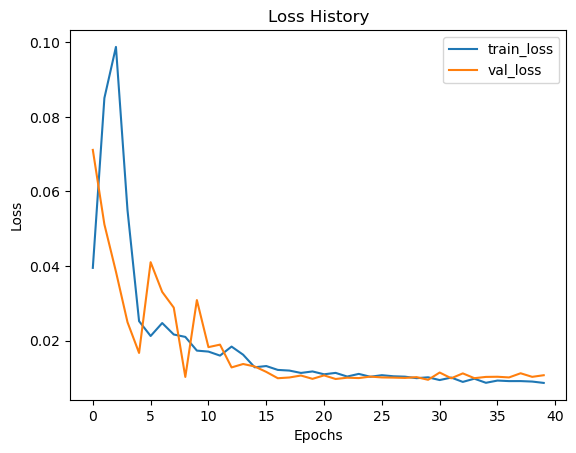

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

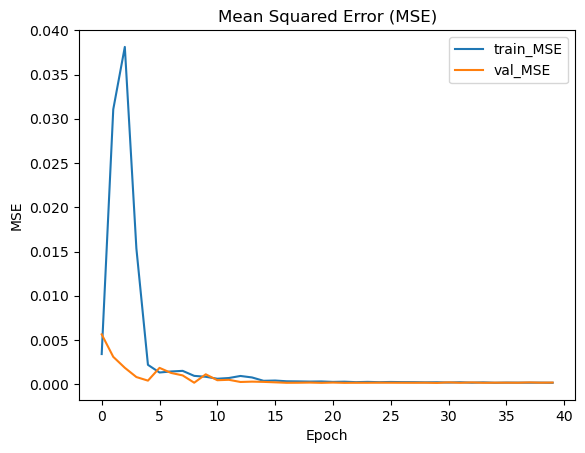

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

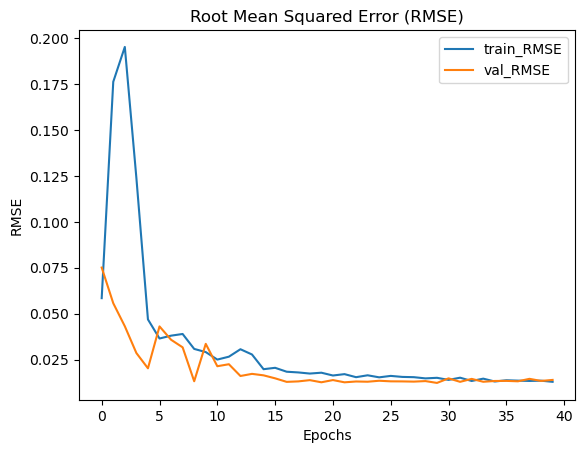

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

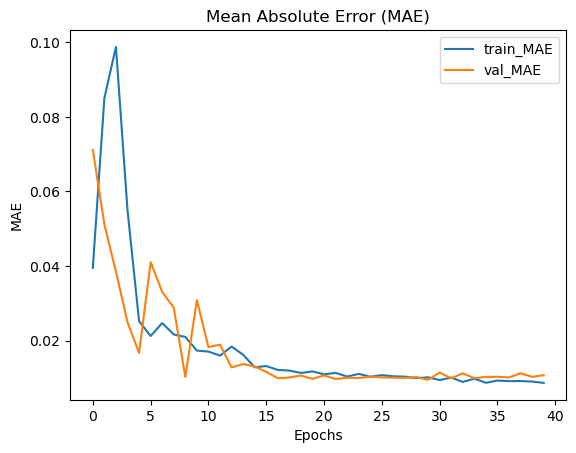

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

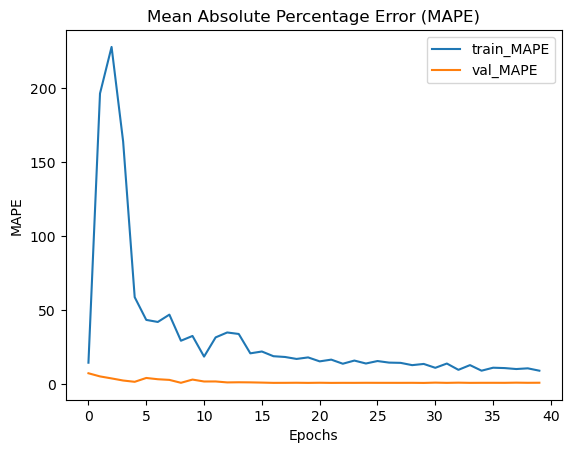

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 22:33:59.477990: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


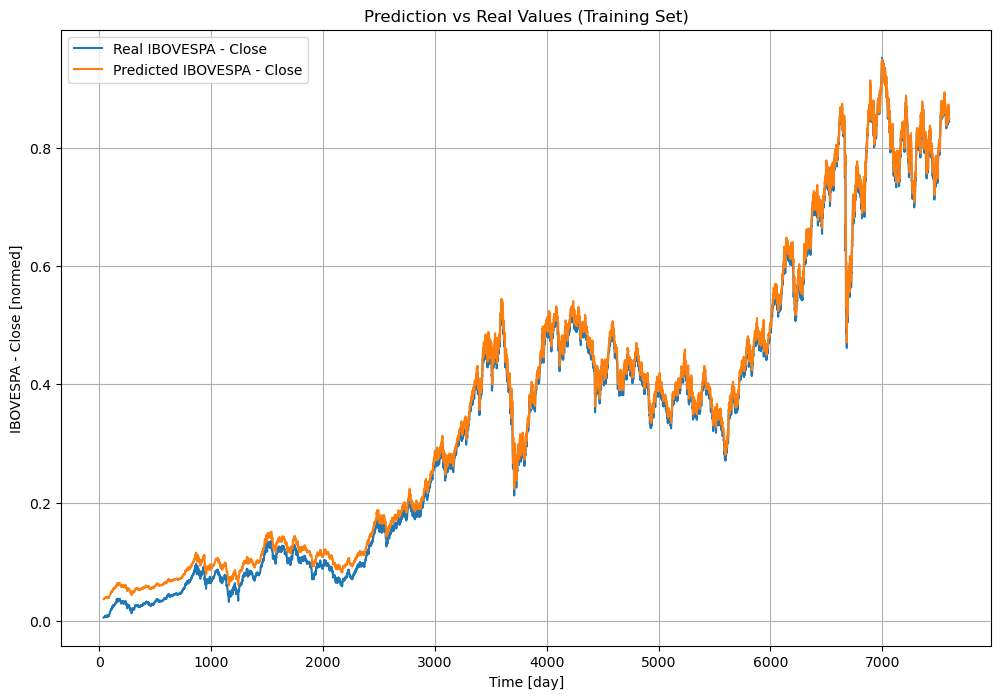

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


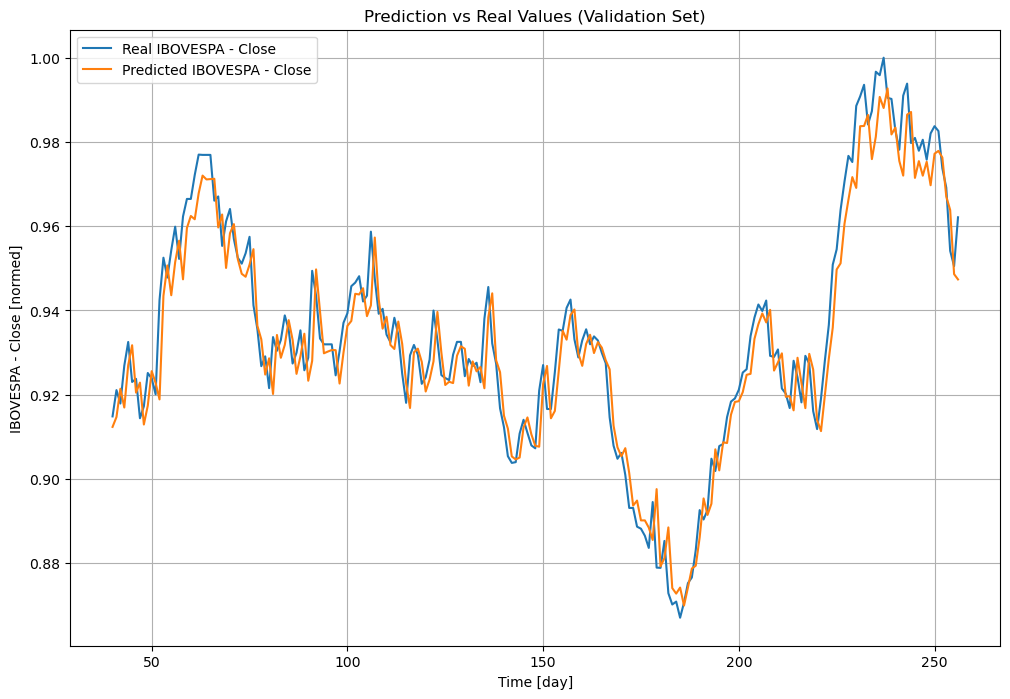

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


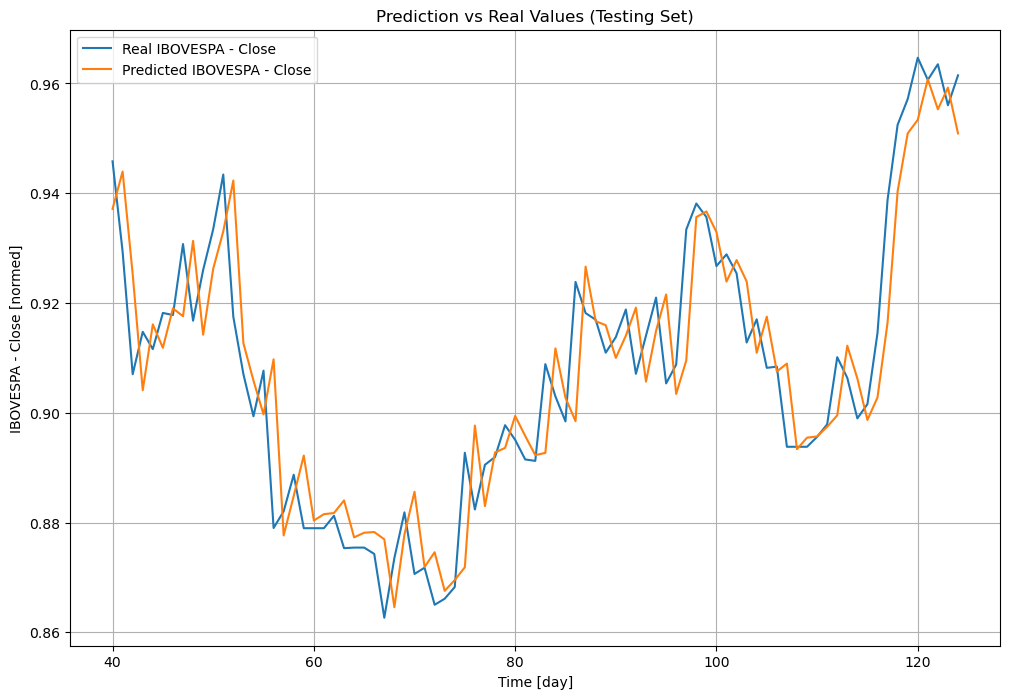

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

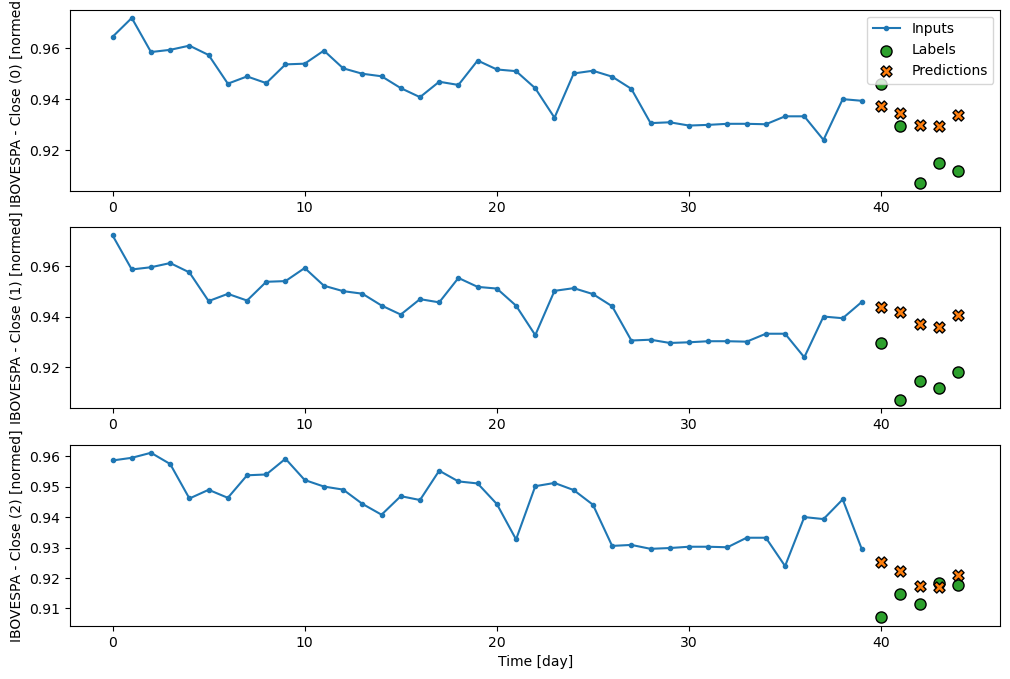

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:5s:493ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[[0.9371415 , 0.9371415 , 0.9371415 , ..., 0.9371415 ,
         0.9371415 , 0.9371415 ],
        [0.93471813, 0.93471813, 0.93471813, ..., 0.93471813,
         0.93471813, 0.93471813],
        [0.9299741 , 0.9299741 , 0.9299741 , ..., 0.9299741 ,
         0.9299741 , 0.9299741 ],
        [0.9292904 , 0.9292904 , 0.9292904 , ..., 0.9292904 ,
         0.9292904 , 0.9292904 ],
        [0.9337707 , 0.9337707 , 0.9337707 , ..., 0.9337707 ,
         0.9328811 , 0.9328811 ]],

       [[0.94395447, 0.94395447, 0.94395447, ..., 0.94395447,
         0.94395447, 0.94395447],
        [0.94169784, 0.94169784, 0.94169784, ..., 0.94169784,
         0.94169784, 0.94169784],
        [0.9368671 , 0.9368671 , 0.9368671 , ..., 0.9368671 ,
         0.9368671 , 0.9368671 ],
        [0.9360227 , 0.9360227 , 0.9360227 , ..., 0.9360227 ,
         0.9360227 , 0.9360227 ],
        [0.94075555, 0.94075555, 0.94075555, ..., 0.94075555,
         0.9398619 , 0.9398619 ]],

       [[0.92526925, 0.92526925, 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')